# MAT-classification: Analysis and Classification methods for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use mat-classification as a python library.

The present package offers a tool, to support the user in the task of data analysis of multiple aspect trajectories. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Dec, 2023
Copyright (C) 2023, License GPL Version 3 or superior (see LICENSE file)

In [1]:
!pip3 install mat-classification

ERROR: Could not find a version that satisfies the requirement mat-analysis (from versions: none)
ERROR: No matching distribution found for mat-analysis


## 1. Loading data
To use helpers for data pre-processing, import from package `matdata` (dependency: [mat-data](https://github.com/ttportela/mat-data)):

    a) Lets start by loading Brightkite data:

In [18]:
from matdata.datasets import load_ds

dataset='mat.Brightkite'
#dataset='mat.FoursquareNYC'

df = load_ds(dataset)
df

Reading dataset Brightkite of Multiple Aspect Trajectories


Brightkite (Multiple Aspect Trajectories):   0%|          | 0/2 [00:00<?, ?it/s]

lat         lon  time        day     poi     tid  label
0      39.739154 -104.984703   976  Wednesday  717121    3174     41
1      39.739154 -104.984703  1229  Wednesday  717121    3174     41
2      39.739154 -104.984703  1233  Wednesday  717121    3174     41
3      39.739154 -104.984703   132   Thursday  717121    3174     41
4      39.739154 -104.984703   218   Thursday  717121    3174     41
...          ...         ...   ...        ...     ...     ...    ...
39483  33.992514 -117.516439  1159     Sunday  716253  600617  54164
39484  34.206394 -118.224241  1270     Monday  716290  600617  54164
39485  33.992514 -117.516439    79  Wednesday  716253  600617  54164
39486  34.106399 -117.593108    79  Wednesday  716535  600617  54164
39487  33.992514 -117.516439   190  Wednesday  716253  600617  54164

[130494 rows x 7 columns]

To train/test split respecting class balance:

In [2]:
from matdata.preprocess import trainAndTestSplit
train, test = trainAndTestSplit(df, train_size=0.75, outformats=[])

  0%|          | 0/300 [00:00<?, ?it/s]

    b) To simplify, we will stratify only 2 labels to reduce the data, that train/test split (w.r.t. class balance):

In [3]:
from matdata.preprocess import klabels_stratify

train, test = klabels_stratify(df, kl=10, outformats=[])

train.sort_values(['label', 'tid'])
test.sort_values(['label', 'tid'])

'Train/Test #TIDs:', len(train['tid'].unique()), len(test['tid'].unique())

  0%|          | 0/10 [00:00<?, ?it/s]

('Train/Test #TIDs:', 163, 76)

    c) Saving and ordering trajectories by class and tid:

In [14]:
import pandas as pd
train[['space', 'day', 'time', 'poi', 'tid', 'label', ]].to_csv('sample/data/Brightkite/train.csv', index=False)
test[['space', 'day', 'time', 'poi', 'tid', 'label', ]].to_csv('sample/data/Brightkite/test.csv', index=False)

Then, experiment with a classifier.

## 2. Classification Methods

TODO

- `prepare_input(train, test)` => `model.train()` => `model.test()`
- `model.fit(X_train, y_train, X_val, y_val)` => `model.predict(X_test, y_test)`

### 2.1. Trajectory Based Methods

TODO

#### 2.1.1. MARC

TODO

In [3]:
from matclassification.methods import MARC

model = MARC()
model.prepare_input(train, test)
model.test()
## We can visualize the training report (the same on most models):
model.report


[MARC:] Building model

###########    DATA PREPARATION      ###########
[    INFO    ] 2023-12-23 15:05:12 :: Attribute Lat/Lon: 40-bits value
[    INFO    ] 2023-12-23 15:05:12 :: Attribute 'time': 722 unique values
[    INFO    ] 2023-12-23 15:05:12 :: Attribute 'day': 7 unique values
[    INFO    ] 2023-12-23 15:05:12 :: Attribute 'poi': 49 unique values
[    INFO    ] 2023-12-23 15:05:12 :: Attribute 'space': 47 unique values
[    INFO    ] 2023-12-23 15:05:12 :: Total of attribute/value pairs: 865
[[    INFO    ] 2023-12-23 15:05:12 :: Processing trajectory 64/64. 
[    INFO    ] 2023-12-23 15:05:12 :: Loading data from files ... DONE!
[    INFO    ] 2023-12-23 15:05:12 :: Trajectories:  64
[    INFO    ] 2023-12-23 15:05:12 :: Labels:        2
[    INFO    ] 2023-12-23 15:05:12 :: Train size:    0.6875
[    INFO    ] 2023-12-23 15:05:12 :: Test size:     0.3125
[MARC:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Metal device set to: Apple M1


2023-12-23 15:05:12.978607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-23 15:05:12.978737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


===== Training Epoch 1 =====
Epoch 1/1000


2023-12-23 15:05:13.511631: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-23 15:05:14.539769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-23 15:05:14.804784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-23 15:05:15.000128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.8206 - acc: 0.5000

2023-12-23 15:05:15.529992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-23 15:05:15.616962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-23 15:05:15.934055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-23 15:05:16.018128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 82ms/step
TRAIN		acc: 0.977273	acc_top5: 1.000000	f1_macro: 0.976280	prec_macro: 0.981481	rec_macro: 0.972222
1/1 [==============================] - 0s 85ms/step
TEST		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 3s 3s/step - loss: 32.8206 - acc: 0.5000 - val_loss: 31.7042 - val_acc: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 12ms/stepss: 31.7812 - acc: 0.68
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 19ms/step
TEST		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 173ms/step - loss: 31.7812 - acc: 0.6818 - val_loss: 30.7780 - val_acc: 1.0000
===== Training Epoch 3 =====
Epoch 3/1000
2/2 [==============================] - 0s 10ms/s

loss       acc   val_loss  val_acc
0   32.820618  0.500000  31.704248      1.0
1   31.781237  0.681818  30.777983      1.0
2   30.843515  0.954545  29.919550      1.0
3   29.996073  0.977273  29.108820      1.0
4   29.159647  1.000000  28.331732      1.0
5   28.385302  1.000000  27.582853      1.0
6   27.615438  1.000000  26.857664      1.0
7   26.879728  1.000000  26.151825      1.0
8   26.169401  1.000000  25.464296      1.0
9   25.476536  1.000000  24.791903      1.0
10  24.803919  1.000000  24.134512      1.0
11  24.145231  1.000000  23.491489      1.0
12  23.499889  1.000000  22.861710      1.0
13  22.864893  1.000000  22.244646      1.0
14  22.247702  1.000000  21.639036      1.0
15  21.642422  1.000000  21.046003      1.0
16  21.048660  1.000000  20.462126      1.0
17  20.463869  1.000000  19.892487      1.0
18  19.894876  1.000000  19.334799      1.0
19  19.338251  1.000000  18.788870      1.0
20  18.790545  1.000000  18.255476      1.0
21  18.256693  1.000000  17.730352      1.0
22  17.732096  1.000000  17.217436      1.0
23  17.220001  1.000000  16.715424      1.0
24  16.716799  1.000000  16.224808      1.0
25  16.225597  1.000000  15.745162      1.0
26  15.746000  1.000000  15.275395      1.0
27  15.276215  1.000000  14.817102      1.0
28  14.817946  1.000000  14.368708      1.0
29  14.369095  1.000000  13.930834      1.0
30  13.931622  1.000000  13.502622      1.0
31  13.503414  1.000000  13.086272      1.0

In [4]:
# and this is the model available metrics:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  f1_macro
0  1.0         1.0                1.0              1.0           1.0       1.0

Or, you can repeat the classification in a number of rounds with increasing random seed:

In [5]:
model.test(rounds=3)

[MARC:] Creating a model to test set


Model Testing:   0%|          | 0/3 [00:00<?, ?it/s]

===== Training Epoch 1 =====


2023-12-21 11:07:58.879876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:07:59.088669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:07:59.228540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:00.195695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:00.286990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/6 [====>.........................] - ETA: 1s

2023-12-21 11:08:00.680963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:00.752314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 28ms/step
TRAIN		acc: 0.515337	acc_top5: 0.932515	f1_macro: 0.221764	prec_macro: 0.777510	rec_macro: 0.307692
3/3 [==============================] - 0s 52ms/step
TEST		acc: 0.473684	acc_top5: 0.907895	f1_macro: 0.203224	prec_macro: 0.754018	rec_macro: 0.300000
===== Training Epoch 2 =====
6/6 [==============================] - 0s 12ms/step
TRAIN		acc: 0.650307	acc_top5: 0.950920	f1_macro: 0.332888	prec_macro: 0.898365	rec_macro: 0.392308
3/3 [==============================] - 0s 13ms/step
TEST		acc: 0.592105	acc_top5: 0.921053	f1_macro: 0.313942	prec_macro: 0.883962	rec_macro: 0.375000
===== Training Epoch 3 =====
6/6 [==============================] - 0s 13ms/step
TRAIN		acc: 0.662577	acc_top5: 0.969325	f1_macro: 0.340073	prec_macro: 0.905202	rec_macro: 0.400000
3/3 [==============================] - 0s 12ms/step
TEST		acc: 0.631579	acc_top5: 0.960526	f1_macro: 0.334379	prec_macro: 0.898137	rec_macro: 0.400000
===== Training Epoch 4 =====
6/6 

2023-12-21 11:08:15.581145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:15.811873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:15.974966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:16.819083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:16.918022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/6 [====>.........................] - ETA: 1s

2023-12-21 11:08:17.309392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:17.386768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 31ms/step
TRAIN		acc: 0.527607	acc_top5: 0.907975	f1_macro: 0.285643	prec_macro: 0.819701	rec_macro: 0.321991
3/3 [==============================] - 0s 50ms/step
TEST		acc: 0.447368	acc_top5: 0.881579	f1_macro: 0.254780	prec_macro: 0.793621	rec_macro: 0.285641
===== Training Epoch 2 =====
6/6 [==============================] - 0s 14ms/step
TRAIN		acc: 0.693252	acc_top5: 0.914110	f1_macro: 0.397729	prec_macro: 0.803673	rec_macro: 0.438462
3/3 [==============================] - 0s 13ms/step
TEST		acc: 0.618421	acc_top5: 0.907895	f1_macro: 0.361355	prec_macro: 0.772032	rec_macro: 0.408333
===== Training Epoch 3 =====
6/6 [==============================] - 0s 12ms/step
TRAIN		acc: 0.742331	acc_top5: 0.993865	f1_macro: 0.466459	prec_macro: 0.844291	rec_macro: 0.504487
3/3 [==============================] - 0s 13ms/step
TEST		acc: 0.684211	acc_top5: 0.960526	f1_macro: 0.450907	prec_macro: 0.845609	rec_macro: 0.483333
===== Training Epoch 4 =====
6/6 

2023-12-21 11:08:33.010894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:33.249618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:33.489665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:34.494077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:34.608630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:35.059406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 11:08:35.150558: I tensorflow/core/grappler/optimizers/cust

6/6 [==============================] - 1s 37ms/step
TRAIN		acc: 0.392638	acc_top5: 0.858896	f1_macro: 0.179067	prec_macro: 0.825758	rec_macro: 0.209744
3/3 [==============================] - 0s 60ms/step
TEST		acc: 0.342105	acc_top5: 0.842105	f1_macro: 0.155034	prec_macro: 0.910937	rec_macro: 0.189103
===== Training Epoch 2 =====
6/6 [==============================] - 0s 14ms/step
TRAIN		acc: 0.674847	acc_top5: 0.987730	f1_macro: 0.443605	prec_macro: 0.935187	rec_macro: 0.479060
3/3 [==============================] - 0s 16ms/step
TEST		acc: 0.644737	acc_top5: 0.973684	f1_macro: 0.435390	prec_macro: 0.926585	rec_macro: 0.475000
===== Training Epoch 3 =====
6/6 [==============================] - 0s 15ms/step
TRAIN		acc: 0.791411	acc_top5: 1.000000	f1_macro: 0.606784	prec_macro: 0.944108	rec_macro: 0.624725
3/3 [==============================] - 0s 15ms/step
TEST		acc: 0.710526	acc_top5: 0.986842	f1_macro: 0.527134	prec_macro: 0.919118	rec_macro: 0.558333
===== Training Epoch 4 =====
6/6 

(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.986842         1.0           0.983333         0.987683       0.99375   
 1  0.986842         1.0           0.983333         0.987683       0.99375   
 2  1.000000         1.0           1.000000         1.000000       1.00000   
 
    f1_macro  
 0  0.983333  
 1  0.983333  
 2  1.000000  ,
 array(['1302', '1302', '1302', '38768', '38768', '2868', '38768', '1302',
        '1302', '2868', '14356', '2868', '14356', '2807', '1302', '1302',
        '1302', '1302', '2868', '6205', '2868', '14356', '14356', '2868',
        '14356', '14356', '2868', '11300', '11300', '2868', '11300',
        '11300', '11300', '11300', '11300', '11300', '11300', '38768',
        '11300', '2868', '11300', '11300', '7226', '7226', '7226', '7226',
        '1302', '6205', '1302', '2868', '2868', '1302', '1302', '21586',
        '21586', '1302', '2807', '2807', '1302', '2807', '2807', '11300',
        '2807', '38768', '17372', '17372

In [6]:
## We can visualize the test report (the same on most models):
model.test_report

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.986842         1.0           0.983333         0.987683       0.99375   
1  0.986842         1.0           0.983333         0.987683       0.99375   
2  1.000000         1.0           1.000000         1.000000       1.00000   

   f1_macro  
0  0.983333  
1  0.983333  
2  1.000000

In [7]:
# And show the mean results
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.991228         1.0           0.988889         0.991789      0.995833   

   f1_macro  
0  0.988889

#### 2.1.2. POI-Sequence (extention of POI-Frequency)

TODO TEM ALGUM PROBLEMA!

In [4]:
from matclassification.methods import POIS

sequences = [1] # Sequence sizes to use, example, for 1, 2 or 3 points use: [1, 2, 3] 
features = ['poi'] # Features to build frequency matrix combined with sequence sizes, 
                   # by default selects the feature with higher variance
# method='npoi' # you can pass the extract method

model = POIS('npoi', sequences, features)
model.prepare_input(train, test)
model.test()


[NPOI:] Building model
[POIS:] Starting feature extractor ... 
Dataset: specific, Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 59.346000000000004 milliseconds. Done.
------------------------------------------------------------------------------------------------
[NPOI:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Metal device set to: Apple M1


2024-04-09 08:42:42.985687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-09 08:42:42.985777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-09 08:42:43.144061: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


===== Training Epoch 1 =====


2024-04-09 08:42:43.325573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 3ms/step
TRAIN		acc: 0.343558	acc_top5: 0.779141	f1_macro: 0.312192	prec_macro: 0.339173	rec_macro: 0.309632
3/3 [==============================] - 0s 3ms/step


2024-04-09 08:42:43.589231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-09 08:42:43.688807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TEST		acc: 0.250000	acc_top5: 0.710526	f1_macro: 0.173194	prec_macro: 0.187929	rec_macro: 0.176603
===== Training Epoch 2 =====
6/6 [==============================] - 0s 2ms/step
TRAIN		acc: 0.582822	acc_top5: 0.889571	f1_macro: 0.494198	prec_macro: 0.502824	rec_macro: 0.503975
3/3 [==============================] - 0s 2ms/step
TEST		acc: 0.315789	acc_top5: 0.802632	f1_macro: 0.236899	prec_macro: 0.258116	rec_macro: 0.234103
===== Training Epoch 3 =====
6/6 [==============================] - 0s 1ms/step
TRAIN		acc: 0.656442	acc_top5: 0.938650	f1_macro: 0.536779	prec_macro: 0.546871	rec_macro: 0.550743
3/3 [==============================] - 0s 2ms/step
TEST		acc: 0.368421	acc_top5: 0.842105	f1_macro: 0.244746	prec_macro: 0.346248	rec_macro: 0.255513
===== Training Epoch 4 =====
6/6 [==============================] - 0s 2ms/step
TRAIN		acc: 0.730061	acc_top5: 0.957055	f1_macro: 0.592460	prec_macro: 0.689429	rec_macro: 0.602402
3/3 [==============================] - 0s 2ms/step
TEST		acc:

(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.460526    0.934211           0.337564         0.299555      0.475536   
 
    f1_macro  
 0  0.337564  ,
 array([[1.96809292e-01, 1.84029527e-02, 7.34165078e-03, 9.29129776e-03,
         2.56926697e-02, 6.77567959e-01, 1.50185833e-02, 1.50457015e-02,
         1.52698709e-02, 1.95600931e-02],
        [5.48601925e-01, 3.39681618e-02, 2.36345101e-02, 2.96957381e-02,
         4.08022813e-02, 1.79828554e-01, 5.11812381e-02, 3.02549042e-02,
         3.38263698e-02, 2.82063764e-02],
        [9.26108360e-01, 5.85387973e-03, 4.75801528e-03, 6.56638015e-03,
         7.82481954e-03, 9.55389533e-03, 2.26615053e-02, 5.63414348e-03,
         7.62910116e-03, 3.40974121e-03],
        [4.73637432e-02, 7.35316277e-02, 7.46432766e-02, 7.58816600e-02,
         8.39012712e-02, 3.21744680e-01, 4.91837189e-02, 5.62277213e-02,
         7.36103281e-02, 1.43912017e-01],
        [8.39668512e-01, 1.00927204e-02, 5.01732063e-03, 7.

In [5]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.460526    0.934211           0.337564         0.299555      0.475536   

   f1_macro  
0  0.337564

If you want to use just the feature extractor, you can check `poifreq` submodule:

In [6]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1,2,3]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

[POIS:] Starting feature extractor ... 
Dataset: specific, Feature: poi, Sequence: 1
Starting NPOI...
Dataset: specific, Feature: poi, Sequence: 2
Starting NPOI...
Dataset: specific, Feature: poi, Sequence: 3
Starting NPOI...
[POIS:] Processing time: 430.117 milliseconds. Done.
------------------------------------------------------------------------------------------------


0         1         2         3         4         5         6    \
0    0.294118  0.411765  0.058824  0.117647  0.058824  0.058824  0.000000   
1    0.454545  0.181818  0.000000  0.272727  0.000000  0.090909  0.000000   
2    0.307692  0.153846  0.076923  0.076923  0.000000  0.076923  0.076923   
3    0.200000  0.300000  0.000000  0.000000  0.000000  0.100000  0.100000   
4    0.200000  0.300000  0.000000  0.200000  0.000000  0.100000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
158  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
159  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
160  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
161  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
162  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9    ...       776       777  778  779   780  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   
2    0.076923  0.076923  0.076923  ...  0.000000  0.000000  0.0  0.0  0.00   
3    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   
4    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   
..        ...       ...       ...  ...       ...       ...  ...  ...   ...   
158  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   
159  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   
160  0.000000  0.000000  0.000000  ...  0.083333  0.083333  0.0  0.0  0.00   
161  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.05   
162  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0  0.00   

      781   782   783       784       785  
0    0.00  0.00  0.00  0.000000  0.000000  
1    0.00  0.00  0.00  0.000000  0.000000  
2    0.00  0.00  0.00  0.000000  0.000000  
3    0.00  0.00  0.00  0.000000  0.000000  
4    0.00  0.00  0.00  0.000000  0.000000  
..    ...   ...   ...       ...       ...  
158  0.00  0.00  0.00  0.000000  0.000000  
159  0.00  0.00  0.00  0.000000  0.000000  
160  0.00  0.00  0.00  0.000000  0.000000  
161  0.05  0.05  0.05  0.000000  0.000000  
162  0.00  0.00  0.00  0.066667  0.066667  

[163 rows x 1414 columns]

And then you can use the `pois_model` to create the classifier. Import from:
```
from matanalysis.methods.pois.model_poifreq import pois_model`
pois_model(x_train, x_test, y_train, y_test)
```


The next classifiers use Hiperparameter Optimization (class derrived from `HPSClassifier`), thus we first call `model.train()` to test model configurations to look for the best model.

#### 2.1.3. DeepeST

TODO

In [8]:
from matclassification.methods import DeepeST

model = DeepeST()
model.prepare_input(train, test)
model.train()
model.test()


[DeepeST:] Building model


  0%|          | 0/2 [00:00<?, ?it/s]

[DeepeST:] Training hiperparameter model


[DeepeST:] Model Training:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:12.483427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:12.711911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:12.722529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:12.901143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:12.914216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.4876 - acc: 0.6562

2023-12-21 15:28:13.485384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:13.575281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:13.582209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.4876 - acc: 0.6562 - val_loss: 62.9112 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 95ms/step - loss: 62.9004 - acc: 0.5938 - val_loss: 61.3507 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 85ms/step - loss: 61.3418 - acc: 0.5938 - val_loss: 59.8171 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 88ms/step - loss: 59.8021 - acc: 0.5938 - val_loss: 58.3169 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 85ms/step - loss: 58.2985 - acc: 0.5938 - val_loss: 56.8426 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 83ms/step - loss: 56.8189 - acc: 0.5938 - val_loss: 55.3954 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 86ms/step - loss: 55.3661 - acc: 0.5938 - val_loss: 53.9761 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 82ms/step - loss: 53.9497 - a

2023-12-21 15:28:16.849023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:16.929506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:16.938162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 433ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:18.668523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:18.901343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:18.913310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:19.091036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:19.104283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.4920 - acc: 0.5312

2023-12-21 15:28:19.668396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:19.762028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:19.769124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 64.4920 - acc: 0.5312 - val_loss: 62.9038 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 104ms/step - loss: 62.9005 - acc: 0.6250 - val_loss: 61.3384 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 99ms/step - loss: 61.3236 - acc: 0.5938 - val_loss: 59.8041 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 93ms/step - loss: 59.7936 - acc: 0.5938 - val_loss: 58.3034 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 101ms/step - loss: 58.2873 - acc: 0.5938 - val_loss: 56.8276 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 107ms/step - loss: 56.8303 - acc: 0.5938 - val_loss: 55.3792 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 83ms/step - loss: 55.3572 - acc: 0.5938 - val_loss: 53.9584 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 84ms/step - loss: 53.9204 

2023-12-21 15:28:22.878439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:22.960219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:22.966969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 448ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:24.803433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:25.024375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:25.037702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:25.247963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:25.261000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.5958 - acc: 0.4688

2023-12-21 15:28:25.861623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:25.963504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:25.971649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.5958 - acc: 0.4688 - val_loss: 62.9683 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 131ms/step - loss: 62.9609 - acc: 0.5938 - val_loss: 61.3899 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 104ms/step - loss: 61.3753 - acc: 0.5938 - val_loss: 59.8411 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 110ms/step - loss: 59.8184 - acc: 0.5938 - val_loss: 58.3215 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 121ms/step - loss: 58.2861 - acc: 0.6250 - val_loss: 56.8240 - val_acc: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 124ms/step - loss: 56.7838 - acc: 0.8438 - val_loss: 55.3540 - val_acc: 0.9167
Epoch 7/1000
1/1 [==============================] - 0s 102ms/step - loss: 55.3087 - acc: 0.8750 - val_loss: 53.9111 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 119ms/step - loss: 53.8

2023-12-21 15:28:29.203322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:29.287130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:29.293956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 650ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:30.928967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:31.154906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:31.165102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:31.391096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:31.404292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.4875 - acc: 0.7188

2023-12-21 15:28:32.046400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:32.147397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:32.154623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.4875 - acc: 0.7188 - val_loss: 62.8731 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 135ms/step - loss: 62.8586 - acc: 0.5938 - val_loss: 61.2874 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 128ms/step - loss: 61.2688 - acc: 0.6250 - val_loss: 59.7298 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 124ms/step - loss: 59.6914 - acc: 0.7500 - val_loss: 58.2031 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 0s 124ms/step - loss: 58.1730 - acc: 0.7812 - val_loss: 56.7003 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 120ms/step - loss: 56.6541 - acc: 0.9375 - val_loss: 55.2262 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 113ms/step - loss: 55.1416 - acc: 1.0000 - val_loss: 53.7800 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 114ms/step - loss: 53.7

2023-12-21 15:28:35.218740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:35.304300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:35.311329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 645ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:36.993231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:37.227463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:37.237625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:37.460296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:37.473661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.6518 - acc: 0.4375

2023-12-21 15:28:38.298984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:38.402528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:38.409589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.6518 - acc: 0.4375 - val_loss: 63.0133 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 153ms/step - loss: 63.0082 - acc: 0.6250 - val_loss: 61.4130 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 149ms/step - loss: 61.4029 - acc: 0.6562 - val_loss: 59.8421 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 138ms/step - loss: 59.8030 - acc: 0.9375 - val_loss: 58.3018 - val_acc: 0.9167
Epoch 5/1000
1/1 [==============================] - 0s 120ms/step - loss: 58.2664 - acc: 0.8750 - val_loss: 56.7863 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 116ms/step - loss: 56.7412 - acc: 1.0000 - val_loss: 55.2983 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 132ms/step - loss: 55.2463 - acc: 1.0000 - val_loss: 53.8399 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 115ms/step - loss: 53.7

2023-12-21 15:28:41.427684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:41.513296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:41.520768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 454ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:43.179039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:43.434281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:43.444163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:43.655324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:43.668490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.5174 - acc: 0.4062

2023-12-21 15:28:44.476775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:44.581055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:44.588119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.5174 - acc: 0.4062 - val_loss: 62.9303 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 141ms/step - loss: 62.9319 - acc: 0.5000 - val_loss: 61.3689 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 128ms/step - loss: 61.3560 - acc: 0.6562 - val_loss: 59.8369 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 115ms/step - loss: 59.8375 - acc: 0.6250 - val_loss: 58.3388 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 117ms/step - loss: 58.3251 - acc: 0.5938 - val_loss: 56.8670 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 112ms/step - loss: 56.8607 - acc: 0.5938 - val_loss: 55.4233 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 96ms/step - loss: 55.4216 - acc: 0.5938 - val_loss: 54.0069 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 99ms/step - loss: 53.995

2023-12-21 15:28:48.469167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:48.552868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:48.559776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 450ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:50.405268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:50.672426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:50.683375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:50.886850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:50.900213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.4307 - acc: 0.4062

2023-12-21 15:28:51.514938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:51.622380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:51.629598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.4307 - acc: 0.4062 - val_loss: 62.8329 - val_acc: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 153ms/step - loss: 62.8232 - acc: 0.7500 - val_loss: 61.2646 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 138ms/step - loss: 61.2506 - acc: 0.6875 - val_loss: 59.7277 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 125ms/step - loss: 59.7169 - acc: 0.6250 - val_loss: 58.2233 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 121ms/step - loss: 58.1917 - acc: 0.5938 - val_loss: 56.7443 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 149ms/step - loss: 56.7159 - acc: 0.6562 - val_loss: 55.2923 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 99ms/step - loss: 55.2613 - acc: 0.6562 - val_loss: 53.8680 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 135ms/step - loss: 53.82

2023-12-21 15:28:55.199608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:55.291509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:55.298388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 474ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:28:57.155738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:57.432502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:57.443328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:57.681431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:57.695513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.5565 - acc: 0.4375

2023-12-21 15:28:58.335435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:58.444750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:28:58.453761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.5565 - acc: 0.4375 - val_loss: 62.9446 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 170ms/step - loss: 62.9267 - acc: 0.5938 - val_loss: 61.3696 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 143ms/step - loss: 61.3535 - acc: 0.6250 - val_loss: 59.8254 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 152ms/step - loss: 59.8166 - acc: 0.5938 - val_loss: 58.3122 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 151ms/step - loss: 58.2831 - acc: 0.6875 - val_loss: 56.8215 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 154ms/step - loss: 56.7914 - acc: 0.6562 - val_loss: 55.3572 - val_acc: 0.6667
Epoch 7/1000
1/1 [==============================] - 0s 130ms/step - loss: 55.3323 - acc: 0.7500 - val_loss: 53.9185 - val_acc: 0.8333
Epoch 8/1000
1/1 [==============================] - 0s 101ms/step - loss: 53.8

2023-12-21 15:29:02.024301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:02.125101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:02.132321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 511ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:04.021900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:04.299890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:04.309866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:04.587850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:04.601223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.6306 - acc: 0.3750

2023-12-21 15:29:05.317159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:05.434762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:05.441915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.6306 - acc: 0.3750 - val_loss: 62.9895 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 222ms/step - loss: 62.9765 - acc: 0.5938 - val_loss: 61.3988 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 177ms/step - loss: 61.3812 - acc: 0.6562 - val_loss: 59.8382 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 204ms/step - loss: 59.8212 - acc: 0.7188 - val_loss: 58.3083 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 155ms/step - loss: 58.2705 - acc: 0.7812 - val_loss: 56.8022 - val_acc: 0.9167
Epoch 6/1000
1/1 [==============================] - 0s 150ms/step - loss: 56.7470 - acc: 0.9375 - val_loss: 55.3226 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 141ms/step - loss: 55.2773 - acc: 0.9688 - val_loss: 53.8723 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 154ms/step - loss: 53.8

2023-12-21 15:29:09.100506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:09.197784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:09.204848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 494ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:11.031281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:11.306011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:11.317429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:11.602764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:11.616185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.5751 - acc: 0.4688

2023-12-21 15:29:12.385248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:12.507642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:12.515174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 64.5751 - acc: 0.4688 - val_loss: 62.9379 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 228ms/step - loss: 62.9263 - acc: 0.5938 - val_loss: 61.3499 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 208ms/step - loss: 61.3433 - acc: 0.6250 - val_loss: 59.7880 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 219ms/step - loss: 59.7714 - acc: 0.7500 - val_loss: 58.2563 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 0s 210ms/step - loss: 58.2200 - acc: 0.8750 - val_loss: 56.7517 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 198ms/step - loss: 56.7131 - acc: 0.9688 - val_loss: 55.2750 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 144ms/step - loss: 55.2187 - acc: 0.9688 - val_loss: 53.8267 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 150ms/step - loss: 53.7

2023-12-21 15:29:16.114607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:16.212071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:16.219365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 495ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:18.024972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:18.289008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:18.300542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:18.612330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:18.625118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.3821 - acc: 0.3750

2023-12-21 15:29:19.358230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:19.484464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:19.491863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.3821 - acc: 0.3750 - val_loss: 175.1105 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 220ms/step - loss: 175.1120 - acc: 0.5938 - val_loss: 168.9807 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 182ms/step - loss: 168.9775 - acc: 0.5938 - val_loss: 163.0109 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 197ms/step - loss: 162.9981 - acc: 0.5938 - val_loss: 157.2244 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 155ms/step - loss: 157.2145 - acc: 0.5938 - val_loss: 151.5811 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 206ms/step - loss: 151.5647 - acc: 0.5938 - val_loss: 146.0869 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 145ms/step - loss: 146.0716 - acc: 0.5938 - val_loss: 140.7533 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 130ms/ste

2023-12-21 15:29:23.663278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:23.762733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:23.769463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 523ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:25.673272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:25.934920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:25.946272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:26.246350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:26.264424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.1612 - acc: 0.5000

2023-12-21 15:29:27.022577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:27.148038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:27.156579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.1612 - acc: 0.5000 - val_loss: 174.8834 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 211ms/step - loss: 174.8687 - acc: 0.6250 - val_loss: 168.7455 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 171ms/step - loss: 168.7303 - acc: 0.5938 - val_loss: 162.7727 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 160ms/step - loss: 162.7525 - acc: 0.5938 - val_loss: 156.9823 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 154ms/step - loss: 156.9558 - acc: 0.5938 - val_loss: 151.3367 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 160ms/step - loss: 151.3002 - acc: 0.5938 - val_loss: 145.8460 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 180ms/step - loss: 145.8131 - acc: 0.6250 - val_loss: 140.5132 - val_acc: 0.6667
Epoch 8/1000
1/1 [==============================] - 0s 144ms/ste

2023-12-21 15:29:30.961465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:31.061891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:31.068719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 492ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:32.919014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:33.199395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:33.211727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:33.486271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:33.499396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.3276 - acc: 0.4062

2023-12-21 15:29:34.247615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:34.378700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:34.387230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.3276 - acc: 0.4062 - val_loss: 175.0286 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 205ms/step - loss: 175.0264 - acc: 0.5938 - val_loss: 168.8798 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 199ms/step - loss: 168.8630 - acc: 0.5938 - val_loss: 162.8887 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 193ms/step - loss: 162.8549 - acc: 0.6562 - val_loss: 157.0737 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 175ms/step - loss: 157.0479 - acc: 0.7500 - val_loss: 151.3997 - val_acc: 0.8333
Epoch 6/1000
1/1 [==============================] - 0s 161ms/step - loss: 151.3566 - acc: 0.9375 - val_loss: 145.8789 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 179ms/step - loss: 145.8076 - acc: 1.0000 - val_loss: 140.5182 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 135ms/ste

2023-12-21 15:29:38.336303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:38.454611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:38.462046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 727ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:40.149303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:40.401762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:40.412789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:40.710013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:40.723092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.2865 - acc: 0.4688

2023-12-21 15:29:41.443041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:41.570387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:41.577285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.2865 - acc: 0.4688 - val_loss: 174.9602 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 195ms/step - loss: 174.9577 - acc: 0.5938 - val_loss: 168.7978 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 153ms/step - loss: 168.7793 - acc: 0.5938 - val_loss: 162.7860 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 187ms/step - loss: 162.7545 - acc: 0.7500 - val_loss: 156.9541 - val_acc: 0.9167
Epoch 5/1000
1/1 [==============================] - 0s 163ms/step - loss: 156.9201 - acc: 1.0000 - val_loss: 151.2715 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 147ms/step - loss: 151.2176 - acc: 1.0000 - val_loss: 145.7489 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 115ms/step - loss: 145.6822 - acc: 1.0000 - val_loss: 140.3902 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 123ms/ste

2023-12-21 15:29:45.190264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:45.290984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:45.298272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 691ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:46.957698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:47.205401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:47.215334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:47.512884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:47.526151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.3253 - acc: 0.3750

2023-12-21 15:29:48.432902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:48.554986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:48.562298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.3253 - acc: 0.3750 - val_loss: 174.9762 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 194ms/step - loss: 174.9758 - acc: 0.5938 - val_loss: 168.7987 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 152ms/step - loss: 168.7707 - acc: 0.6875 - val_loss: 162.7673 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 0s 210ms/step - loss: 162.7173 - acc: 0.9375 - val_loss: 156.9246 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 180ms/step - loss: 156.8898 - acc: 0.9688 - val_loss: 151.2343 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 148ms/step - loss: 151.1741 - acc: 1.0000 - val_loss: 145.7035 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 159ms/step - loss: 145.6286 - acc: 1.0000 - val_loss: 140.3294 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 120ms/ste

2023-12-21 15:29:52.080241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:52.180156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:52.187484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 493ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:29:53.857706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:54.139851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:54.151415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:54.435655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:54.448831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.2989 - acc: 0.5000

2023-12-21 15:29:55.352631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:55.475056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:55.482941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.2989 - acc: 0.5000 - val_loss: 175.0309 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 182ms/step - loss: 175.0257 - acc: 0.5938 - val_loss: 168.8990 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 174ms/step - loss: 168.8881 - acc: 0.6250 - val_loss: 162.9267 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 168ms/step - loss: 162.9229 - acc: 0.5938 - val_loss: 157.1392 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 141ms/step - loss: 157.1268 - acc: 0.5938 - val_loss: 151.4956 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 121ms/step - loss: 151.4776 - acc: 0.5938 - val_loss: 146.0094 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 151ms/step - loss: 145.9860 - acc: 0.5938 - val_loss: 140.6764 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 127ms/ste

2023-12-21 15:29:59.374738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:59.470474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:29:59.477155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 484ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:01.481723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:01.778229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:01.788421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:02.059900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:02.072900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.3076 - acc: 0.6250

2023-12-21 15:30:02.790728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:02.914955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:02.922603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.3076 - acc: 0.6250 - val_loss: 175.0378 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 187ms/step - loss: 175.0354 - acc: 0.5938 - val_loss: 168.9033 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 176ms/step - loss: 168.8884 - acc: 0.5938 - val_loss: 162.9301 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 144ms/step - loss: 162.9086 - acc: 0.5938 - val_loss: 157.1414 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 128ms/step - loss: 157.1227 - acc: 0.5938 - val_loss: 151.4951 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 177ms/step - loss: 151.4748 - acc: 0.5938 - val_loss: 146.0019 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 132ms/step - loss: 145.9706 - acc: 0.6875 - val_loss: 140.6683 - val_acc: 0.6667
Epoch 8/1000
1/1 [==============================] - 0s 162ms/ste

2023-12-21 15:30:06.958231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:07.092984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:07.100225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 625ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:09.111133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:09.448695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:09.459822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:09.822479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:09.835788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.1962 - acc: 0.4375

2023-12-21 15:30:10.727156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:10.885069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:10.894336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 181.1962 - acc: 0.4375 - val_loss: 174.8924 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 324ms/step - loss: 174.8763 - acc: 0.5938 - val_loss: 168.7464 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 290ms/step - loss: 168.7284 - acc: 0.5938 - val_loss: 162.7615 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 236ms/step - loss: 162.7371 - acc: 0.6562 - val_loss: 156.9539 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 296ms/step - loss: 156.9270 - acc: 0.6875 - val_loss: 151.2860 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 0s 238ms/step - loss: 151.2458 - acc: 0.8125 - val_loss: 145.7730 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 283ms/step - loss: 145.7210 - acc: 0.9062 - val_loss: 140.4186 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 198ms/ste

2023-12-21 15:30:15.686617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:15.806564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:15.813821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 566ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:17.755705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:18.083853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:18.095830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:18.502737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:18.516080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.2504 - acc: 0.5938

2023-12-21 15:30:19.409301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:19.563035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:19.570457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 181.2504 - acc: 0.5938 - val_loss: 174.9347 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 335ms/step - loss: 174.9431 - acc: 0.5938 - val_loss: 168.7767 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 302ms/step - loss: 168.7610 - acc: 0.5938 - val_loss: 162.7677 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 273ms/step - loss: 162.7373 - acc: 0.7188 - val_loss: 156.9392 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 0s 273ms/step - loss: 156.9188 - acc: 1.0000 - val_loss: 151.2576 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 211ms/step - loss: 151.2239 - acc: 1.0000 - val_loss: 145.7352 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 156ms/step - loss: 145.6866 - acc: 1.0000 - val_loss: 140.3773 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 162ms/ste

2023-12-21 15:30:24.269095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:24.386888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:24.394129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 557ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:26.386233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:26.715303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:26.728029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:27.132184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:27.145523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 181.3086 - acc: 0.4062

2023-12-21 15:30:28.048790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:28.227894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:28.236040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 181.3086 - acc: 0.4062 - val_loss: 174.9784 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 411ms/step - loss: 174.9767 - acc: 0.5938 - val_loss: 168.8036 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 375ms/step - loss: 168.7717 - acc: 0.6875 - val_loss: 162.7826 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 0s 358ms/step - loss: 162.7317 - acc: 0.9062 - val_loss: 156.9494 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 183ms/step - loss: 156.9257 - acc: 1.0000 - val_loss: 151.2637 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 278ms/step - loss: 151.2335 - acc: 0.9688 - val_loss: 145.7296 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 219ms/step - loss: 145.6549 - acc: 1.0000 - val_loss: 140.3555 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 203ms/ste

2023-12-21 15:30:33.108841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:33.231774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:33.239187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 566ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:35.244506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:35.563282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:35.574084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:36.006457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:36.019730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.3905 - acc: 0.4375

2023-12-21 15:30:37.006196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:37.156265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:37.166578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.3905 - acc: 0.4375 - val_loss: 318.3788 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 324ms/step - loss: 318.3773 - acc: 0.6562 - val_loss: 304.7370 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 303ms/step - loss: 304.7372 - acc: 0.5938 - val_loss: 291.5357 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 320ms/step - loss: 291.5259 - acc: 0.5938 - val_loss: 278.8360 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 241ms/step - loss: 278.8255 - acc: 0.5938 - val_loss: 266.5374 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 291ms/step - loss: 266.5206 - acc: 0.5938 - val_loss: 254.6689 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 252ms/step - loss: 254.6467 - acc: 0.5938 - val_loss: 243.2365 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 275ms/ste

2023-12-21 15:30:42.743928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:42.868232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:42.875350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 585ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:44.751718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:45.065426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:45.076767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:45.490657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:45.503721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.5296 - acc: 0.4375

2023-12-21 15:30:46.448997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:46.611443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:46.618892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 332.5296 - acc: 0.4375 - val_loss: 318.5046 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 367ms/step - loss: 318.4922 - acc: 0.5938 - val_loss: 304.8624 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 325ms/step - loss: 304.8459 - acc: 0.5938 - val_loss: 291.6607 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 304ms/step - loss: 291.6456 - acc: 0.5938 - val_loss: 278.9547 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 188ms/step - loss: 278.9389 - acc: 0.5938 - val_loss: 266.6421 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 171ms/step - loss: 266.6142 - acc: 0.6875 - val_loss: 254.7587 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 183ms/step - loss: 254.7309 - acc: 0.7500 - val_loss: 243.3128 - val_acc: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 189ms/ste

2023-12-21 15:30:51.843076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:51.970266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:51.977216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 783ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:30:53.730795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:54.021428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:54.033925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:54.463606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:54.477771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.3811 - acc: 0.4375

2023-12-21 15:30:55.460708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:55.622645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:30:55.630482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 332.3811 - acc: 0.4375 - val_loss: 318.3372 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 348ms/step - loss: 318.3293 - acc: 0.5938 - val_loss: 304.6792 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 326ms/step - loss: 304.6439 - acc: 0.5938 - val_loss: 291.4518 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 341ms/step - loss: 291.4223 - acc: 0.6562 - val_loss: 278.7178 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 235ms/step - loss: 278.6781 - acc: 0.9062 - val_loss: 266.3825 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 272ms/step - loss: 266.3376 - acc: 0.9375 - val_loss: 254.4731 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 270ms/step - loss: 254.4081 - acc: 1.0000 - val_loss: 243.0033 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 218ms/ste

2023-12-21 15:31:00.617430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:00.741293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:00.748542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 779ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:02.490803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:02.773074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:02.785799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:03.232843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:03.246103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.4330 - acc: 0.4062

2023-12-21 15:31:04.398058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:04.555003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:04.565947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.4330 - acc: 0.4062 - val_loss: 318.3676 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 359ms/step - loss: 318.3531 - acc: 0.5938 - val_loss: 304.6923 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 267ms/step - loss: 304.6522 - acc: 0.6250 - val_loss: 291.4543 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 322ms/step - loss: 291.3970 - acc: 0.9062 - val_loss: 278.7124 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 328ms/step - loss: 278.6813 - acc: 1.0000 - val_loss: 266.3662 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 202ms/step - loss: 266.3119 - acc: 1.0000 - val_loss: 254.4512 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 198ms/step - loss: 254.3706 - acc: 1.0000 - val_loss: 242.9738 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 256ms/ste

2023-12-21 15:31:09.295437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:09.416909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:09.424218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 568ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:11.164160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:11.499267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:11.513939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:11.924499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:11.937526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.3186 - acc: 0.6562

2023-12-21 15:31:13.080384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:13.238231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:13.245816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.3186 - acc: 0.6562 - val_loss: 318.2323 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 373ms/step - loss: 318.2230 - acc: 0.5938 - val_loss: 304.5436 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 0s 362ms/step - loss: 304.5234 - acc: 0.7500 - val_loss: 291.2862 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 0s 331ms/step - loss: 291.2385 - acc: 0.9688 - val_loss: 278.5370 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 237ms/step - loss: 278.4933 - acc: 1.0000 - val_loss: 266.1935 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 229ms/step - loss: 266.1376 - acc: 1.0000 - val_loss: 254.2746 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 278ms/step - loss: 254.2024 - acc: 1.0000 - val_loss: 242.8113 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 157ms/ste

2023-12-21 15:31:18.163854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:18.286588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:18.293987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 581ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:20.240235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:20.581568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:20.594331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:21.027071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:21.040200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.2411 - acc: 0.5312

2023-12-21 15:31:22.028175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:22.177797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:22.189306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.2411 - acc: 0.5312 - val_loss: 318.2252 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 306ms/step - loss: 318.2152 - acc: 0.5938 - val_loss: 304.5968 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 244ms/step - loss: 304.5889 - acc: 0.5938 - val_loss: 291.4143 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 237ms/step - loss: 291.4036 - acc: 0.5938 - val_loss: 278.7324 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 184ms/step - loss: 278.7180 - acc: 0.5938 - val_loss: 266.4472 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 299ms/step - loss: 266.4297 - acc: 0.5938 - val_loss: 254.5853 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 325ms/step - loss: 254.5609 - acc: 0.5938 - val_loss: 243.1678 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 143ms/ste

2023-12-21 15:31:27.453867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:27.577045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:27.583939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 574ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:29.515681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:29.853421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:29.865928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:30.302139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:30.315333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.6159 - acc: 0.4375

2023-12-21 15:31:31.272872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:31.431257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:31.438426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.6159 - acc: 0.4375 - val_loss: 318.5844 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 336ms/step - loss: 318.5812 - acc: 0.6250 - val_loss: 304.9354 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 354ms/step - loss: 304.9278 - acc: 0.5938 - val_loss: 291.7262 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 226ms/step - loss: 291.7147 - acc: 0.5938 - val_loss: 279.0263 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 275ms/step - loss: 279.0033 - acc: 0.6250 - val_loss: 266.7232 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 304ms/step - loss: 266.6971 - acc: 0.5938 - val_loss: 254.8359 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 195ms/step - loss: 254.7957 - acc: 0.7188 - val_loss: 243.3755 - val_acc: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 183ms/ste

2023-12-21 15:31:36.424019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:36.550556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:36.557670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 589ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:38.531377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:38.874754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:38.888439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:39.301111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:39.314116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.4425 - acc: 0.4688

2023-12-21 15:31:40.252707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:40.406291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:40.414087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.4425 - acc: 0.4688 - val_loss: 318.3824 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 361ms/step - loss: 318.3801 - acc: 0.5938 - val_loss: 304.7184 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 307ms/step - loss: 304.7032 - acc: 0.5938 - val_loss: 291.4955 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 216ms/step - loss: 291.4677 - acc: 0.6562 - val_loss: 278.7641 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 229ms/step - loss: 278.7430 - acc: 0.7812 - val_loss: 266.4302 - val_acc: 0.8333
Epoch 6/1000
1/1 [==============================] - 0s 291ms/step - loss: 266.4064 - acc: 0.9062 - val_loss: 254.5206 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 211ms/step - loss: 254.4660 - acc: 1.0000 - val_loss: 243.0477 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 234ms/ste

2023-12-21 15:31:45.243104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:45.367943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:45.375334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 591ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:47.361700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:47.726200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:47.738769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:48.154703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:48.167770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.1915 - acc: 0.6562

2023-12-21 15:31:49.110483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:49.264359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:49.275763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.1915 - acc: 0.6562 - val_loss: 318.1240 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 299ms/step - loss: 318.1111 - acc: 0.5938 - val_loss: 304.4506 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 344ms/step - loss: 304.4278 - acc: 0.6875 - val_loss: 291.2133 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 0s 252ms/step - loss: 291.1777 - acc: 0.9062 - val_loss: 278.4827 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 340ms/step - loss: 278.4424 - acc: 1.0000 - val_loss: 266.1581 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 221ms/step - loss: 266.1184 - acc: 1.0000 - val_loss: 254.2634 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 245ms/step - loss: 254.1991 - acc: 1.0000 - val_loss: 242.8061 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 175ms/ste

2023-12-21 15:31:53.961678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:54.087092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:54.094565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 591ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:31:56.035085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:56.364736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:56.380119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:56.816448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:56.829841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 332.2984 - acc: 0.5000

2023-12-21 15:31:57.777680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:57.928390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:31:57.943724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 332.2984 - acc: 0.5000 - val_loss: 318.2087 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 373ms/step - loss: 318.1961 - acc: 0.5938 - val_loss: 304.5174 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 308ms/step - loss: 304.4883 - acc: 0.6562 - val_loss: 291.2614 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 0s 388ms/step - loss: 291.2242 - acc: 0.9688 - val_loss: 278.5162 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 224ms/step - loss: 278.4819 - acc: 0.9688 - val_loss: 266.1716 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 214ms/step - loss: 266.1213 - acc: 1.0000 - val_loss: 254.2652 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 183ms/step - loss: 254.2050 - acc: 1.0000 - val_loss: 242.8070 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 261ms/ste

2023-12-21 15:32:02.903917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:03.026233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:03.033680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 693ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:04.890915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:05.200958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:05.213297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:05.679572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:05.692915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.4930 - acc: 0.5938

2023-12-21 15:32:06.882677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:07.047667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:07.058080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.4930 - acc: 0.5938 - val_loss: 486.6952 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 355ms/step - loss: 486.6942 - acc: 0.5938 - val_loss: 462.6747 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 215ms/step - loss: 462.6701 - acc: 0.5938 - val_loss: 439.5571 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 276ms/step - loss: 439.5499 - acc: 0.5938 - val_loss: 417.4629 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 288ms/step - loss: 417.4536 - acc: 0.5938 - val_loss: 396.1870 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 316ms/step - loss: 396.1742 - acc: 0.5938 - val_loss: 375.7891 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 269ms/step - loss: 375.7626 - acc: 0.5938 - val_loss: 356.2776 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 155ms/ste

2023-12-21 15:32:12.348026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:12.474123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:12.481031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 604ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:14.282454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:14.651001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:14.664145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:15.106743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:15.120025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.4269 - acc: 0.6875

2023-12-21 15:32:16.271359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:16.430546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:16.442245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.4269 - acc: 0.6875 - val_loss: 486.6117 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 315ms/step - loss: 486.6089 - acc: 0.5938 - val_loss: 462.5716 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 350ms/step - loss: 462.5556 - acc: 0.5938 - val_loss: 439.4370 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 191ms/step - loss: 439.4265 - acc: 0.5938 - val_loss: 417.3215 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 272ms/step - loss: 417.2934 - acc: 0.6250 - val_loss: 396.0250 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 0s 293ms/step - loss: 395.9970 - acc: 0.7500 - val_loss: 375.6100 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 144ms/step - loss: 375.5663 - acc: 0.9375 - val_loss: 356.0817 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 255ms/ste

2023-12-21 15:32:21.258074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:21.397553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:21.404618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 614ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:23.440956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:23.736653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:23.749217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:24.204971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:24.218317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.2555 - acc: 0.5312

2023-12-21 15:32:25.159568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:25.318992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:25.326524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.2555 - acc: 0.5312 - val_loss: 486.4211 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 339ms/step - loss: 486.4145 - acc: 0.5938 - val_loss: 462.3749 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 309ms/step - loss: 462.3596 - acc: 0.5938 - val_loss: 439.2166 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 244ms/step - loss: 439.1860 - acc: 0.6562 - val_loss: 417.0918 - val_acc: 0.9167
Epoch 5/1000
1/1 [==============================] - 0s 282ms/step - loss: 417.0545 - acc: 0.9688 - val_loss: 395.7816 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 165ms/step - loss: 395.7273 - acc: 1.0000 - val_loss: 375.3379 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 172ms/step - loss: 375.2642 - acc: 1.0000 - val_loss: 355.7923 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 172ms/ste

2023-12-21 15:32:30.032176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:30.157521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:30.164881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 599ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:32.208186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:32.508082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:32.519770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:32.966758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:32.979737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.1410 - acc: 0.5000

2023-12-21 15:32:33.977462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:34.143828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:34.152146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.1410 - acc: 0.5000 - val_loss: 486.2894 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 330ms/step - loss: 486.2895 - acc: 0.5938 - val_loss: 462.2231 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 288ms/step - loss: 462.1935 - acc: 0.6875 - val_loss: 439.0691 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 325ms/step - loss: 439.0350 - acc: 1.0000 - val_loss: 416.9523 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 352ms/step - loss: 416.9131 - acc: 0.9688 - val_loss: 395.6473 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 241ms/step - loss: 395.5916 - acc: 1.0000 - val_loss: 375.2145 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 152ms/step - loss: 375.1452 - acc: 1.0000 - val_loss: 355.6777 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 225ms/ste

2023-12-21 15:32:38.872569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:38.994776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:39.002205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 583ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:40.975303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:41.314471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:41.326259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:41.730835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:41.744148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.5020 - acc: 0.4688

2023-12-21 15:32:42.664089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:42.810421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:42.822594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.5020 - acc: 0.4688 - val_loss: 486.6372 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 399ms/step - loss: 486.6252 - acc: 0.5938 - val_loss: 462.5409 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 0s 366ms/step - loss: 462.5125 - acc: 0.7500 - val_loss: 439.3576 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 252ms/step - loss: 439.3121 - acc: 1.0000 - val_loss: 417.2055 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 300ms/step - loss: 417.1608 - acc: 1.0000 - val_loss: 395.8648 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 236ms/step - loss: 395.8150 - acc: 1.0000 - val_loss: 375.4037 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 181ms/step - loss: 375.3392 - acc: 1.0000 - val_loss: 355.8504 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 321ms/ste

2023-12-21 15:32:47.790652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:47.912968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:47.920473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 585ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:49.892402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:50.238785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:50.249703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:50.712203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:50.725717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.2481 - acc: 0.5938

2023-12-21 15:32:51.845843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:52.006356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:52.014088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.2481 - acc: 0.5938 - val_loss: 486.4438 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 334ms/step - loss: 486.4386 - acc: 0.5938 - val_loss: 462.4161 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 279ms/step - loss: 462.4125 - acc: 0.5938 - val_loss: 439.2900 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 277ms/step - loss: 439.2870 - acc: 0.5938 - val_loss: 417.1976 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 301ms/step - loss: 417.1893 - acc: 0.5938 - val_loss: 395.9286 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 251ms/step - loss: 395.9154 - acc: 0.5938 - val_loss: 375.5325 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 225ms/step - loss: 375.5095 - acc: 0.5938 - val_loss: 356.0322 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 197ms/ste

2023-12-21 15:32:57.454877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:57.593950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:32:57.601163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 657ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:32:59.649614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:00.015586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:00.027501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:00.644896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:00.658009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.4709 - acc: 0.5000

2023-12-21 15:33:01.886019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:02.067138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:02.082005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.4709 - acc: 0.5000 - val_loss: 486.6585 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 494ms/step - loss: 486.6523 - acc: 0.5938 - val_loss: 462.6249 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 346ms/step - loss: 462.6189 - acc: 0.5938 - val_loss: 439.4972 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 435ms/step - loss: 439.4775 - acc: 0.5938 - val_loss: 417.3911 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 267ms/step - loss: 417.3783 - acc: 0.5938 - val_loss: 396.1057 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 277ms/step - loss: 396.0853 - acc: 0.6875 - val_loss: 375.6926 - val_acc: 0.6667
Epoch 7/1000
1/1 [==============================] - 0s 346ms/step - loss: 375.6529 - acc: 0.8125 - val_loss: 356.1665 - val_acc: 0.8333
Epoch 8/1000
1/1 [==============================] - 0s 334ms/ste

2023-12-21 15:33:08.141636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:08.289310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:08.296226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 668ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:33:10.323517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:10.721445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:10.733432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:11.359561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:11.372913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.3909 - acc: 0.6875

2023-12-21 15:33:12.499543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:12.707157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:12.718906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 511.3909 - acc: 0.6875 - val_loss: 486.5540 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 515ms/step - loss: 486.5467 - acc: 0.5938 - val_loss: 462.5089 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 398ms/step - loss: 462.4927 - acc: 0.6250 - val_loss: 439.3587 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 311ms/step - loss: 439.3387 - acc: 0.7188 - val_loss: 417.2289 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 0s 379ms/step - loss: 417.2045 - acc: 0.9375 - val_loss: 395.9119 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 379ms/step - loss: 395.8799 - acc: 1.0000 - val_loss: 375.4738 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 505ms/step - loss: 375.4083 - acc: 1.0000 - val_loss: 355.9391 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 245ms/ste

2023-12-21 15:33:19.028327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:19.176662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:19.183927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 829ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:33:21.091151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:21.456866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:33:21.469047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:03.622671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:03.638779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.4429 - acc: 0.5312

2023-12-21 15:49:05.699170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:05.905227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:05.915890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 947s 947s/step - loss: 511.4429 - acc: 0.5312 - val_loss: 486.5971 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 695ms/step - loss: 486.5765 - acc: 0.5938 - val_loss: 462.5365 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 613ms/step - loss: 462.5028 - acc: 0.6562 - val_loss: 439.3677 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 1s 567ms/step - loss: 439.3344 - acc: 0.8750 - val_loss: 417.2135 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 426ms/step - loss: 417.1793 - acc: 1.0000 - val_loss: 395.8849 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 400ms/step - loss: 395.8547 - acc: 0.9688 - val_loss: 375.4275 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 367ms/step - loss: 375.3752 - acc: 1.0000 - val_loss: 355.8676 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 435ms

2023-12-21 15:49:13.609290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:13.764874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:13.772199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 773ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:49:15.732669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:16.188435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:16.205350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:16.852355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:16.865553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 511.3724 - acc: 0.5000

2023-12-21 15:49:18.508072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:18.700165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:18.730920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 511.3724 - acc: 0.5000 - val_loss: 486.5097 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 559ms/step - loss: 486.4927 - acc: 0.5938 - val_loss: 462.4179 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 543ms/step - loss: 462.3771 - acc: 0.7500 - val_loss: 439.2247 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 654ms/step - loss: 439.1829 - acc: 1.0000 - val_loss: 417.0691 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 389ms/step - loss: 417.0208 - acc: 1.0000 - val_loss: 395.7319 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 235ms/step - loss: 395.6843 - acc: 1.0000 - val_loss: 375.2708 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 477ms/step - loss: 375.2087 - acc: 1.0000 - val_loss: 355.7218 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 247ms/ste

2023-12-21 15:49:25.727675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:25.881792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:25.889106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 717ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:49:28.107952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:28.679656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:28.689787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:29.288847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:29.302014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.6993 - acc: 0.5000

2023-12-21 15:49:30.589647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:30.816353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:30.824105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.6993 - acc: 0.5000 - val_loss: 676.1090 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 575ms/step - loss: 676.1081 - acc: 0.5938 - val_loss: 638.8702 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 525ms/step - loss: 638.8624 - acc: 0.5938 - val_loss: 603.2040 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 465ms/step - loss: 603.1989 - acc: 0.5938 - val_loss: 569.3147 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 357ms/step - loss: 569.3047 - acc: 0.5938 - val_loss: 536.8451 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 411ms/step - loss: 536.8281 - acc: 0.5938 - val_loss: 505.8869 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 391ms/step - loss: 505.8627 - acc: 0.6250 - val_loss: 476.4758 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 307ms/ste

2023-12-21 15:49:38.298429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:38.478597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:38.485682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 793ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:49:40.804545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:41.177410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:41.189389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:41.929763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:41.945535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.5164 - acc: 0.4375

2023-12-21 15:49:43.365344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:43.576621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:43.594025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.5164 - acc: 0.4375 - val_loss: 675.9010 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 696ms/step - loss: 675.8909 - acc: 0.5938 - val_loss: 638.6443 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 521ms/step - loss: 638.6335 - acc: 0.5938 - val_loss: 602.9583 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 401ms/step - loss: 602.9384 - acc: 0.5938 - val_loss: 569.0590 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 380ms/step - loss: 569.0295 - acc: 0.6250 - val_loss: 536.5873 - val_acc: 0.6667
Epoch 6/1000
1/1 [==============================] - 0s 471ms/step - loss: 536.5421 - acc: 0.7812 - val_loss: 505.6338 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 279ms/step - loss: 505.5814 - acc: 0.9375 - val_loss: 476.2217 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 303ms/ste

2023-12-21 15:49:50.764252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:50.941144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:50.948332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 779ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:49:53.168513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:53.533847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:53.544949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:54.360241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:54.373604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.5692 - acc: 0.5000

2023-12-21 15:49:55.760456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:55.997659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:49:56.014863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.5692 - acc: 0.5000 - val_loss: 675.9368 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 604ms/step - loss: 675.9188 - acc: 0.5938 - val_loss: 638.6803 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 540ms/step - loss: 638.6633 - acc: 0.5938 - val_loss: 602.9773 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 0s 393ms/step - loss: 602.9589 - acc: 0.6875 - val_loss: 569.0526 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 1s 550ms/step - loss: 569.0243 - acc: 0.9375 - val_loss: 536.5540 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 302ms/step - loss: 536.5045 - acc: 1.0000 - val_loss: 505.5554 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 342ms/step - loss: 505.4945 - acc: 1.0000 - val_loss: 476.1036 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 305ms/ste

2023-12-21 15:50:03.126466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:03.291165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:03.298426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 751ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:50:05.663297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:06.064179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:06.076547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:06.909936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:06.926523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.5404 - acc: 0.5312

2023-12-21 15:50:08.407400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:08.641886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:08.652987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.5404 - acc: 0.5312 - val_loss: 675.9017 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 650ms/step - loss: 675.8971 - acc: 0.5938 - val_loss: 638.6142 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 542ms/step - loss: 638.5873 - acc: 0.6875 - val_loss: 602.8927 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 393ms/step - loss: 602.8558 - acc: 0.9688 - val_loss: 568.9703 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 306ms/step - loss: 568.9352 - acc: 1.0000 - val_loss: 536.4573 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 518ms/step - loss: 536.4001 - acc: 0.9688 - val_loss: 505.4565 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 223ms/step - loss: 505.3903 - acc: 1.0000 - val_loss: 476.0108 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 435ms/ste

2023-12-21 15:50:15.627550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:15.806602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:15.814127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 772ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:50:18.067976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:18.446097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:18.458897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:19.190568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:19.203982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.4299 - acc: 0.6875

2023-12-21 15:50:20.638842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:20.888629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:20.901340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.4299 - acc: 0.6875 - val_loss: 675.7878 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 670ms/step - loss: 675.7684 - acc: 0.5938 - val_loss: 638.4670 - val_acc: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 495ms/step - loss: 638.4324 - acc: 0.8438 - val_loss: 602.7512 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 462ms/step - loss: 602.7100 - acc: 0.9688 - val_loss: 568.8228 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 371ms/step - loss: 568.7753 - acc: 0.9688 - val_loss: 536.3068 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 422ms/step - loss: 536.2440 - acc: 1.0000 - val_loss: 505.3142 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 332ms/step - loss: 505.2543 - acc: 1.0000 - val_loss: 475.8856 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 419ms/ste

2023-12-21 15:50:28.132135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:28.300927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:28.308337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 760ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:50:30.421041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:30.910446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:30.922845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:31.668630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:31.681837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.3862 - acc: 0.4062

2023-12-21 15:50:33.145321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:33.374600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:33.392229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.3862 - acc: 0.4062 - val_loss: 675.8002 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 574ms/step - loss: 675.7982 - acc: 0.5938 - val_loss: 638.5661 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 496ms/step - loss: 638.5595 - acc: 0.5938 - val_loss: 602.8969 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 1s 532ms/step - loss: 602.8901 - acc: 0.5938 - val_loss: 569.0231 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 1s 629ms/step - loss: 569.0121 - acc: 0.5938 - val_loss: 536.5807 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 397ms/step - loss: 536.5607 - acc: 0.5938 - val_loss: 505.6500 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 370ms/step - loss: 505.6170 - acc: 0.5938 - val_loss: 476.2660 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 384ms/ste

2023-12-21 15:50:41.700847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:41.899750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:41.907085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:50:43.933680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:44.377717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:44.389547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:45.119993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:45.133388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.3250 - acc: 0.6250

2023-12-21 15:50:46.781606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:46.996427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:47.014592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.3250 - acc: 0.6250 - val_loss: 675.7228 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 601ms/step - loss: 675.7183 - acc: 0.5938 - val_loss: 638.4791 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 510ms/step - loss: 638.4719 - acc: 0.5938 - val_loss: 602.8024 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 1s 539ms/step - loss: 602.7853 - acc: 0.5938 - val_loss: 568.9059 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 0s 357ms/step - loss: 568.8964 - acc: 0.5938 - val_loss: 536.4399 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 0s 361ms/step - loss: 536.4092 - acc: 0.7188 - val_loss: 505.5006 - val_acc: 0.7500
Epoch 7/1000
1/1 [==============================] - 1s 561ms/step - loss: 505.4682 - acc: 0.8438 - val_loss: 476.1046 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 325ms/ste

2023-12-21 15:50:54.435458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:54.609842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:54.617006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 764ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:50:56.625004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:57.083012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:57.095259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:57.819278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:57.832854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.4748 - acc: 0.5938

2023-12-21 15:50:59.514380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:59.745339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:50:59.756500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.4748 - acc: 0.5938 - val_loss: 675.8539 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 577ms/step - loss: 675.8400 - acc: 0.5938 - val_loss: 638.5922 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 585ms/step - loss: 638.5821 - acc: 0.6562 - val_loss: 602.8871 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 1s 578ms/step - loss: 602.8525 - acc: 0.7812 - val_loss: 568.9747 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 241ms/step - loss: 568.9498 - acc: 0.9375 - val_loss: 536.4900 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 415ms/step - loss: 536.4387 - acc: 1.0000 - val_loss: 505.5162 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 470ms/step - loss: 505.4560 - acc: 1.0000 - val_loss: 476.0806 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 205ms/ste

2023-12-21 15:51:07.476829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:07.649386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:07.656866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 808ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:51:09.994397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:10.514177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:10.528408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:11.214817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:11.228135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.5386 - acc: 0.5938

2023-12-21 15:51:12.709162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:12.934522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:12.953464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 714.5386 - acc: 0.5938 - val_loss: 675.8920 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 609ms/step - loss: 675.8837 - acc: 0.5938 - val_loss: 638.5951 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 622ms/step - loss: 638.5719 - acc: 0.7500 - val_loss: 602.8621 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 1s 526ms/step - loss: 602.8393 - acc: 0.9375 - val_loss: 568.9421 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 497ms/step - loss: 568.9285 - acc: 0.9688 - val_loss: 536.4401 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 465ms/step - loss: 536.4014 - acc: 1.0000 - val_loss: 505.4523 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 419ms/step - loss: 505.4072 - acc: 1.0000 - val_loss: 475.9952 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 273ms/ste

2023-12-21 15:51:22.047273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:22.257148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:22.265185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 868ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:51:24.828402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:25.320122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:25.334798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:26.337663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:26.355956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 714.1503 - acc: 0.5000

2023-12-21 15:51:28.170839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:28.451970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:28.471320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step - loss: 714.1503 - acc: 0.5000 - val_loss: 675.4927 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 734ms/step - loss: 675.4715 - acc: 0.5938 - val_loss: 638.1857 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 362ms/step - loss: 638.1468 - acc: 0.7812 - val_loss: 602.4604 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 547ms/step - loss: 602.4271 - acc: 1.0000 - val_loss: 568.5331 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 581ms/step - loss: 568.4966 - acc: 1.0000 - val_loss: 536.0173 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 287ms/step - loss: 535.9648 - acc: 1.0000 - val_loss: 505.0266 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 547ms/step - loss: 504.9697 - acc: 1.0000 - val_loss: 475.6142 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 340ms/ste

2023-12-21 15:51:36.362910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:36.539329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:36.546760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 823ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:51:38.241788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:38.533706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:39.154663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.6500 - acc: 0.4062

2023-12-21 15:51:40.146105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:40.340356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.6500 - acc: 0.4062 - val_loss: 31.8416 - val_acc: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 431ms/step - loss: 31.8411 - acc: 0.7812 - val_loss: 31.0541 - val_acc: 0.8333
Epoch 3/1000
1/1 [==============================] - 0s 318ms/step - loss: 31.0503 - acc: 0.8125 - val_loss: 30.2800 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 0s 275ms/step - loss: 30.2772 - acc: 0.8438 - val_loss: 29.5215 - val_acc: 0.9167
Epoch 5/1000
1/1 [==============================] - 0s 413ms/step - loss: 29.5086 - acc: 0.9375 - val_loss: 28.7752 - val_acc: 0.9167
Epoch 6/1000
1/1 [==============================] - 0s 227ms/step - loss: 28.7605 - acc: 0.9688 - val_loss: 28.0426 - val_acc: 0.9167
Epoch 7/1000
1/1 [==============================] - 0s 151ms/step - loss: 28.0167 - acc: 1.0000 - val_loss: 27.3235 - val_acc: 0.9167
Epoch 8/1000
1/1 [==============================] - 0s 278ms/step - loss: 27.2

2023-12-21 15:51:45.578749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:45.727534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 503ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:51:46.876065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:47.182645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:47.786859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.5987 - acc: 0.5625

2023-12-21 15:51:48.885354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:49.100722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.5987 - acc: 0.5625 - val_loss: 31.7869 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 403ms/step - loss: 31.7826 - acc: 0.8750 - val_loss: 30.9901 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 444ms/step - loss: 30.9737 - acc: 1.0000 - val_loss: 30.2077 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 439ms/step - loss: 30.1887 - acc: 1.0000 - val_loss: 29.4413 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 263ms/step - loss: 29.4183 - acc: 1.0000 - val_loss: 28.6878 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 296ms/step - loss: 28.6605 - acc: 1.0000 - val_loss: 27.9483 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 333ms/step - loss: 27.9113 - acc: 1.0000 - val_loss: 27.2236 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 154ms/step - loss: 27.1

2023-12-21 15:51:53.814493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:53.967950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 553ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:51:55.414418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:55.774762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:56.301044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.5433 - acc: 0.3438

2023-12-21 15:51:57.220388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:51:57.434666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.5433 - acc: 0.3438 - val_loss: 31.7089 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 0s 411ms/step - loss: 31.6948 - acc: 0.8438 - val_loss: 30.8913 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 404ms/step - loss: 30.8642 - acc: 1.0000 - val_loss: 30.0899 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 375ms/step - loss: 30.0492 - acc: 1.0000 - val_loss: 29.3058 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 301ms/step - loss: 29.2533 - acc: 1.0000 - val_loss: 28.5359 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 212ms/step - loss: 28.4759 - acc: 1.0000 - val_loss: 27.7813 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 161ms/step - loss: 27.7073 - acc: 1.0000 - val_loss: 27.0418 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 254ms/step - loss: 26.9

2023-12-21 15:52:02.033427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:02.181219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 485ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:03.480571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:03.793512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:04.333568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.7076 - acc: 0.4688

2023-12-21 15:52:05.244881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:05.438923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.7076 - acc: 0.4688 - val_loss: 31.8599 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 0s 429ms/step - loss: 31.8478 - acc: 0.9375 - val_loss: 31.0318 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 308ms/step - loss: 31.0091 - acc: 0.9688 - val_loss: 30.2192 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 359ms/step - loss: 30.1716 - acc: 1.0000 - val_loss: 29.4238 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 268ms/step - loss: 29.3771 - acc: 1.0000 - val_loss: 28.6432 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 226ms/step - loss: 28.5788 - acc: 1.0000 - val_loss: 27.8768 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 269ms/step - loss: 27.8018 - acc: 1.0000 - val_loss: 27.1264 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 358ms/step - loss: 27.0

2023-12-21 15:52:10.069833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:10.224917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 498ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:11.357908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:11.729195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:12.232030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.6919 - acc: 0.5000

2023-12-21 15:52:13.429070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:13.668686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.6919 - acc: 0.5000 - val_loss: 31.8398 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 480ms/step - loss: 31.8235 - acc: 1.0000 - val_loss: 30.9996 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 390ms/step - loss: 30.9623 - acc: 1.0000 - val_loss: 30.1766 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 327ms/step - loss: 30.1216 - acc: 1.0000 - val_loss: 29.3720 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 389ms/step - loss: 29.3109 - acc: 1.0000 - val_loss: 28.5813 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 282ms/step - loss: 28.5127 - acc: 1.0000 - val_loss: 27.8065 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 242ms/step - loss: 27.7300 - acc: 1.0000 - val_loss: 27.0503 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 298ms/step - loss: 26.9

2023-12-21 15:52:18.334395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:18.482597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 524ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:19.654538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:20.032596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:20.575742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.6266 - acc: 0.6250

2023-12-21 15:52:21.561927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:21.758115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.6266 - acc: 0.6250 - val_loss: 31.8350 - val_acc: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 371ms/step - loss: 31.8283 - acc: 0.7188 - val_loss: 31.0470 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 447ms/step - loss: 31.0309 - acc: 0.9375 - val_loss: 30.2729 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 398ms/step - loss: 30.2599 - acc: 0.9688 - val_loss: 29.5148 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 212ms/step - loss: 29.4908 - acc: 0.9688 - val_loss: 28.7695 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 385ms/step - loss: 28.7432 - acc: 0.9688 - val_loss: 28.0385 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 222ms/step - loss: 28.0053 - acc: 1.0000 - val_loss: 27.3222 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 136ms/step - loss: 27.2

2023-12-21 15:52:26.246895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:26.396959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 480ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:27.819011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:28.255953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:28.784295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.6197 - acc: 0.5938

2023-12-21 15:52:29.777289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:29.988894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 32.6197 - acc: 0.5938 - val_loss: 31.8062 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 411ms/step - loss: 31.8129 - acc: 0.8750 - val_loss: 31.0088 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 382ms/step - loss: 31.0018 - acc: 1.0000 - val_loss: 30.2245 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 335ms/step - loss: 30.2102 - acc: 1.0000 - val_loss: 29.4568 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 433ms/step - loss: 29.4493 - acc: 1.0000 - val_loss: 28.7021 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 211ms/step - loss: 28.6805 - acc: 1.0000 - val_loss: 27.9604 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 241ms/step - loss: 27.9297 - acc: 1.0000 - val_loss: 27.2310 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 252ms/step - loss: 27.1

2023-12-21 15:52:34.664902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:34.830775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 527ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:36.178953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:36.643515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:37.297644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.6689 - acc: 0.5938

2023-12-21 15:52:38.502921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:38.737271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 32.6689 - acc: 0.5938 - val_loss: 31.8565 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 0s 445ms/step - loss: 31.8371 - acc: 0.9688 - val_loss: 31.0470 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 378ms/step - loss: 31.0208 - acc: 1.0000 - val_loss: 30.2521 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 294ms/step - loss: 30.2143 - acc: 1.0000 - val_loss: 29.4740 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 211ms/step - loss: 29.4233 - acc: 1.0000 - val_loss: 28.7087 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 231ms/step - loss: 28.6596 - acc: 1.0000 - val_loss: 27.9566 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 379ms/step - loss: 27.8835 - acc: 1.0000 - val_loss: 27.2173 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 225ms/step - loss: 27.1

2023-12-21 15:52:43.527422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:43.705878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 628ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:44.961766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:45.496582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:46.106268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.6677 - acc: 0.4688

2023-12-21 15:52:47.133323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:47.337640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.6677 - acc: 0.4688 - val_loss: 31.8132 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 0s 375ms/step - loss: 31.8075 - acc: 0.9062 - val_loss: 30.9832 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 460ms/step - loss: 30.9535 - acc: 1.0000 - val_loss: 30.1703 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 446ms/step - loss: 30.1318 - acc: 1.0000 - val_loss: 29.3742 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 289ms/step - loss: 29.3257 - acc: 1.0000 - val_loss: 28.5920 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 248ms/step - loss: 28.5408 - acc: 1.0000 - val_loss: 27.8250 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 398ms/step - loss: 27.7645 - acc: 1.0000 - val_loss: 27.0744 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 272ms/step - loss: 27.0

2023-12-21 15:52:52.162376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:52.314849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 498ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:52:53.703806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:54.195629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:54.747916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 32.5956 - acc: 0.3125

2023-12-21 15:52:55.792767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:52:55.996946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 32.5956 - acc: 0.3125 - val_loss: 31.7283 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 492ms/step - loss: 31.7261 - acc: 0.9062 - val_loss: 30.8889 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 460ms/step - loss: 30.8653 - acc: 0.9688 - val_loss: 30.0676 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 352ms/step - loss: 30.0255 - acc: 1.0000 - val_loss: 29.2654 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 282ms/step - loss: 29.2261 - acc: 1.0000 - val_loss: 28.4791 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 182ms/step - loss: 28.4238 - acc: 1.0000 - val_loss: 27.7097 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 329ms/step - loss: 27.6430 - acc: 1.0000 - val_loss: 26.9571 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 271ms/step - loss: 26.8

2023-12-21 15:53:00.761162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:00.922324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 518ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:02.383259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:02.727965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:03.301876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.8872 - acc: 0.1562

2023-12-21 15:53:04.298452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:04.503079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 90.8872 - acc: 0.1562 - val_loss: 87.7376 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 0s 450ms/step - loss: 87.7397 - acc: 0.6250 - val_loss: 84.6638 - val_acc: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 418ms/step - loss: 84.6567 - acc: 0.9375 - val_loss: 81.6719 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 0s 324ms/step - loss: 81.6680 - acc: 0.7812 - val_loss: 78.7716 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 0s 171ms/step - loss: 78.7591 - acc: 0.9688 - val_loss: 75.9434 - val_acc: 0.9167
Epoch 6/1000
1/1 [==============================] - 0s 228ms/step - loss: 75.9251 - acc: 0.9688 - val_loss: 73.1930 - val_acc: 0.9167
Epoch 7/1000
1/1 [==============================] - 0s 205ms/step - loss: 73.1700 - acc: 0.9688 - val_loss: 70.5234 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 357ms/step - loss: 70.4

2023-12-21 15:53:09.932216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:10.094689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 577ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:11.376126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:11.784024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:12.337843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9556 - acc: 0.6250

2023-12-21 15:53:13.340326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:13.549636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 90.9556 - acc: 0.6250 - val_loss: 87.8015 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 407ms/step - loss: 87.7907 - acc: 0.9688 - val_loss: 84.7111 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 433ms/step - loss: 84.6921 - acc: 1.0000 - val_loss: 81.6988 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 402ms/step - loss: 81.6669 - acc: 1.0000 - val_loss: 78.7782 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 274ms/step - loss: 78.7393 - acc: 1.0000 - val_loss: 75.9323 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 444ms/step - loss: 75.8854 - acc: 1.0000 - val_loss: 73.1615 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 205ms/step - loss: 73.1037 - acc: 1.0000 - val_loss: 70.4692 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 141ms/step - loss: 70.4

2023-12-21 15:53:18.259379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:18.423893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 523ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:19.833375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:20.218420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:20.771393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9658 - acc: 0.4688

2023-12-21 15:53:21.758810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:21.974516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 90.9658 - acc: 0.4688 - val_loss: 87.7838 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 403ms/step - loss: 87.7722 - acc: 1.0000 - val_loss: 84.6773 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 293ms/step - loss: 84.6503 - acc: 1.0000 - val_loss: 81.6529 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 391ms/step - loss: 81.6176 - acc: 1.0000 - val_loss: 78.7196 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 345ms/step - loss: 78.6706 - acc: 1.0000 - val_loss: 75.8594 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 405ms/step - loss: 75.7967 - acc: 1.0000 - val_loss: 73.0772 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 334ms/step - loss: 73.0100 - acc: 1.0000 - val_loss: 70.3752 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 237ms/step - loss: 70.3

2023-12-21 15:53:26.886887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:27.049243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 547ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:28.672323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:29.081132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:29.702593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 91.0914 - acc: 0.6250

2023-12-21 15:53:30.692153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:30.903358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 91.0914 - acc: 0.6250 - val_loss: 87.8883 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 478ms/step - loss: 87.8722 - acc: 0.9375 - val_loss: 84.7634 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 380ms/step - loss: 84.7246 - acc: 1.0000 - val_loss: 81.7207 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 381ms/step - loss: 81.6668 - acc: 1.0000 - val_loss: 78.7722 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 287ms/step - loss: 78.7025 - acc: 1.0000 - val_loss: 75.8984 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 252ms/step - loss: 75.8214 - acc: 1.0000 - val_loss: 73.1054 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 160ms/step - loss: 73.0229 - acc: 1.0000 - val_loss: 70.3939 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 272ms/step - loss: 70.3

2023-12-21 15:53:35.751087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:35.911813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 503ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:37.062665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:37.375176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:38.001814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9398 - acc: 0.3438

2023-12-21 15:53:38.998202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:39.216120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 90.9398 - acc: 0.3438 - val_loss: 87.7131 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 433ms/step - loss: 87.6947 - acc: 1.0000 - val_loss: 84.5710 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 438ms/step - loss: 84.5405 - acc: 1.0000 - val_loss: 81.5193 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 375ms/step - loss: 81.4779 - acc: 1.0000 - val_loss: 78.5630 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 347ms/step - loss: 78.5098 - acc: 1.0000 - val_loss: 75.6842 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 229ms/step - loss: 75.6211 - acc: 1.0000 - val_loss: 72.8892 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 243ms/step - loss: 72.8289 - acc: 1.0000 - val_loss: 70.1823 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 283ms/step - loss: 70.1

2023-12-21 15:53:44.468024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:44.635350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 777ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:45.796640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:46.211862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:46.771145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 91.0126 - acc: 0.3438

2023-12-21 15:53:47.807776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:48.014309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 91.0126 - acc: 0.3438 - val_loss: 87.8725 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 0s 449ms/step - loss: 87.8657 - acc: 0.8125 - val_loss: 84.7975 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 0s 309ms/step - loss: 84.7855 - acc: 0.7812 - val_loss: 81.7993 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 443ms/step - loss: 81.7852 - acc: 0.9062 - val_loss: 78.8895 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 450ms/step - loss: 78.8679 - acc: 0.9062 - val_loss: 76.0537 - val_acc: 0.8333
Epoch 6/1000
1/1 [==============================] - 0s 411ms/step - loss: 76.0303 - acc: 0.9375 - val_loss: 73.2966 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 275ms/step - loss: 73.2645 - acc: 0.9688 - val_loss: 70.6192 - val_acc: 0.8333
Epoch 8/1000
1/1 [==============================] - 0s 384ms/step - loss: 70.5

2023-12-21 15:53:53.648402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:53.886010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 606ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:53:55.329770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:55.745424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:56.322676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9244 - acc: 0.4375

2023-12-21 15:53:57.384275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:53:57.587983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 90.9244 - acc: 0.4375 - val_loss: 87.7734 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 0s 423ms/step - loss: 87.7694 - acc: 0.6875 - val_loss: 84.6891 - val_acc: 0.9167
Epoch 3/1000
1/1 [==============================] - 0s 410ms/step - loss: 84.6770 - acc: 0.9062 - val_loss: 81.6848 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 379ms/step - loss: 81.6649 - acc: 0.9688 - val_loss: 78.7685 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 425ms/step - loss: 78.7449 - acc: 0.9375 - val_loss: 75.9271 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 200ms/step - loss: 75.9010 - acc: 0.9688 - val_loss: 73.1636 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 156ms/step - loss: 73.1253 - acc: 1.0000 - val_loss: 70.4789 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 285ms/step - loss: 70.4

2023-12-21 15:54:03.224903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:03.385184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 522ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:54:04.590320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:05.026477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:05.692067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9622 - acc: 0.4062

2023-12-21 15:54:07.111964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:07.323853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 90.9622 - acc: 0.4062 - val_loss: 87.7777 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 535ms/step - loss: 87.7688 - acc: 0.9375 - val_loss: 84.6669 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 528ms/step - loss: 84.6330 - acc: 1.0000 - val_loss: 81.6405 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 470ms/step - loss: 81.6109 - acc: 1.0000 - val_loss: 78.7058 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 225ms/step - loss: 78.6598 - acc: 1.0000 - val_loss: 75.8428 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 332ms/step - loss: 75.7929 - acc: 1.0000 - val_loss: 73.0586 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 308ms/step - loss: 72.9913 - acc: 1.0000 - val_loss: 70.3532 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 354ms/step - loss: 70.2

2023-12-21 15:54:12.652325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:12.850663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 576ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:54:14.038953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:14.462519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:15.081810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9865 - acc: 0.2500

2023-12-21 15:54:16.151872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:16.396011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 90.9865 - acc: 0.2500 - val_loss: 87.7788 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 548ms/step - loss: 87.7582 - acc: 0.9688 - val_loss: 84.6561 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 478ms/step - loss: 84.6275 - acc: 1.0000 - val_loss: 81.6209 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 403ms/step - loss: 81.5802 - acc: 1.0000 - val_loss: 78.6808 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 395ms/step - loss: 78.6281 - acc: 1.0000 - val_loss: 75.8119 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 386ms/step - loss: 75.7521 - acc: 1.0000 - val_loss: 73.0224 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 402ms/step - loss: 72.9548 - acc: 1.0000 - val_loss: 70.3167 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 269ms/step - loss: 70.2

2023-12-21 15:54:21.928881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:22.092398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 560ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:54:23.595501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:24.064455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:24.663256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 90.9033 - acc: 0.3438

2023-12-21 15:54:25.698020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:25.906066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 90.9033 - acc: 0.3438 - val_loss: 87.6767 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 520ms/step - loss: 87.6558 - acc: 0.9375 - val_loss: 84.5361 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 548ms/step - loss: 84.4947 - acc: 1.0000 - val_loss: 81.4828 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 492ms/step - loss: 81.4319 - acc: 1.0000 - val_loss: 78.5290 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 335ms/step - loss: 78.4658 - acc: 1.0000 - val_loss: 75.6573 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 414ms/step - loss: 75.5903 - acc: 1.0000 - val_loss: 72.8689 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 240ms/step - loss: 72.8035 - acc: 1.0000 - val_loss: 70.1677 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 218ms/step - loss: 70.0

2023-12-21 15:54:31.035843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:31.198342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 516ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:54:32.388169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:32.791666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:33.394241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.5412 - acc: 0.5938

2023-12-21 15:54:34.619319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:34.966146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.5412 - acc: 0.5938 - val_loss: 159.5235 - val_acc: 0.8333
Epoch 2/1000
1/1 [==============================] - 1s 600ms/step - loss: 159.5146 - acc: 0.9688 - val_loss: 152.6955 - val_acc: 0.9167
Epoch 3/1000
1/1 [==============================] - 0s 445ms/step - loss: 152.6832 - acc: 0.9688 - val_loss: 146.0880 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 0s 311ms/step - loss: 146.0757 - acc: 0.9688 - val_loss: 139.7257 - val_acc: 0.9167
Epoch 5/1000
1/1 [==============================] - 0s 269ms/step - loss: 139.7087 - acc: 0.9688 - val_loss: 133.5579 - val_acc: 0.9167
Epoch 6/1000
1/1 [==============================] - 0s 259ms/step - loss: 133.5331 - acc: 1.0000 - val_loss: 127.6038 - val_acc: 0.9167
Epoch 7/1000
1/1 [==============================] - 0s 343ms/step - loss: 127.5693 - acc: 1.0000 - val_loss: 121.8684 - val_acc: 0.9167
Epoch 8/1000
1/1 [==============================] - 0s 326ms/ste

2023-12-21 15:54:41.052645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:41.226560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 585ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:54:42.517023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:42.853026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:43.611504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.5081 - acc: 0.2812

2023-12-21 15:54:44.677905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:44.912812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.5081 - acc: 0.2812 - val_loss: 159.4723 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 0s 473ms/step - loss: 159.4694 - acc: 0.9375 - val_loss: 152.6333 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 427ms/step - loss: 152.6193 - acc: 0.9688 - val_loss: 146.0160 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 295ms/step - loss: 145.9947 - acc: 1.0000 - val_loss: 139.6485 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 365ms/step - loss: 139.6151 - acc: 1.0000 - val_loss: 133.4769 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 300ms/step - loss: 133.4383 - acc: 1.0000 - val_loss: 127.5167 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 281ms/step - loss: 127.4667 - acc: 1.0000 - val_loss: 121.7785 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 185ms/ste

2023-12-21 15:54:50.021203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:50.186899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 534ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:54:51.754019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:52.073549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:52.828245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.6033 - acc: 0.5000

2023-12-21 15:54:54.019353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:54.233649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.6033 - acc: 0.5000 - val_loss: 159.5488 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 429ms/step - loss: 159.5323 - acc: 1.0000 - val_loss: 152.6810 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 368ms/step - loss: 152.6512 - acc: 1.0000 - val_loss: 146.0342 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 468ms/step - loss: 145.9945 - acc: 1.0000 - val_loss: 139.6413 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 258ms/step - loss: 139.5901 - acc: 1.0000 - val_loss: 133.4468 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 463ms/step - loss: 133.3839 - acc: 1.0000 - val_loss: 127.4652 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 285ms/step - loss: 127.3932 - acc: 1.0000 - val_loss: 121.6989 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 417ms/ste

2023-12-21 15:54:59.569901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:54:59.744063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 548ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:55:01.290835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:01.734981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:02.332790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.6552 - acc: 0.4375

2023-12-21 15:55:03.368569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:03.590841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.6552 - acc: 0.4375 - val_loss: 159.5712 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 478ms/step - loss: 159.5600 - acc: 0.9688 - val_loss: 152.6787 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 505ms/step - loss: 152.6525 - acc: 1.0000 - val_loss: 146.0132 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 503ms/step - loss: 145.9699 - acc: 1.0000 - val_loss: 139.6057 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 385ms/step - loss: 139.5527 - acc: 1.0000 - val_loss: 133.4022 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 237ms/step - loss: 133.3414 - acc: 1.0000 - val_loss: 127.4184 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 196ms/step - loss: 127.3468 - acc: 1.0000 - val_loss: 121.6500 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 239ms/ste

2023-12-21 15:55:09.113349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:09.283593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 550ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:55:10.644652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:11.040485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:11.707736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.7031 - acc: 0.7188

2023-12-21 15:55:12.835852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:13.057747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.7031 - acc: 0.7188 - val_loss: 159.5923 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 552ms/step - loss: 159.5697 - acc: 1.0000 - val_loss: 152.6824 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 484ms/step - loss: 152.6423 - acc: 1.0000 - val_loss: 146.0016 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 570ms/step - loss: 145.9488 - acc: 1.0000 - val_loss: 139.5786 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 339ms/step - loss: 139.5085 - acc: 1.0000 - val_loss: 133.3601 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 359ms/step - loss: 133.2912 - acc: 1.0000 - val_loss: 127.3696 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 232ms/step - loss: 127.2983 - acc: 1.0000 - val_loss: 121.6098 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 210ms/ste

2023-12-21 15:55:18.628321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:18.800424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 558ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:55:20.265844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:20.697423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:21.313005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.5093 - acc: 0.5625

2023-12-21 15:55:22.440111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:22.665977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.5093 - acc: 0.5625 - val_loss: 159.4923 - val_acc: 0.7500
Epoch 2/1000
1/1 [==============================] - 1s 696ms/step - loss: 159.4894 - acc: 0.8438 - val_loss: 152.6640 - val_acc: 0.8333
Epoch 3/1000
1/1 [==============================] - 1s 534ms/step - loss: 152.6546 - acc: 0.8438 - val_loss: 146.0602 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 0s 309ms/step - loss: 146.0458 - acc: 0.8125 - val_loss: 139.7057 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 0s 379ms/step - loss: 139.6924 - acc: 0.7812 - val_loss: 133.5460 - val_acc: 0.8333
Epoch 6/1000
1/1 [==============================] - 0s 408ms/step - loss: 133.5251 - acc: 0.8750 - val_loss: 127.6000 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 296ms/step - loss: 127.5702 - acc: 0.9375 - val_loss: 121.8759 - val_acc: 0.8333
Epoch 8/1000
1/1 [==============================] - 0s 298ms/ste

2023-12-21 15:55:29.426509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:29.599107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 545ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:55:31.089504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:31.521154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:32.146464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.7306 - acc: 0.4375

2023-12-21 15:55:33.319348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:33.548446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.7306 - acc: 0.4375 - val_loss: 159.7058 - val_acc: 0.8333
Epoch 2/1000
1/1 [==============================] - 1s 538ms/step - loss: 159.6971 - acc: 0.8750 - val_loss: 152.8653 - val_acc: 0.9167
Epoch 3/1000
1/1 [==============================] - 0s 425ms/step - loss: 152.8491 - acc: 0.9688 - val_loss: 146.2439 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 0s 451ms/step - loss: 146.2204 - acc: 0.9688 - val_loss: 139.8672 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 412ms/step - loss: 139.8436 - acc: 1.0000 - val_loss: 133.6897 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 303ms/step - loss: 133.6572 - acc: 0.9688 - val_loss: 127.7267 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 371ms/step - loss: 127.6886 - acc: 1.0000 - val_loss: 121.9825 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 340ms/ste

2023-12-21 15:55:39.163415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:39.334647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 674ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:55:40.666724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:41.130857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:41.773665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.5287 - acc: 0.5000

2023-12-21 15:55:43.235463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:43.493881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.5287 - acc: 0.5000 - val_loss: 159.4703 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 534ms/step - loss: 159.4514 - acc: 0.9688 - val_loss: 152.6001 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 496ms/step - loss: 152.5740 - acc: 1.0000 - val_loss: 145.9521 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 496ms/step - loss: 145.9188 - acc: 1.0000 - val_loss: 139.5594 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 405ms/step - loss: 139.5100 - acc: 1.0000 - val_loss: 133.3676 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 367ms/step - loss: 133.3049 - acc: 1.0000 - val_loss: 127.3952 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 312ms/step - loss: 127.3197 - acc: 1.0000 - val_loss: 121.6369 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 304ms/ste

2023-12-21 15:55:49.234883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:49.406006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 563ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:55:50.622891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:51.047795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:51.741106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.5686 - acc: 0.2188

2023-12-21 15:55:52.925324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:53.162562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.5686 - acc: 0.2188 - val_loss: 159.4846 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 617ms/step - loss: 159.4641 - acc: 1.0000 - val_loss: 152.6008 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 513ms/step - loss: 152.5592 - acc: 1.0000 - val_loss: 145.9352 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 493ms/step - loss: 145.8855 - acc: 1.0000 - val_loss: 139.5239 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 321ms/step - loss: 139.4667 - acc: 1.0000 - val_loss: 133.3193 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 504ms/step - loss: 133.2528 - acc: 1.0000 - val_loss: 127.3318 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 313ms/step - loss: 127.2585 - acc: 1.0000 - val_loss: 121.5732 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 357ms/ste

2023-12-21 15:55:59.564930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:55:59.748527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 598ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:56:01.404204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:01.922582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:02.606467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 166.6500 - acc: 0.5938

2023-12-21 15:56:03.868023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:04.106245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 166.6500 - acc: 0.5938 - val_loss: 159.5405 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 599ms/step - loss: 159.5211 - acc: 1.0000 - val_loss: 152.6387 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 461ms/step - loss: 152.6034 - acc: 1.0000 - val_loss: 145.9643 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 437ms/step - loss: 145.9275 - acc: 1.0000 - val_loss: 139.5423 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 493ms/step - loss: 139.5008 - acc: 1.0000 - val_loss: 133.3344 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 286ms/step - loss: 133.2851 - acc: 1.0000 - val_loss: 127.3445 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 359ms/step - loss: 127.2911 - acc: 1.0000 - val_loss: 121.5814 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 497ms/ste

2023-12-21 15:56:10.473794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:10.659417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 611ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:56:12.212580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:12.719724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:13.388167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.3165 - acc: 0.4688

2023-12-21 15:56:14.471436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:14.726544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.3165 - acc: 0.4688 - val_loss: 243.9005 - val_acc: 0.8333
Epoch 2/1000
1/1 [==============================] - 1s 555ms/step - loss: 243.8956 - acc: 0.9688 - val_loss: 231.8688 - val_acc: 0.9167
Epoch 3/1000
1/1 [==============================] - 0s 467ms/step - loss: 231.8574 - acc: 1.0000 - val_loss: 220.2832 - val_acc: 0.9167
Epoch 4/1000
1/1 [==============================] - 0s 349ms/step - loss: 220.2677 - acc: 1.0000 - val_loss: 209.2086 - val_acc: 0.9167
Epoch 5/1000
1/1 [==============================] - 0s 484ms/step - loss: 209.1888 - acc: 1.0000 - val_loss: 198.5319 - val_acc: 0.9167
Epoch 6/1000
1/1 [==============================] - 0s 481ms/step - loss: 198.5062 - acc: 1.0000 - val_loss: 188.2951 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 355ms/step - loss: 188.2634 - acc: 1.0000 - val_loss: 178.5106 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 229ms/ste

2023-12-21 15:56:21.487588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:21.664714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 569ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:56:22.928345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:23.275484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:24.043069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.0519 - acc: 0.3750

2023-12-21 15:56:25.308505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:25.563763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.0519 - acc: 0.3750 - val_loss: 243.6284 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 1s 629ms/step - loss: 243.6190 - acc: 0.9688 - val_loss: 231.5904 - val_acc: 0.9167
Epoch 3/1000
1/1 [==============================] - 0s 456ms/step - loss: 231.5682 - acc: 0.9688 - val_loss: 220.0014 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 455ms/step - loss: 219.9702 - acc: 1.0000 - val_loss: 208.9273 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 447ms/step - loss: 208.8939 - acc: 1.0000 - val_loss: 198.2608 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 310ms/step - loss: 198.2131 - acc: 1.0000 - val_loss: 188.0302 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 514ms/step - loss: 187.9749 - acc: 1.0000 - val_loss: 178.2456 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 436ms/ste

2023-12-21 15:56:31.712212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:31.890373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 570ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:56:33.427018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:33.845768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:34.519684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.1283 - acc: 0.4688

2023-12-21 15:56:35.676818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:35.921775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.1283 - acc: 0.4688 - val_loss: 243.6591 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 400ms/step - loss: 243.6465 - acc: 1.0000 - val_loss: 231.5878 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 606ms/step - loss: 231.5591 - acc: 0.9688 - val_loss: 219.9658 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 490ms/step - loss: 219.9253 - acc: 1.0000 - val_loss: 208.8571 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 588ms/step - loss: 208.8103 - acc: 1.0000 - val_loss: 198.1544 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 255ms/step - loss: 198.0958 - acc: 1.0000 - val_loss: 187.8956 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 409ms/step - loss: 187.8291 - acc: 1.0000 - val_loss: 178.0892 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 220ms/ste

2023-12-21 15:56:42.032966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:42.231234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 612ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:56:43.896697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:44.276626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:44.974954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 255.9913 - acc: 0.4375

2023-12-21 15:56:46.144610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:46.384104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 255.9913 - acc: 0.4375 - val_loss: 243.5076 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 512ms/step - loss: 243.4875 - acc: 1.0000 - val_loss: 231.4180 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 598ms/step - loss: 231.3860 - acc: 1.0000 - val_loss: 219.7810 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 574ms/step - loss: 219.7344 - acc: 1.0000 - val_loss: 208.6673 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 364ms/step - loss: 208.6191 - acc: 1.0000 - val_loss: 197.9743 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 427ms/step - loss: 197.9186 - acc: 1.0000 - val_loss: 187.7228 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 277ms/step - loss: 187.6604 - acc: 1.0000 - val_loss: 177.9241 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 403ms/ste

2023-12-21 15:56:52.225433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:52.404243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 567ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:56:53.623052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:54.099537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:54.744659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.1531 - acc: 0.4688

2023-12-21 15:56:55.883776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:56:56.120622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.1531 - acc: 0.4688 - val_loss: 243.6526 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 469ms/step - loss: 243.6237 - acc: 1.0000 - val_loss: 231.5526 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 449ms/step - loss: 231.5020 - acc: 1.0000 - val_loss: 219.9107 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 466ms/step - loss: 219.8474 - acc: 1.0000 - val_loss: 208.7803 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 567ms/step - loss: 208.7080 - acc: 1.0000 - val_loss: 198.0721 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 623ms/step - loss: 197.9997 - acc: 1.0000 - val_loss: 187.8160 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 258ms/step - loss: 187.7443 - acc: 1.0000 - val_loss: 178.0238 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 405ms/ste

2023-12-21 15:57:02.447052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:02.656623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 650ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:57:04.283607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:04.757548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:05.439231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.1331 - acc: 0.4062

2023-12-21 15:57:06.689754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:06.936878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.1331 - acc: 0.4062 - val_loss: 243.7315 - val_acc: 0.5833
Epoch 2/1000
1/1 [==============================] - 1s 681ms/step - loss: 243.7240 - acc: 0.7188 - val_loss: 231.7119 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 574ms/step - loss: 231.7007 - acc: 0.7812 - val_loss: 220.1346 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 347ms/step - loss: 220.1201 - acc: 0.7500 - val_loss: 209.0724 - val_acc: 0.6667
Epoch 5/1000
1/1 [==============================] - 1s 514ms/step - loss: 209.0491 - acc: 0.9375 - val_loss: 198.4224 - val_acc: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 222ms/step - loss: 198.3908 - acc: 0.9062 - val_loss: 188.2088 - val_acc: 0.9167
Epoch 7/1000
1/1 [==============================] - 0s 402ms/step - loss: 188.1774 - acc: 0.9375 - val_loss: 178.4381 - val_acc: 0.9167
Epoch 8/1000
1/1 [==============================] - 0s 278ms/ste

2023-12-21 15:57:14.105927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:14.303275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 610ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:57:15.874258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:16.358071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:17.074623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.0438 - acc: 0.7812

2023-12-21 15:57:18.367901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:18.614088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.0438 - acc: 0.7812 - val_loss: 243.6327 - val_acc: 0.9167
Epoch 2/1000
1/1 [==============================] - 1s 627ms/step - loss: 243.6219 - acc: 0.9688 - val_loss: 231.5997 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 555ms/step - loss: 231.5790 - acc: 1.0000 - val_loss: 220.0188 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 404ms/step - loss: 219.9919 - acc: 1.0000 - val_loss: 208.9510 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 543ms/step - loss: 208.9209 - acc: 1.0000 - val_loss: 198.2915 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 384ms/step - loss: 198.2544 - acc: 1.0000 - val_loss: 188.0615 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 196ms/step - loss: 188.0117 - acc: 1.0000 - val_loss: 178.2755 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 350ms/ste

2023-12-21 15:57:24.821781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:25.037682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 637ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:57:26.539080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:27.065963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:27.799175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.1300 - acc: 0.3750

2023-12-21 15:57:29.114044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:29.368033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.1300 - acc: 0.3750 - val_loss: 243.6746 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 631ms/step - loss: 243.6616 - acc: 0.9688 - val_loss: 231.6191 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 422ms/step - loss: 231.5948 - acc: 1.0000 - val_loss: 220.0126 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 438ms/step - loss: 219.9800 - acc: 1.0000 - val_loss: 208.9141 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 468ms/step - loss: 208.8699 - acc: 1.0000 - val_loss: 198.2154 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 513ms/step - loss: 198.1658 - acc: 1.0000 - val_loss: 187.9505 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 566ms/step - loss: 187.8855 - acc: 1.0000 - val_loss: 178.1401 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 227ms/ste

2023-12-21 15:57:35.552701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:35.753221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 619ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:57:37.368449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:37.872853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:38.610119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.0942 - acc: 0.5312

2023-12-21 15:57:39.943538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:40.196203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.0942 - acc: 0.5312 - val_loss: 243.6208 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 655ms/step - loss: 243.6117 - acc: 1.0000 - val_loss: 231.5396 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 522ms/step - loss: 231.5025 - acc: 1.0000 - val_loss: 219.9086 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 589ms/step - loss: 219.8609 - acc: 1.0000 - val_loss: 208.7959 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 339ms/step - loss: 208.7432 - acc: 1.0000 - val_loss: 198.0952 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 301ms/step - loss: 198.0318 - acc: 1.0000 - val_loss: 187.8296 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 322ms/step - loss: 187.7606 - acc: 1.0000 - val_loss: 178.0107 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 348ms/ste

2023-12-21 15:57:46.576927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:46.780285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 778ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:57:48.464315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:48.958940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:49.722039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 256.1397 - acc: 0.7188

2023-12-21 15:57:51.060725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:51.320948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 256.1397 - acc: 0.7188 - val_loss: 243.6263 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 650ms/step - loss: 243.6037 - acc: 0.9688 - val_loss: 231.5143 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 652ms/step - loss: 231.4721 - acc: 1.0000 - val_loss: 219.8652 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 529ms/step - loss: 219.8108 - acc: 1.0000 - val_loss: 208.7334 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 642ms/step - loss: 208.6754 - acc: 1.0000 - val_loss: 198.0243 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 471ms/step - loss: 197.9705 - acc: 1.0000 - val_loss: 187.7674 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 268ms/step - loss: 187.7104 - acc: 1.0000 - val_loss: 177.9764 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 469ms/ste

2023-12-21 15:57:57.801536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:57.992106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 604ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:57:59.306529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:57:59.782142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:00.548315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.5833 - acc: 0.3750

2023-12-21 15:58:01.845429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:02.088799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 357.5833 - acc: 0.3750 - val_loss: 338.2812 - val_acc: 0.8333
Epoch 2/1000
1/1 [==============================] - 1s 706ms/step - loss: 338.2755 - acc: 0.9375 - val_loss: 319.6545 - val_acc: 0.8333
Epoch 3/1000
1/1 [==============================] - 1s 655ms/step - loss: 319.6462 - acc: 0.9688 - val_loss: 301.8162 - val_acc: 0.8333
Epoch 4/1000
1/1 [==============================] - 0s 438ms/step - loss: 301.8026 - acc: 0.9688 - val_loss: 284.8660 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 1s 644ms/step - loss: 284.8482 - acc: 1.0000 - val_loss: 268.6207 - val_acc: 0.8333
Epoch 6/1000
1/1 [==============================] - 0s 436ms/step - loss: 268.5949 - acc: 1.0000 - val_loss: 253.1266 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 392ms/step - loss: 253.0921 - acc: 1.0000 - val_loss: 238.4061 - val_acc: 0.9167
Epoch 8/1000
1/1 [==============================] - 0s 298ms/ste

2023-12-21 15:58:09.966199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:10.207514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:58:11.649470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:12.036299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:12.848374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.5564 - acc: 0.5938

2023-12-21 15:58:14.150354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:14.414797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 357.5564 - acc: 0.5938 - val_loss: 338.2379 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 683ms/step - loss: 338.2345 - acc: 1.0000 - val_loss: 319.5947 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 594ms/step - loss: 319.5749 - acc: 1.0000 - val_loss: 301.7320 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 707ms/step - loss: 301.7093 - acc: 1.0000 - val_loss: 284.7621 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 386ms/step - loss: 284.7314 - acc: 1.0000 - val_loss: 268.5035 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 254ms/step - loss: 268.4611 - acc: 1.0000 - val_loss: 253.0037 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 391ms/step - loss: 252.9483 - acc: 1.0000 - val_loss: 238.2716 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 194ms/ste

2023-12-21 15:58:21.069193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:21.298293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 676ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:58:22.956914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:23.413711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:24.382945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.4424 - acc: 0.6562

2023-12-21 15:58:25.774761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:26.046854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 357.4424 - acc: 0.6562 - val_loss: 338.0903 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 697ms/step - loss: 338.0771 - acc: 1.0000 - val_loss: 319.4225 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 540ms/step - loss: 319.3958 - acc: 1.0000 - val_loss: 301.5410 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 548ms/step - loss: 301.4954 - acc: 1.0000 - val_loss: 284.5536 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 383ms/step - loss: 284.5052 - acc: 1.0000 - val_loss: 268.2811 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 481ms/step - loss: 268.2204 - acc: 1.0000 - val_loss: 252.7541 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 522ms/step - loss: 252.6846 - acc: 1.0000 - val_loss: 238.0023 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 358ms/ste

2023-12-21 15:58:33.281001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:33.490403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 635ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:58:34.778420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:35.145411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:35.975958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.4723 - acc: 0.4688

2023-12-21 15:58:37.533263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:37.843029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 357.4723 - acc: 0.4688 - val_loss: 338.0842 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 671ms/step - loss: 338.0626 - acc: 0.9688 - val_loss: 319.3932 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 624ms/step - loss: 319.3515 - acc: 1.0000 - val_loss: 301.4947 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 634ms/step - loss: 301.4457 - acc: 1.0000 - val_loss: 284.4870 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 731ms/step - loss: 284.4299 - acc: 1.0000 - val_loss: 268.2003 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 386ms/step - loss: 268.1393 - acc: 1.0000 - val_loss: 252.6828 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 284ms/step - loss: 252.6171 - acc: 1.0000 - val_loss: 237.9563 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 262ms/ste

2023-12-21 15:58:44.973611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:45.164593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 610ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:58:46.459918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:46.847465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:47.720215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.6559 - acc: 0.5938

2023-12-21 15:58:49.014918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:49.321316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 357.6559 - acc: 0.5938 - val_loss: 338.2324 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 547ms/step - loss: 338.2017 - acc: 1.0000 - val_loss: 319.5090 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 836ms/step - loss: 319.4491 - acc: 1.0000 - val_loss: 301.5762 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 562ms/step - loss: 301.5119 - acc: 1.0000 - val_loss: 284.5445 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 515ms/step - loss: 284.4773 - acc: 1.0000 - val_loss: 268.2418 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 1s 615ms/step - loss: 268.1787 - acc: 1.0000 - val_loss: 252.7048 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 154ms/step - loss: 252.6462 - acc: 1.0000 - val_loss: 237.9620 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 294ms/ste

2023-12-21 15:58:57.246128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:58:57.486779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 813ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:58:59.406376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:00.129690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:01.264285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.6165 - acc: 0.3438

2023-12-21 15:59:03.237251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:03.524922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step - loss: 357.6165 - acc: 0.3438 - val_loss: 338.3007 - val_acc: 0.6667
Epoch 2/1000
1/1 [==============================] - 1s 799ms/step - loss: 338.3007 - acc: 0.8438 - val_loss: 319.6700 - val_acc: 0.6667
Epoch 3/1000
1/1 [==============================] - 1s 678ms/step - loss: 319.6632 - acc: 0.8438 - val_loss: 301.8283 - val_acc: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 417ms/step - loss: 301.8207 - acc: 0.8125 - val_loss: 284.8806 - val_acc: 0.8333
Epoch 5/1000
1/1 [==============================] - 1s 636ms/step - loss: 284.8666 - acc: 0.9375 - val_loss: 268.6329 - val_acc: 0.8333
Epoch 6/1000
1/1 [==============================] - 1s 815ms/step - loss: 268.6151 - acc: 0.8750 - val_loss: 253.1401 - val_acc: 0.8333
Epoch 7/1000
1/1 [==============================] - 0s 400ms/step - loss: 253.1149 - acc: 0.9688 - val_loss: 238.4167 - val_acc: 0.8333
Epoch 8/1000
1/1 [==============================] - 0s 390ms/ste

2023-12-21 15:59:12.192992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:12.476966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 854ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:59:14.122518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:14.774842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:15.727093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.3126 - acc: 0.5000

2023-12-21 15:59:17.408315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:17.703038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 357.3126 - acc: 0.5000 - val_loss: 337.9938 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 876ms/step - loss: 337.9877 - acc: 1.0000 - val_loss: 319.3508 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 890ms/step - loss: 319.3282 - acc: 1.0000 - val_loss: 301.4957 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 768ms/step - loss: 301.4669 - acc: 1.0000 - val_loss: 284.5359 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 367ms/step - loss: 284.5108 - acc: 1.0000 - val_loss: 268.2836 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 373ms/step - loss: 268.2474 - acc: 1.0000 - val_loss: 252.7970 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 359ms/step - loss: 252.7488 - acc: 1.0000 - val_loss: 238.0806 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 397ms/ste

2023-12-21 15:59:25.894140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:26.157287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 856ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:59:27.653674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:28.242778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:29.135143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.5302 - acc: 0.5000

2023-12-21 15:59:30.850064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:31.150983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 357.5302 - acc: 0.5000 - val_loss: 338.1853 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 781ms/step - loss: 338.1741 - acc: 0.9688 - val_loss: 319.5255 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 961ms/step - loss: 319.4942 - acc: 1.0000 - val_loss: 301.6482 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 765ms/step - loss: 301.6138 - acc: 1.0000 - val_loss: 284.6569 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 567ms/step - loss: 284.6123 - acc: 1.0000 - val_loss: 268.3742 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 324ms/step - loss: 268.3184 - acc: 1.0000 - val_loss: 252.8540 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 334ms/step - loss: 252.7893 - acc: 1.0000 - val_loss: 238.1126 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 713ms/ste

2023-12-21 15:59:40.245512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:40.516530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 852ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:59:42.303749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:42.870132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:43.991455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.5243 - acc: 0.5312

2023-12-21 15:59:46.409341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:46.858172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step - loss: 357.5243 - acc: 0.5312 - val_loss: 338.1312 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 980ms/step - loss: 338.1125 - acc: 1.0000 - val_loss: 319.4258 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 319.3914 - acc: 1.0000 - val_loss: 301.5146 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 301.4649 - acc: 1.0000 - val_loss: 284.4974 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 958ms/step - loss: 284.4479 - acc: 1.0000 - val_loss: 268.2097 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 344ms/step - loss: 268.1523 - acc: 1.0000 - val_loss: 252.6953 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 624ms/step - loss: 252.6349 - acc: 1.0000 - val_loss: 237.9787 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 586ms/step - lo

2023-12-21 15:59:56.619194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:56.904802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 913ms/step


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 15:59:58.866871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 15:59:59.544775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:00.661861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 357.4838 - acc: 0.6562

2023-12-21 16:00:02.878287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:03.235112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step - loss: 357.4838 - acc: 0.6562 - val_loss: 338.0748 - val_acc: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 338.0526 - acc: 1.0000 - val_loss: 319.3613 - val_acc: 1.0000
Epoch 3/1000
1/1 [==============================] - 1s 557ms/step - loss: 319.3196 - acc: 1.0000 - val_loss: 301.4484 - val_acc: 1.0000
Epoch 4/1000
1/1 [==============================] - 1s 748ms/step - loss: 301.3943 - acc: 1.0000 - val_loss: 284.4459 - val_acc: 1.0000
Epoch 5/1000
1/1 [==============================] - 1s 750ms/step - loss: 284.3861 - acc: 1.0000 - val_loss: 268.1731 - val_acc: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 447ms/step - loss: 268.1200 - acc: 1.0000 - val_loss: 252.6675 - val_acc: 1.0000
Epoch 7/1000
1/1 [==============================] - 1s 604ms/step - loss: 252.6107 - acc: 1.0000 - val_loss: 237.9448 - val_acc: 1.0000
Epoch 8/1000
1/1 [==============================] - 1s 840ms/step -

2023-12-21 16:00:12.703790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:12.973840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 762ms/step
[DeepeST:] Creating a model to test set
[DeepeST:] Evaluation Config - bilstm-100-concat-0-0.5-50-64-1000-20-val_acc-ada-0.001-CCE-{}


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 16:00:15.437616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:16.184145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:16.206481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:17.595481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:17.608797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 64.5770 - acc: 0.4062

2023-12-21 16:00:20.126741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:20.526089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:20.536469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step - loss: 64.5770 - acc: 0.4062 - val_loss: 62.9884 - val_acc: 0.7500
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 62.9867 - acc: 0.7188 - val_loss: 61.4286 - val_acc: 0.5833
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 61.4227 - acc: 0.6250 - val_loss: 59.8969 - val_acc: 0.5833
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 59.8923 - acc: 0.5938 - val_loss: 58.3968 - val_acc: 0.5833
Epoch 5/1000
1/1 [==============================] - 1s 771ms/step - loss: 58.3867 - acc: 0.5938 - val_loss: 56.9250 - val_acc: 0.5833
Epoch 6/1000
1/1 [==============================] - 1s 864ms/step - loss: 56.9093 - acc: 0.5938 - val_loss: 55.4814 - val_acc: 0.5833
Epoch 7/1000
1/1 [==============================] - 0s 306ms/step - loss: 55.4664 - acc: 0.5938 - val_loss: 54.0667 - val_acc: 0.5833
Epoch 8/1000
1/1 [==============================] - 0s 322ms/step - loss: 54.0484 - acc

2023-12-21 16:00:34.842088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:35.115623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 16:00:35.122571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
[DeepeST:] Processing time: 1945008.881 milliseconds. Done.


(    acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.95         1.0             0.9375         0.961538        0.9375   
 
    f1-macro  
 0  0.946667  ,
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]]))

In [9]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.95         1.0             0.9375         0.961538        0.9375   

   f1_macro  loss  
0  0.946667  None

#### 2.1.4. Trajectory Random Forrest (TRF)

TODO

In [ ]:
from matclassification.methods import TRF

model = TRF()
model.prepare_input(train, test)
model.train()
model.test()


[TRF:] Building model

###########    DATA PREPARATION      ###########

Creating a virtual grid without polygons
...cell size by degree: 0.0002706929603721246
...grid_size_lat_y:358699
...grid_size_lon_x:1221516
...A virtual grid was created


  0%|          | 0/10 [00:00<?, ?it/s]

Attribute 'time': 1017 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 136 unique values
Attribute 'tid': 118 unique values
Attribute 'index_grid': 128 unique values
Total of attribute/value pairs: 1406


###########      DATA ENCODING        ###########
Checking sets split count (train, <validation>, test):
   TIDs_0: 118
   TIDs_1: 45
   TIDs_2: 76
Encoding string data to integer
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: index_grid
Label encoding on label y
[TRF:] Training hiperparameter model


[TRF:] Model Training:   0%|          | 0/1080 [00:00<?, ?it/s]

In [7]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.986842         0.0           0.993333         0.992308      0.993333   

   f1_macro  loss  
0  0.992552  None

#### 2.1.5. Trajectory XGBoost (TXGB)

TODO

In [8]:
from matclassification.methods import TXGB

model = TXGB()
model.prepare_input(train, test)
model.train()
model.test()


[TXGB:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[TXGB:] Training hiperparameter model


[TXGB:] Model Training:   0%|          | 0/96 [00:00<?, ?it/s]

[11:36:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "reg_alpha_l1", "reg_lambda_l2" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:36:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "reg_alpha_l1", "reg_lambda_l2" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:36:27] WARNING: /Users/runner/work/xgboost/xgboost/python-pa

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[11:37:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "reg_alpha_l1", "reg_lambda_l2" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[TXGB:] Processing time: 83577.412 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.842105           0             0.7225         0.761607        0.7225   
 
    f1-macro  
 0  0.704753  ,
 array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
        2, 7, 2, 3, 4, 9, 9, 9, 9, 9, 5, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3,
        4, 5, 5, 5, 6, 6, 2, 3, 9, 9], dtype=int32))

In [9]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.842105         0.0             0.7225         0.761607        0.7225   

   f1_macro  loss  
0  0.704753  None

#### 2.1.6. BITULER

TODO

In [7]:
from matclassification.methods import BITULER

model = BITULER()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()


[TXGB:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[TXGB:] Training hiperparameter model


[TXGB:] Model Training:   0%|          | 0/16 [00:00<?, ?it/s]

Metal device set to: Apple M1


2023-12-21 00:43:16.429981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-21 00:43:16.430295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000


2023-12-21 00:43:16.890499: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-21 00:43:18.175820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:18.378835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:18.389788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:18.652978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:18.667617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2912 - acc: 0.0847

2023-12-21 00:43:19.711247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:19.781221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:19.788088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 925ms/step - loss: 2.2912 - acc: 0.0847 - val_loss: 2.2597 - val_acc: 0.4222
Epoch 2/1000
2/2 [==============================] - 0s 77ms/step - loss: 2.2502 - acc: 0.2203 - val_loss: 2.2180 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 0s 70ms/step - loss: 2.2016 - acc: 0.3898 - val_loss: 2.1692 - val_acc: 0.3333
Epoch 4/1000
2/2 [==============================] - 0s 70ms/step - loss: 2.1520 - acc: 0.3390 - val_loss: 2.1117 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 75ms/step - loss: 2.0816 - acc: 0.3559 - val_loss: 2.0548 - val_acc: 0.2444
Epoch 6/1000
2/2 [==============================] - 0s 68ms/step - loss: 2.0380 - acc: 0.2881 - val_loss: 2.0335 - val_acc: 0.2222
Epoch 7/1000
2/2 [==============================] - 0s 65ms/step - loss: 1.9788 - acc: 0.3390 - val_loss: 1.9870 - val_acc: 0.3111
Epoch 8/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.9112 - acc: 0.3644 -

2023-12-21 00:43:29.162197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:29.224663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:29.231488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 111ms/step
Epoch 1/1000


2023-12-21 00:43:31.018717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:31.193858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:31.204447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:31.395041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:31.408237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2875 - acc: 0.1271

2023-12-21 00:43:32.262005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:32.331317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:32.338230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 826ms/step - loss: 2.2875 - acc: 0.1271 - val_loss: 2.2390 - val_acc: 0.4444
Epoch 2/1000
2/2 [==============================] - 0s 101ms/step - loss: 2.2190 - acc: 0.3729 - val_loss: 2.1786 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 0s 83ms/step - loss: 2.1554 - acc: 0.4492 - val_loss: 2.1092 - val_acc: 0.4444
Epoch 4/1000
2/2 [==============================] - 0s 73ms/step - loss: 2.0765 - acc: 0.4746 - val_loss: 2.0272 - val_acc: 0.4222
Epoch 5/1000
2/2 [==============================] - 0s 84ms/step - loss: 1.9610 - acc: 0.4322 - val_loss: 1.9363 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 73ms/step - loss: 1.8487 - acc: 0.4407 - val_loss: 1.8596 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 70ms/step - loss: 1.7706 - acc: 0.4153 - val_loss: 1.7641 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 68ms/step - loss: 1.6619 - acc: 0.4407 

2023-12-21 00:43:41.247340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:41.310052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:41.317163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 110ms/step
Epoch 1/1000


2023-12-21 00:43:43.088755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:43.268220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:43.278589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:43.471002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:43.484564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2938 - acc: 0.1441

2023-12-21 00:43:44.378999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:44.456347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:44.463363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 869ms/step - loss: 2.2938 - acc: 0.1441 - val_loss: 2.2329 - val_acc: 0.4000
Epoch 2/1000
2/2 [==============================] - 0s 99ms/step - loss: 2.2201 - acc: 0.3644 - val_loss: 2.1535 - val_acc: 0.4667
Epoch 3/1000
2/2 [==============================] - 0s 106ms/step - loss: 2.1293 - acc: 0.5000 - val_loss: 2.0657 - val_acc: 0.4667
Epoch 4/1000
2/2 [==============================] - 0s 84ms/step - loss: 2.0187 - acc: 0.4831 - val_loss: 1.9631 - val_acc: 0.4444
Epoch 5/1000
2/2 [==============================] - 0s 72ms/step - loss: 1.9038 - acc: 0.4576 - val_loss: 1.8491 - val_acc: 0.4444
Epoch 6/1000
2/2 [==============================] - 0s 93ms/step - loss: 1.7766 - acc: 0.5000 - val_loss: 1.7486 - val_acc: 0.4222
Epoch 7/1000
2/2 [==============================] - 0s 77ms/step - loss: 1.6594 - acc: 0.4915 - val_loss: 1.6413 - val_acc: 0.4222
Epoch 8/1000
2/2 [==============================] - 0s 94ms/step - loss: 1.5614 - acc: 0.5424 

2023-12-21 00:43:54.143428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:54.207986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:54.214882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 115ms/step
Epoch 1/1000


2023-12-21 00:43:55.944673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:56.121513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:56.132435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:56.357586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:56.370837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2905 - acc: 0.1017

2023-12-21 00:43:57.307042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:57.384495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:43:57.391456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 946ms/step - loss: 2.2905 - acc: 0.1017 - val_loss: 2.2068 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 0s 121ms/step - loss: 2.1733 - acc: 0.3898 - val_loss: 2.1014 - val_acc: 0.3556
Epoch 3/1000
2/2 [==============================] - 0s 111ms/step - loss: 2.0559 - acc: 0.4407 - val_loss: 1.9949 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 88ms/step - loss: 1.9508 - acc: 0.3729 - val_loss: 1.8997 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 87ms/step - loss: 1.8342 - acc: 0.3814 - val_loss: 1.7942 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 80ms/step - loss: 1.7568 - acc: 0.4153 - val_loss: 1.6717 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 0s 88ms/step - loss: 1.5778 - acc: 0.5339 - val_loss: 1.5319 - val_acc: 0.4444
Epoch 8/1000
2/2 [==============================] - 0s 88ms/step - loss: 1.4427 - acc: 0.5932

2023-12-21 00:44:06.537961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:06.602464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:06.609432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 122ms/step
Epoch 1/1000


2023-12-21 00:44:08.325425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:08.516967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:08.529498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:08.786575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:08.800886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2886 - acc: 0.1610

2023-12-21 00:44:09.737140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:09.814383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:09.821437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 904ms/step - loss: 2.2886 - acc: 0.1610 - val_loss: 2.2479 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 0s 105ms/step - loss: 2.2262 - acc: 0.3644 - val_loss: 2.1811 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 98ms/step - loss: 2.1513 - acc: 0.2881 - val_loss: 2.0884 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 104ms/step - loss: 2.0337 - acc: 0.2881 - val_loss: 2.1422 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 114ms/step - loss: 2.0265 - acc: 0.3136 - val_loss: 1.8910 - val_acc: 0.3556
Epoch 6/1000
2/2 [==============================] - 0s 102ms/step - loss: 1.8349 - acc: 0.3983 - val_loss: 1.7687 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 120ms/step - loss: 1.7122 - acc: 0.5169 - val_loss: 1.6762 - val_acc: 0.5111
Epoch 8/1000
2/2 [==============================] - 0s 94ms/step - loss: 1.7109 - acc: 0.4

2023-12-21 00:44:19.555562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:19.632895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:19.639875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 128ms/step
Epoch 1/1000


2023-12-21 00:44:21.291108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:21.473022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:21.485383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:21.750756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:21.769384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2846 - acc: 0.2288

2023-12-21 00:44:22.892423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:22.970612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:22.977577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2846 - acc: 0.2288 - val_loss: 2.2241 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 0s 137ms/step - loss: 2.1957 - acc: 0.3898 - val_loss: 2.1308 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 155ms/step - loss: 2.0894 - acc: 0.3814 - val_loss: 2.0194 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 123ms/step - loss: 1.9791 - acc: 0.3644 - val_loss: 1.9338 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 103ms/step - loss: 1.8740 - acc: 0.3983 - val_loss: 1.7532 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 109ms/step - loss: 1.6870 - acc: 0.4492 - val_loss: 1.6354 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 0s 101ms/step - loss: 3.2964 - acc: 0.3305 - val_loss: 1.5678 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 80ms/step - loss: 1.5633 - acc: 0.483

2023-12-21 00:44:33.638241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:33.735149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:33.743023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 122ms/step
Epoch 1/1000


2023-12-21 00:44:35.601355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:35.785237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:35.795776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:36.017529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:36.030893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2795 - acc: 0.1441

2023-12-21 00:44:37.052136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:37.134831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:37.144871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2795 - acc: 0.1441 - val_loss: 2.1894 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 0s 135ms/step - loss: 2.1553 - acc: 0.3475 - val_loss: 2.0681 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 0s 132ms/step - loss: 2.0130 - acc: 0.3898 - val_loss: 1.9414 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 0s 145ms/step - loss: 1.9180 - acc: 0.4068 - val_loss: 1.8309 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 0s 128ms/step - loss: 1.7395 - acc: 0.4322 - val_loss: 1.6463 - val_acc: 0.4222
Epoch 6/1000
2/2 [==============================] - 0s 114ms/step - loss: 1.5716 - acc: 0.4746 - val_loss: 1.5216 - val_acc: 0.5111
Epoch 7/1000
2/2 [==============================] - 0s 107ms/step - loss: 1.4357 - acc: 0.6356 - val_loss: 1.3867 - val_acc: 0.6000
Epoch 8/1000
2/2 [==============================] - 0s 121ms/step - loss: 1.4458 - acc: 0.53

2023-12-21 00:44:46.764688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:46.834657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:46.841887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 135ms/step
Epoch 1/1000


2023-12-21 00:44:48.661341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:48.848744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:48.858437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:49.146491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:49.159908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2667 - acc: 0.2034

2023-12-21 00:44:50.236514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:50.318982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:44:50.327005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2667 - acc: 0.2034 - val_loss: 2.1696 - val_acc: 0.4222
Epoch 2/1000
2/2 [==============================] - 0s 135ms/step - loss: 2.1285 - acc: 0.4407 - val_loss: 2.0299 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 0s 123ms/step - loss: 1.9776 - acc: 0.4407 - val_loss: 1.9338 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 119ms/step - loss: 1.8531 - acc: 0.4153 - val_loss: 1.7579 - val_acc: 0.4000
Epoch 5/1000
2/2 [==============================] - 0s 131ms/step - loss: 1.6551 - acc: 0.4407 - val_loss: 1.5558 - val_acc: 0.4444
Epoch 6/1000
2/2 [==============================] - 0s 139ms/step - loss: 1.4413 - acc: 0.5339 - val_loss: 1.3541 - val_acc: 0.5556
Epoch 7/1000
2/2 [==============================] - 0s 114ms/step - loss: 1.2838 - acc: 0.5339 - val_loss: 1.4002 - val_acc: 0.6000
Epoch 8/1000
2/2 [==============================] - 0s 121ms/step - loss: 1.3707 - acc: 0.61

2023-12-21 00:45:00.302886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:00.372215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:00.379198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 130ms/step
Epoch 1/1000


2023-12-21 00:45:02.307359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:02.505015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:02.516203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:02.820106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:02.833396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2917 - acc: 0.1864

2023-12-21 00:45:03.923155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:04.018446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:04.025978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2917 - acc: 0.1864 - val_loss: 2.2435 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 0s 182ms/step - loss: 2.2222 - acc: 0.3475 - val_loss: 2.1612 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 123ms/step - loss: 2.1191 - acc: 0.3305 - val_loss: 2.0654 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 178ms/step - loss: 2.0242 - acc: 0.3305 - val_loss: 1.8978 - val_acc: 0.3556
Epoch 5/1000
2/2 [==============================] - 0s 141ms/step - loss: 1.8374 - acc: 0.3729 - val_loss: 1.7838 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 109ms/step - loss: 2.2288 - acc: 0.3305 - val_loss: 1.8102 - val_acc: 0.5111
Epoch 7/1000
2/2 [==============================] - 0s 136ms/step - loss: 1.8317 - acc: 0.4576 - val_loss: 1.8274 - val_acc: 0.4889
Epoch 8/1000
2/2 [==============================] - 0s 74ms/step - loss: 1.9078 - acc: 0.372

2023-12-21 00:45:19.507630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:19.584728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:19.591829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 143ms/step
Epoch 1/1000


2023-12-21 00:45:21.314882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:21.511417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:21.521209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:21.804504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:21.818119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2835 - acc: 0.1780

2023-12-21 00:45:23.092995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:23.176760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:23.183873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2835 - acc: 0.1780 - val_loss: 2.2111 - val_acc: 0.3556
Epoch 2/1000
2/2 [==============================] - 0s 163ms/step - loss: 2.1792 - acc: 0.3729 - val_loss: 2.1015 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 173ms/step - loss: 2.0318 - acc: 0.3559 - val_loss: 2.0266 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 133ms/step - loss: 1.9035 - acc: 0.3475 - val_loss: 1.8310 - val_acc: 0.3556
Epoch 5/1000
2/2 [==============================] - 0s 107ms/step - loss: 1.7285 - acc: 0.4322 - val_loss: 1.7138 - val_acc: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 148ms/step - loss: 1.7110 - acc: 0.3390 - val_loss: 1.7056 - val_acc: 0.3556
Epoch 7/1000
2/2 [==============================] - 0s 108ms/step - loss: 1.6594 - acc: 0.4237 - val_loss: 1.6949 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 107ms/step - loss: 1.6332 - acc: 0.45

2023-12-21 00:45:33.265173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:33.336971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:33.345679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 134ms/step
Epoch 1/1000


2023-12-21 00:45:35.313314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:35.520821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:35.531592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:35.836835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:35.850622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2724 - acc: 0.1525

2023-12-21 00:45:36.932107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:37.014527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:37.021713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2724 - acc: 0.1525 - val_loss: 2.1727 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 0s 150ms/step - loss: 2.1220 - acc: 0.3898 - val_loss: 2.0246 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 176ms/step - loss: 2.0033 - acc: 0.3475 - val_loss: 1.8829 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 0s 144ms/step - loss: 1.7959 - acc: 0.4407 - val_loss: 1.6835 - val_acc: 0.4667
Epoch 5/1000
2/2 [==============================] - 0s 156ms/step - loss: 1.6163 - acc: 0.5339 - val_loss: 1.5432 - val_acc: 0.5111
Epoch 6/1000
2/2 [==============================] - 0s 105ms/step - loss: 3.4614 - acc: 0.3814 - val_loss: 1.4196 - val_acc: 0.6000
Epoch 7/1000
2/2 [==============================] - 0s 124ms/step - loss: 1.3568 - acc: 0.6695 - val_loss: 1.4526 - val_acc: 0.4889
Epoch 8/1000
2/2 [==============================] - 0s 100ms/step - loss: 1.3426 - acc: 0.58

2023-12-21 00:45:47.653639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:47.748342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:47.755807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 169ms/step
Epoch 1/1000


2023-12-21 00:45:49.685263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:49.894796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:49.907376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:50.280106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:50.293412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2650 - acc: 0.2119

2023-12-21 00:45:51.452445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:51.537261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:45:51.545342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 2.2650 - acc: 0.2119 - val_loss: 2.1473 - val_acc: 0.3556
Epoch 2/1000
2/2 [==============================] - 0s 150ms/step - loss: 2.0897 - acc: 0.4746 - val_loss: 1.9799 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 166ms/step - loss: 1.9247 - acc: 0.3814 - val_loss: 1.8231 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 0s 187ms/step - loss: 1.7490 - acc: 0.4153 - val_loss: 1.6050 - val_acc: 0.4667
Epoch 5/1000
2/2 [==============================] - 0s 152ms/step - loss: 1.5126 - acc: 0.5339 - val_loss: 1.4040 - val_acc: 0.5333
Epoch 6/1000
2/2 [==============================] - 0s 155ms/step - loss: 3.0789 - acc: 0.4407 - val_loss: 1.3043 - val_acc: 0.5333
Epoch 7/1000
2/2 [==============================] - 0s 130ms/step - loss: 1.1567 - acc: 0.6271 - val_loss: 1.2768 - val_acc: 0.5778
Epoch 8/1000
2/2 [==============================] - 0s 119ms/step - loss: 1.1324 - acc: 0.64

2023-12-21 00:46:02.524581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:02.602074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:02.611023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 169ms/step
Epoch 1/1000


2023-12-21 00:46:04.630082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:04.850424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:04.860760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:05.290270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:05.303875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2879 - acc: 0.2627

2023-12-21 00:46:06.606968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:06.694112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:06.701287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2879 - acc: 0.2627 - val_loss: 2.2380 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 0s 251ms/step - loss: 2.2121 - acc: 0.3729 - val_loss: 2.1460 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 185ms/step - loss: 2.1030 - acc: 0.3220 - val_loss: 2.0931 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 154ms/step - loss: 1.9795 - acc: 0.3051 - val_loss: 1.8274 - val_acc: 0.3556
Epoch 5/1000
2/2 [==============================] - 0s 190ms/step - loss: 1.7773 - acc: 0.4153 - val_loss: 1.8357 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 120ms/step - loss: 1.8665 - acc: 0.4068 - val_loss: 1.7442 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 89ms/step - loss: 1.6574 - acc: 0.5424 - val_loss: 1.6642 - val_acc: 0.4889
Epoch 8/1000
2/2 [==============================] - 0s 133ms/step - loss: 1.5727 - acc: 0.567

2023-12-21 00:46:20.092619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:20.183740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:20.190664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 215ms/step
Epoch 1/1000


2023-12-21 00:46:22.088660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:22.296779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:22.309765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:22.712371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:22.725658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2829 - acc: 0.2203

2023-12-21 00:46:24.153749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:24.247668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:24.255497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2829 - acc: 0.2203 - val_loss: 2.2043 - val_acc: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 232ms/step - loss: 2.1658 - acc: 0.3390 - val_loss: 2.0689 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 236ms/step - loss: 2.0027 - acc: 0.3475 - val_loss: 2.0620 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 171ms/step - loss: 1.9224 - acc: 0.3559 - val_loss: 1.7612 - val_acc: 0.3333
Epoch 5/1000
2/2 [==============================] - 0s 154ms/step - loss: 1.7862 - acc: 0.4068 - val_loss: 2.2778 - val_acc: 0.1778
Epoch 6/1000
2/2 [==============================] - 0s 124ms/step - loss: 2.0270 - acc: 0.2881 - val_loss: 1.7931 - val_acc: 0.3333
Epoch 7/1000
2/2 [==============================] - 0s 112ms/step - loss: 1.7959 - acc: 0.4153 - val_loss: 1.7511 - val_acc: 0.3333
Epoch 8/1000
2/2 [==============================] - 0s 164ms/step - loss: 1.7455 - acc: 0.40

2023-12-21 00:46:37.467734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:37.550780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:37.557822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 146ms/step
Epoch 1/1000


2023-12-21 00:46:39.571025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:39.782575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:39.794319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:40.161506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:40.174939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2682 - acc: 0.2797

2023-12-21 00:46:41.468006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:41.564227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:41.571435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2682 - acc: 0.2797 - val_loss: 2.1763 - val_acc: 0.3556
Epoch 2/1000
2/2 [==============================] - 0s 225ms/step - loss: 2.1299 - acc: 0.3390 - val_loss: 2.0220 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 255ms/step - loss: 1.9754 - acc: 0.3390 - val_loss: 1.8868 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 0s 188ms/step - loss: 1.8209 - acc: 0.3898 - val_loss: 1.6725 - val_acc: 0.4444
Epoch 5/1000
2/2 [==============================] - 0s 205ms/step - loss: 1.5899 - acc: 0.4915 - val_loss: 1.5108 - val_acc: 0.5111
Epoch 6/1000
2/2 [==============================] - 0s 141ms/step - loss: 1.5597 - acc: 0.4746 - val_loss: 1.4518 - val_acc: 0.4889
Epoch 7/1000
2/2 [==============================] - 0s 206ms/step - loss: 1.3548 - acc: 0.5508 - val_loss: 1.4052 - val_acc: 0.5333
Epoch 8/1000
2/2 [==============================] - 0s 205ms/step - loss: 1.2828 - acc: 0.61

2023-12-21 00:46:56.367959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:56.448802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:56.456642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 163ms/step
Epoch 1/1000


2023-12-21 00:46:58.562861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:58.789637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:58.802273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:59.208137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:46:59.222505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2741 - acc: 0.1525

2023-12-21 00:47:00.598804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:00.695345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:00.703386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2741 - acc: 0.1525 - val_loss: 2.1445 - val_acc: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 271ms/step - loss: 2.1039 - acc: 0.3898 - val_loss: 1.9637 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 0s 191ms/step - loss: 1.8687 - acc: 0.3983 - val_loss: 1.8315 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 0s 233ms/step - loss: 1.6756 - acc: 0.4237 - val_loss: 1.5326 - val_acc: 0.5333
Epoch 5/1000
2/2 [==============================] - 0s 147ms/step - loss: 1.4392 - acc: 0.5847 - val_loss: 6.4740 - val_acc: 0.1778
Epoch 6/1000
2/2 [==============================] - 0s 186ms/step - loss: 4.1379 - acc: 0.4068 - val_loss: 1.3529 - val_acc: 0.5778
Epoch 7/1000
2/2 [==============================] - 0s 155ms/step - loss: 1.2656 - acc: 0.6271 - val_loss: 1.3159 - val_acc: 0.5333
Epoch 8/1000
2/2 [==============================] - 0s 157ms/step - loss: 1.1837 - acc: 0.64

2023-12-21 00:47:13.080703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:13.161032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:13.169534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 181ms/step
[TXGB:] Creating a model to test set
[TXGB:] Evaluation Config - bilstm-100-1-0.5-300-64-1000-20-val_acc-0.001


Model Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 00:47:15.294713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:15.502570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:15.516007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:15.917499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:15.931793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2948 - acc: 0.1441

2023-12-21 00:47:17.287855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:17.384581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:17.391743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2948 - acc: 0.1441 - val_loss: 2.2330 - val_acc: 0.5333
Epoch 2/1000
2/2 [==============================] - 0s 268ms/step - loss: 2.2137 - acc: 0.4492 - val_loss: 2.1551 - val_acc: 0.4667
Epoch 3/1000
2/2 [==============================] - 0s 254ms/step - loss: 2.1349 - acc: 0.4915 - val_loss: 2.0708 - val_acc: 0.4889
Epoch 4/1000
2/2 [==============================] - 0s 162ms/step - loss: 2.0326 - acc: 0.5000 - val_loss: 1.9782 - val_acc: 0.4444
Epoch 5/1000
2/2 [==============================] - 0s 129ms/step - loss: 1.9428 - acc: 0.4661 - val_loss: 1.8790 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 175ms/step - loss: 1.8121 - acc: 0.4661 - val_loss: 1.7743 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 132ms/step - loss: 1.6993 - acc: 0.4915 - val_loss: 1.6499 - val_acc: 0.4000
Epoch 8/1000
2/2 [==============================] - 0s 142ms/step - loss: 1.5824 - acc: 0.48

2023-12-21 00:47:30.665235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:30.737297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:30.744390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 108ms/step
Epoch 1/1000


2023-12-21 00:47:32.597846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:32.801002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:32.813285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:33.215059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:33.228510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2895 - acc: 0.1695

2023-12-21 00:47:34.750198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:34.850291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:34.857601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2895 - acc: 0.1695 - val_loss: 2.2345 - val_acc: 0.5111
Epoch 2/1000
2/2 [==============================] - 0s 187ms/step - loss: 2.2121 - acc: 0.4576 - val_loss: 2.1521 - val_acc: 0.4667
Epoch 3/1000
2/2 [==============================] - 0s 241ms/step - loss: 2.1166 - acc: 0.4915 - val_loss: 2.0596 - val_acc: 0.4667
Epoch 4/1000
2/2 [==============================] - 0s 206ms/step - loss: 2.0285 - acc: 0.4492 - val_loss: 1.9527 - val_acc: 0.4444
Epoch 5/1000
2/2 [==============================] - 0s 204ms/step - loss: 1.8997 - acc: 0.4746 - val_loss: 1.8379 - val_acc: 0.4444
Epoch 6/1000
2/2 [==============================] - 0s 174ms/step - loss: 1.7863 - acc: 0.4746 - val_loss: 1.7270 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 0s 130ms/step - loss: 1.6126 - acc: 0.5169 - val_loss: 1.6110 - val_acc: 0.4444
Epoch 8/1000
2/2 [==============================] - 0s 178ms/step - loss: 1.5471 - acc: 0.51

2023-12-21 00:47:46.045690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:46.122054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:46.129471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 89ms/step
Epoch 1/1000


2023-12-21 00:47:48.086806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:48.299397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:48.312449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:48.719524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:48.732924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2915 - acc: 0.1441

2023-12-21 00:47:50.067695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:50.159090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:47:50.166327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2915 - acc: 0.1441 - val_loss: 2.2278 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 0s 297ms/step - loss: 2.2088 - acc: 0.3559 - val_loss: 2.1473 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 205ms/step - loss: 2.1220 - acc: 0.3390 - val_loss: 2.0582 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 222ms/step - loss: 2.0181 - acc: 0.3814 - val_loss: 1.9603 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 142ms/step - loss: 1.9124 - acc: 0.3644 - val_loss: 1.8580 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 144ms/step - loss: 1.7995 - acc: 0.3729 - val_loss: 1.7505 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 110ms/step - loss: 1.6958 - acc: 0.4407 - val_loss: 1.6320 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 104ms/step - loss: 1.5320 - acc: 0.54

2023-12-21 00:48:02.130041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:02.202968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:02.210386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 105ms/step
Epoch 1/1000


2023-12-21 00:48:04.154226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:04.354416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:04.367147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:04.810710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:04.824042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2924 - acc: 0.1695

2023-12-21 00:48:06.147512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:06.236618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:06.243985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2924 - acc: 0.1695 - val_loss: 2.2296 - val_acc: 0.4667
Epoch 2/1000
2/2 [==============================] - 0s 224ms/step - loss: 2.2063 - acc: 0.4576 - val_loss: 2.1492 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 0s 163ms/step - loss: 2.1114 - acc: 0.4746 - val_loss: 2.0604 - val_acc: 0.4000
Epoch 4/1000
2/2 [==============================] - 0s 134ms/step - loss: 2.0194 - acc: 0.4153 - val_loss: 1.9654 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 0s 149ms/step - loss: 1.9089 - acc: 0.4322 - val_loss: 1.8713 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 183ms/step - loss: 1.7914 - acc: 0.4576 - val_loss: 1.7658 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 180ms/step - loss: 1.7023 - acc: 0.4831 - val_loss: 1.6179 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 119ms/step - loss: 1.5281 - acc: 0.55

2023-12-21 00:48:19.179466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:19.257815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:19.265249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 100ms/step
Epoch 1/1000


2023-12-21 00:48:21.186132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:21.386916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:21.397978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:21.797941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:21.811433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2947 - acc: 0.1017

2023-12-21 00:48:23.116122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:23.208496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:23.215597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2947 - acc: 0.1017 - val_loss: 2.2251 - val_acc: 0.5333
Epoch 2/1000
2/2 [==============================] - 0s 210ms/step - loss: 2.2035 - acc: 0.4492 - val_loss: 2.1419 - val_acc: 0.5333
Epoch 3/1000
2/2 [==============================] - 0s 147ms/step - loss: 2.1003 - acc: 0.5339 - val_loss: 2.0483 - val_acc: 0.4889
Epoch 4/1000
2/2 [==============================] - 0s 166ms/step - loss: 2.0030 - acc: 0.5254 - val_loss: 1.9445 - val_acc: 0.4667
Epoch 5/1000
2/2 [==============================] - 0s 184ms/step - loss: 1.9027 - acc: 0.5085 - val_loss: 1.8460 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 149ms/step - loss: 1.7616 - acc: 0.4407 - val_loss: 1.7405 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 121ms/step - loss: 1.6891 - acc: 0.4576 - val_loss: 1.6260 - val_acc: 0.4000
Epoch 8/1000
2/2 [==============================] - 0s 80ms/step - loss: 1.5746 - acc: 0.449

2023-12-21 00:48:34.271805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:34.343647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:34.351227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 116ms/step
Epoch 1/1000


2023-12-21 00:48:36.145013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:36.359940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:36.372180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:36.881154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:36.894828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2939 - acc: 0.1271

2023-12-21 00:48:38.553497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:38.669131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:38.676921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step - loss: 2.2939 - acc: 0.1271 - val_loss: 2.2287 - val_acc: 0.4667
Epoch 2/1000
2/2 [==============================] - 0s 248ms/step - loss: 2.2048 - acc: 0.5254 - val_loss: 2.1485 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 0s 227ms/step - loss: 2.1237 - acc: 0.4492 - val_loss: 2.0579 - val_acc: 0.4000
Epoch 4/1000
2/2 [==============================] - 0s 156ms/step - loss: 2.0143 - acc: 0.4661 - val_loss: 1.9529 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 0s 159ms/step - loss: 1.8977 - acc: 0.3983 - val_loss: 1.8468 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 151ms/step - loss: 1.7588 - acc: 0.4322 - val_loss: 1.7462 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 158ms/step - loss: 1.6580 - acc: 0.4322 - val_loss: 1.6186 - val_acc: 0.4444
Epoch 8/1000
2/2 [==============================] - 0s 142ms/step - loss: 1.4880 - acc: 0.53

2023-12-21 00:48:50.769046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:50.848213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:50.855719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 110ms/step
Epoch 1/1000


2023-12-21 00:48:52.818676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:53.025231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:53.035695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:53.430794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:53.444426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2944 - acc: 0.1271

2023-12-21 00:48:54.872531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:54.969802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:48:54.976810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 1s/step - loss: 2.2944 - acc: 0.1271 - val_loss: 2.2288 - val_acc: 0.4222
Epoch 2/1000
2/2 [==============================] - 0s 272ms/step - loss: 2.2074 - acc: 0.4237 - val_loss: 2.1417 - val_acc: 0.4444
Epoch 3/1000
2/2 [==============================] - 0s 215ms/step - loss: 2.1079 - acc: 0.4746 - val_loss: 2.0442 - val_acc: 0.4444
Epoch 4/1000
2/2 [==============================] - 0s 161ms/step - loss: 1.9949 - acc: 0.4153 - val_loss: 1.9322 - val_acc: 0.4000
Epoch 5/1000
2/2 [==============================] - 0s 216ms/step - loss: 1.8860 - acc: 0.4407 - val_loss: 1.8219 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 203ms/step - loss: 1.7836 - acc: 0.4492 - val_loss: 1.7189 - val_acc: 0.4222
Epoch 7/1000
2/2 [==============================] - 0s 171ms/step - loss: 1.6204 - acc: 0.4831 - val_loss: 1.5850 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 142ms/step - loss: 1.4793 - acc: 0.56

2023-12-21 00:49:06.104425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:06.175594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:06.183869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 112ms/step
Epoch 1/1000


2023-12-21 00:49:08.163109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:08.381544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:08.393549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:08.929774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:08.943251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2844 - acc: 0.1949

2023-12-21 00:49:10.544871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:10.638101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:10.645364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step - loss: 2.2844 - acc: 0.1949 - val_loss: 2.2236 - val_acc: 0.4000
Epoch 2/1000
2/2 [==============================] - 1s 292ms/step - loss: 2.1986 - acc: 0.3983 - val_loss: 2.1422 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 1s 267ms/step - loss: 2.1018 - acc: 0.5000 - val_loss: 2.0534 - val_acc: 0.4222
Epoch 4/1000
2/2 [==============================] - 0s 257ms/step - loss: 2.0043 - acc: 0.5254 - val_loss: 1.9596 - val_acc: 0.4222
Epoch 5/1000
2/2 [==============================] - 0s 191ms/step - loss: 1.9005 - acc: 0.4746 - val_loss: 1.8687 - val_acc: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 208ms/step - loss: 1.7886 - acc: 0.4915 - val_loss: 1.7607 - val_acc: 0.4222
Epoch 7/1000
2/2 [==============================] - 0s 118ms/step - loss: 1.6610 - acc: 0.5254 - val_loss: 1.6316 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 170ms/step - loss: 1.5203 - acc: 0.58

2023-12-21 00:49:24.427920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:24.503670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:24.510998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 122ms/step
Epoch 1/1000


2023-12-21 00:49:26.688305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:26.914140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:26.924465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:27.731100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:27.744392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2951 - acc: 0.1356

2023-12-21 00:49:29.409448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:29.518590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:29.526482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 1s/step - loss: 2.2951 - acc: 0.1356 - val_loss: 2.2305 - val_acc: 0.5333
Epoch 2/1000
2/2 [==============================] - 1s 327ms/step - loss: 2.1999 - acc: 0.4322 - val_loss: 2.1484 - val_acc: 0.5333
Epoch 3/1000
2/2 [==============================] - 0s 296ms/step - loss: 2.1196 - acc: 0.3983 - val_loss: 2.0577 - val_acc: 0.5333
Epoch 4/1000
2/2 [==============================] - 0s 181ms/step - loss: 2.0243 - acc: 0.4831 - val_loss: 1.9608 - val_acc: 0.4889
Epoch 5/1000
2/2 [==============================] - 0s 182ms/step - loss: 1.9112 - acc: 0.4322 - val_loss: 1.8608 - val_acc: 0.4222
Epoch 6/1000
2/2 [==============================] - 0s 196ms/step - loss: 1.8010 - acc: 0.4831 - val_loss: 1.7627 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 131ms/step - loss: 1.6915 - acc: 0.4576 - val_loss: 1.6490 - val_acc: 0.4222
Epoch 8/1000
2/2 [==============================] - 0s 130ms/step - loss: 1.5656 - acc: 0.50

2023-12-21 00:49:42.925817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:43.000930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:43.008339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 131ms/step
Epoch 1/1000


2023-12-21 00:49:45.069549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:45.294041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:45.305234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:45.877366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:45.890808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 2.2910 - acc: 0.1864

2023-12-21 00:49:47.516966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:47.621288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:49:47.628909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step - loss: 2.2910 - acc: 0.1864 - val_loss: 2.2253 - val_acc: 0.4000
Epoch 2/1000
2/2 [==============================] - 1s 341ms/step - loss: 2.1984 - acc: 0.4492 - val_loss: 2.1426 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 0s 256ms/step - loss: 2.1100 - acc: 0.4492 - val_loss: 2.0503 - val_acc: 0.4222
Epoch 4/1000
2/2 [==============================] - 0s 288ms/step - loss: 2.0052 - acc: 0.4746 - val_loss: 1.9469 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 0s 177ms/step - loss: 1.8938 - acc: 0.4492 - val_loss: 1.8428 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 154ms/step - loss: 1.7711 - acc: 0.4746 - val_loss: 1.7369 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 0s 132ms/step - loss: 1.6273 - acc: 0.4746 - val_loss: 1.6054 - val_acc: 0.4000
Epoch 8/1000
2/2 [==============================] - 0s 165ms/step - loss: 1.5002 - acc: 0.55

2023-12-21 00:50:02.382009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:50:02.461725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 00:50:02.469558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 114ms/step


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 5  0.986842           0           0.983333         0.992308      0.983333   
 8  0.986842           0           0.983333         0.992308      0.983333   
 1  0.973684           0           0.985000         0.977381      0.985000   
 2  0.973684           0           0.976667         0.985714      0.976667   
 6  0.973684           0           0.971667         0.985417      0.971667   
 9  0.973684           0           0.976667         0.972222      0.976667   
 3  0.960526           0           0.966667         0.983333      0.966667   
 4  0.960526           0           0.943333         0.969048      0.943333   
 0  0.947368           0           0.908333         0.960458      0.908333   
 7  0.947368           0           0.933333         0.976190      0.933333   
 
    f1-macro  
 5  0.986909  
 8  0.986909  
 1  0.980526  
 2  0.979769  
 6  0.977330  
 9  0.972488  
 3  0.972727  
 4  0.952193  
 0  0

In [8]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.947368           0           0.933333          0.97619      0.933333   

   f1_macro  loss  
0  0.949024  None

#### 2.1.7. TULVAE

TODO

In [3]:
from matclassification.methods import TULVAE

model = TULVAE()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()


[TULVAE:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[TULVAE:] Training hiperparameter model


[TULVAE:] Model Training:   0%|          | 0/27 [00:00<?, ?it/s]

Metal device set to: Apple M1


2023-12-21 01:03:12.711646: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-21 01:03:12.711743: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000


2023-12-21 01:03:13.365715: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-21 01:03:15.516247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:15.839272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:15.850078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:16.029141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:16.038256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:16.168443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

2/2 [==============================] - ETA: 0s - loss: 2.2951 - acc: 0.1102

2023-12-21 01:03:17.571260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:17.691453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:17.698088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 1s/step - loss: 2.2951 - acc: 0.1102 - val_loss: 2.2837 - val_acc: 0.2000
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.2860 - acc: 0.1562

2023-12-21 01:03:17.829641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:17.836196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 112ms/step - loss: 2.2838 - acc: 0.1695 - val_loss: 2.2703 - val_acc: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 92ms/step - loss: 2.2540 - acc: 0.2797 - val_loss: 2.2328 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 92ms/step - loss: 2.2174 - acc: 0.2881 - val_loss: 2.1966 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 92ms/step - loss: 2.1806 - acc: 0.2797 - val_loss: 2.1447 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 81ms/step - loss: 2.1083 - acc: 0.3390 - val_loss: 2.1092 - val_acc: 0.2889
Epoch 7/1000
2/2 [==============================] - 0s 101ms/step - loss: 2.0766 - acc: 0.2797 - val_loss: 2.0767 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 83ms/step - loss: 2.0153 - acc: 0.3475 - val_loss: 2.0234 - val_acc: 0.3111
Epoch 9/1000
2/2 [==============================] - 0s 93ms/step - loss: 1.9580 - acc: 0.3305 

2023-12-21 01:03:31.468785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:31.576941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:31.583658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:03:31.722630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:31.729165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 140ms/step
Epoch 1/1000


2023-12-21 01:03:34.648836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:34.964582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:34.974935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:35.126379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:35.135618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:35.246596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:35.260066: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.3004 - acc: 0.1525

2023-12-21 01:03:36.626878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:36.744411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:36.751187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 1s/step - loss: 2.3004 - acc: 0.1525 - val_loss: 2.2839 - val_acc: 0.2889
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.2770 - acc: 0.2812

2023-12-21 01:03:36.932113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:36.939757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 129ms/step - loss: 2.2703 - acc: 0.2797 - val_loss: 2.2592 - val_acc: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 126ms/step - loss: 2.2454 - acc: 0.3559 - val_loss: 2.2241 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 0s 101ms/step - loss: 2.1938 - acc: 0.3475 - val_loss: 2.1729 - val_acc: 0.2667
Epoch 5/1000
2/2 [==============================] - 0s 113ms/step - loss: 2.1150 - acc: 0.3136 - val_loss: 2.0704 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 116ms/step - loss: 2.0179 - acc: 0.3136 - val_loss: 2.0095 - val_acc: 0.3333
Epoch 7/1000
2/2 [==============================] - 0s 126ms/step - loss: 1.9930 - acc: 0.3390 - val_loss: 1.9150 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 119ms/step - loss: 1.8668 - acc: 0.3475 - val_loss: 1.7806 - val_acc: 0.3778
Epoch 9/1000
2/2 [==============================] - 0s 100ms/step - loss: 1.7114 - acc: 0

2023-12-21 01:03:48.168400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:48.277846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:48.284601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:03:48.441821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:48.448581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 159ms/step
Epoch 1/1000


2023-12-21 01:03:51.521357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:51.848751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:51.859328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:52.033690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:52.043038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:52.182868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:52.196252: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2973 - acc: 0.1441

2023-12-21 01:03:53.649305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:53.770721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:53.777404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 1s/step - loss: 2.2973 - acc: 0.1441 - val_loss: 2.2743 - val_acc: 0.3333
Epoch 2/1000


2023-12-21 01:03:53.928141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:03:53.935058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 174ms/step - loss: 2.2660 - acc: 0.3305 - val_loss: 2.2459 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 0s 136ms/step - loss: 2.2183 - acc: 0.3475 - val_loss: 2.1827 - val_acc: 0.3333
Epoch 4/1000
2/2 [==============================] - 0s 132ms/step - loss: 2.1600 - acc: 0.2966 - val_loss: 2.1283 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 0s 121ms/step - loss: 2.0693 - acc: 0.3136 - val_loss: 2.0371 - val_acc: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 120ms/step - loss: 1.9956 - acc: 0.2966 - val_loss: 1.9627 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 95ms/step - loss: 1.8741 - acc: 0.3729 - val_loss: 1.7991 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 114ms/step - loss: 1.7440 - acc: 0.4746 - val_loss: 1.7148 - val_acc: 0.4667
Epoch 9/1000
2/2 [==============================] - 0s 110ms/step - loss: 1.6551 - acc: 0.

2023-12-21 01:04:06.199401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:06.307002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:06.313819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:04:06.490023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:06.497028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 164ms/step
Epoch 1/1000


2023-12-21 01:04:09.658970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:09.995882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:10.007194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:10.186514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:10.195940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:10.334108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:10.347171: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2980 - acc: 0.1271

2023-12-21 01:04:11.848722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:11.977099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:11.984039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 1s/step - loss: 2.2980 - acc: 0.1271 - val_loss: 2.2751 - val_acc: 0.2889
Epoch 2/1000


2023-12-21 01:04:12.153380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:12.160147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 178ms/step - loss: 2.2706 - acc: 0.2373 - val_loss: 2.2490 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 181ms/step - loss: 2.2397 - acc: 0.2966 - val_loss: 2.1905 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 181ms/step - loss: 2.1618 - acc: 0.2627 - val_loss: 2.1642 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 141ms/step - loss: 2.1275 - acc: 0.3051 - val_loss: 2.0815 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 176ms/step - loss: 2.0842 - acc: 0.2881 - val_loss: 2.0544 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 0s 131ms/step - loss: 2.0127 - acc: 0.2966 - val_loss: 1.9117 - val_acc: 0.3556
Epoch 8/1000
2/2 [==============================] - 0s 115ms/step - loss: 1.9199 - acc: 0.3729 - val_loss: 1.8544 - val_acc: 0.3556
Epoch 9/1000
2/2 [==============================] - 0s 127ms/step - loss: 1.8535 - acc: 0

2023-12-21 01:04:26.215773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:26.328190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:26.335115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:04:26.517579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:26.524356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 193ms/step
Epoch 1/1000


2023-12-21 01:04:29.668430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:30.003477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:30.015497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:30.226624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:30.236064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:30.429828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:30.443299: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.3000 - acc: 0.1610

2023-12-21 01:04:32.105185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:32.231975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:32.238945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step - loss: 2.3000 - acc: 0.1610 - val_loss: 2.2804 - val_acc: 0.3333
Epoch 2/1000


2023-12-21 01:04:32.420671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:32.427432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 221ms/step - loss: 2.2608 - acc: 0.3305 - val_loss: 2.2382 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 224ms/step - loss: 2.2205 - acc: 0.3051 - val_loss: 2.1851 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 168ms/step - loss: 2.1518 - acc: 0.3220 - val_loss: 2.1106 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 165ms/step - loss: 2.0705 - acc: 0.3305 - val_loss: 2.0361 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 185ms/step - loss: 1.9913 - acc: 0.2966 - val_loss: 2.0071 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 0s 158ms/step - loss: 1.9403 - acc: 0.3559 - val_loss: 1.9411 - val_acc: 0.3111
Epoch 8/1000
2/2 [==============================] - 0s 128ms/step - loss: 1.8531 - acc: 0.3729 - val_loss: 1.7103 - val_acc: 0.3778
Epoch 9/1000
2/2 [==============================] - 0s 151ms/step - loss: 1.6664 - acc: 0

2023-12-21 01:04:45.289186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:45.400444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:45.407398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:04:45.591059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:45.598011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 177ms/step
Epoch 1/1000


2023-12-21 01:04:48.738777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:49.070868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:49.082559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:49.294862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:49.304315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:49.498171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:49.511516: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2960 - acc: 0.1356

2023-12-21 01:04:51.179880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:51.307567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:51.314633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step - loss: 2.2960 - acc: 0.1356 - val_loss: 2.2661 - val_acc: 0.3111
Epoch 2/1000


2023-12-21 01:04:51.493712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:04:51.500586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 233ms/step - loss: 2.2545 - acc: 0.3390 - val_loss: 2.2294 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 174ms/step - loss: 2.1989 - acc: 0.2881 - val_loss: 2.1603 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 199ms/step - loss: 2.1266 - acc: 0.3136 - val_loss: 2.0878 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 136ms/step - loss: 2.0662 - acc: 0.3136 - val_loss: 2.0230 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 161ms/step - loss: 1.9805 - acc: 0.3305 - val_loss: 1.9540 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 0s 160ms/step - loss: 1.8879 - acc: 0.3559 - val_loss: 1.8244 - val_acc: 0.3333
Epoch 8/1000
2/2 [==============================] - 0s 124ms/step - loss: 1.7450 - acc: 0.4068 - val_loss: 1.6789 - val_acc: 0.4444
Epoch 9/1000
2/2 [==============================] - 0s 116ms/step - loss: 1.5694 - acc: 0

2023-12-21 01:05:04.068873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:04.182717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:04.189569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:05:04.375337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:04.382338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 177ms/step
Epoch 1/1000


2023-12-21 01:05:07.377062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:07.703940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:07.715450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:07.920067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:07.929377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:08.108412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:08.121592: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2957 - acc: 0.1525

2023-12-21 01:05:09.879732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:10.008258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:10.015451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step - loss: 2.2957 - acc: 0.1525 - val_loss: 2.2737 - val_acc: 0.3778
Epoch 2/1000


2023-12-21 01:05:10.204585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:10.211530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 273ms/step - loss: 2.2628 - acc: 0.2797 - val_loss: 2.2521 - val_acc: 0.1778
Epoch 3/1000
2/2 [==============================] - 0s 259ms/step - loss: 2.2230 - acc: 0.2712 - val_loss: 2.1891 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 0s 158ms/step - loss: 2.1873 - acc: 0.3051 - val_loss: 2.0959 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 0s 149ms/step - loss: 2.0970 - acc: 0.3729 - val_loss: 2.0369 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 226ms/step - loss: 2.0220 - acc: 0.3475 - val_loss: 1.9877 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 154ms/step - loss: 1.9317 - acc: 0.3983 - val_loss: 1.8450 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 113ms/step - loss: 1.7986 - acc: 0.4322 - val_loss: 1.7629 - val_acc: 0.3778
Epoch 9/1000
2/2 [==============================] - 0s 97ms/step - loss: 1.6833 - acc: 0.

2023-12-21 01:05:24.722053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:24.851953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:24.859098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 1s

2023-12-21 01:05:25.087541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:25.094392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 208ms/step
Epoch 1/1000


2023-12-21 01:05:28.131784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:28.471877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:28.483509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:28.724381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:28.733799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:29.000029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:29.013446: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2961 - acc: 0.1186

2023-12-21 01:05:31.155510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:31.290690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:31.297835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:31.563043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:31.569945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2961 - acc: 0.1186 - val_loss: 2.2670 - val_acc: 0.4667
Epoch 2/1000
2/2 [==============================] - 1s 379ms/step - loss: 2.2675 - acc: 0.2203 - val_loss: 2.2174 - val_acc: 0.3556
Epoch 3/1000
2/2 [==============================] - 1s 323ms/step - loss: 2.2011 - acc: 0.3390 - val_loss: 2.1709 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 0s 209ms/step - loss: 2.1419 - acc: 0.3051 - val_loss: 2.0887 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 208ms/step - loss: 2.0731 - acc: 0.3136 - val_loss: 2.0571 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 286ms/step - loss: 1.9942 - acc: 0.3644 - val_loss: 1.9800 - val_acc: 0.3556
Epoch 7/1000
2/2 [==============================] - 0s 119ms/step - loss: 1.9177 - acc: 0.3814 - val_loss: 1.8340 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 192ms/step - loss: 1.7804 - acc: 0.43

2023-12-21 01:05:45.866612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:45.995968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:46.002945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:05:46.244591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:46.251488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 232ms/step
Epoch 1/1000


2023-12-21 01:05:49.446495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:49.800655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:49.812015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:50.101427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:50.110936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:50.406020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:50.419227: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2920 - acc: 0.1864

2023-12-21 01:05:52.611411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:52.748000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:52.755421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:52.992559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:05:52.999582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2920 - acc: 0.1864 - val_loss: 2.2542 - val_acc: 0.3333
Epoch 2/1000
2/2 [==============================] - 1s 350ms/step - loss: 2.2361 - acc: 0.3305 - val_loss: 2.2006 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 1s 308ms/step - loss: 2.1770 - acc: 0.3051 - val_loss: 2.1119 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 239ms/step - loss: 2.0578 - acc: 0.3136 - val_loss: 2.0311 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 255ms/step - loss: 2.0256 - acc: 0.3390 - val_loss: 1.9275 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 234ms/step - loss: 1.8500 - acc: 0.3644 - val_loss: 1.7939 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 172ms/step - loss: 1.6838 - acc: 0.5085 - val_loss: 1.6009 - val_acc: 0.5556
Epoch 8/1000
2/2 [==============================] - 0s 206ms/step - loss: 1.5205 - acc: 0.55

2023-12-21 01:06:07.367908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:07.498716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:07.505745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:06:07.748026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:07.755521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 226ms/step
Epoch 1/1000


2023-12-21 01:06:11.038243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:11.393992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:11.406193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:11.710285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:11.719990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:12.055593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:12.069116: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2996 - acc: 0.1610

2023-12-21 01:06:14.399419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:14.546682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:14.553748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:14.802239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:14.809108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2996 - acc: 0.1610 - val_loss: 2.2843 - val_acc: 0.2222
Epoch 2/1000
2/2 [==============================] - 1s 430ms/step - loss: 2.2754 - acc: 0.2458 - val_loss: 2.2563 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 419ms/step - loss: 2.2362 - acc: 0.2542 - val_loss: 2.1904 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 234ms/step - loss: 2.1564 - acc: 0.2712 - val_loss: 2.1211 - val_acc: 0.2889
Epoch 5/1000
2/2 [==============================] - 0s 292ms/step - loss: 2.0826 - acc: 0.2627 - val_loss: 2.0848 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 246ms/step - loss: 2.0197 - acc: 0.3220 - val_loss: 1.9134 - val_acc: 0.3556
Epoch 7/1000
2/2 [==============================] - 0s 266ms/step - loss: 1.8898 - acc: 0.3475 - val_loss: 1.8699 - val_acc: 0.1778
Epoch 8/1000
2/2 [==============================] - 0s 172ms/step - loss: 1.8006 - acc: 0.30

2023-12-21 01:06:30.682582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:30.809144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:30.816372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 1s

2023-12-21 01:06:31.074432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:31.081371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 244ms/step
Epoch 1/1000


2023-12-21 01:06:34.250237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:34.631937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:34.645337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:34.951828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:34.961114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:35.266357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:35.279631: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2975 - acc: 0.1610

2023-12-21 01:06:37.441692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:37.587323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:37.594313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:37.889233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:37.897668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2975 - acc: 0.1610 - val_loss: 2.2769 - val_acc: 0.4222
Epoch 2/1000
2/2 [==============================] - 1s 412ms/step - loss: 2.2693 - acc: 0.2881 - val_loss: 2.2403 - val_acc: 0.2000
Epoch 3/1000
2/2 [==============================] - 1s 334ms/step - loss: 2.2116 - acc: 0.2627 - val_loss: 2.1563 - val_acc: 0.2222
Epoch 4/1000
2/2 [==============================] - 1s 357ms/step - loss: 2.0982 - acc: 0.2797 - val_loss: 2.1744 - val_acc: 0.2222
Epoch 5/1000
2/2 [==============================] - 1s 277ms/step - loss: 2.1101 - acc: 0.2881 - val_loss: 2.0074 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 228ms/step - loss: 1.9516 - acc: 0.3305 - val_loss: 1.8618 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 0s 225ms/step - loss: 1.8031 - acc: 0.4492 - val_loss: 1.7361 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 176ms/step - loss: 2.0908 - acc: 0.38

2023-12-21 01:06:53.409905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:53.537307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:53.544254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 1s

2023-12-21 01:06:53.798824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:53.806086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 214ms/step
Epoch 1/1000


2023-12-21 01:06:56.956233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:57.311304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:57.323539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:57.626127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:57.635346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:57.949116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:06:57.962520: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2930 - acc: 0.1864

2023-12-21 01:07:00.307812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:00.475561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:00.482606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:00.734633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:00.741470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2930 - acc: 0.1864 - val_loss: 2.2701 - val_acc: 0.2667
Epoch 2/1000
2/2 [==============================] - 1s 315ms/step - loss: 2.2508 - acc: 0.3305 - val_loss: 2.1998 - val_acc: 0.2889
Epoch 3/1000
2/2 [==============================] - 1s 364ms/step - loss: 2.1804 - acc: 0.2966 - val_loss: 2.1146 - val_acc: 0.2222
Epoch 4/1000
2/2 [==============================] - 1s 361ms/step - loss: 2.0781 - acc: 0.2627 - val_loss: 2.0835 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 0s 210ms/step - loss: 2.0087 - acc: 0.2966 - val_loss: 1.9084 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 0s 209ms/step - loss: 1.8654 - acc: 0.4576 - val_loss: 1.7400 - val_acc: 0.5333
Epoch 7/1000
2/2 [==============================] - 0s 257ms/step - loss: 1.6650 - acc: 0.5254 - val_loss: 2.3004 - val_acc: 0.2000
Epoch 8/1000
2/2 [==============================] - 0s 260ms/step - loss: 2.1394 - acc: 0.22

2023-12-21 01:07:15.815142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:15.943839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:15.950748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-12-21 01:07:16.204055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:16.211203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 265ms/step
Epoch 1/1000


2023-12-21 01:07:19.497312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:19.871845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:19.885149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:20.192403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:20.202491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:20.510802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:20.524316: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2954 - acc: 0.1610

2023-12-21 01:07:22.798685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:22.936678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:22.943747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:23.197087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:23.203811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2954 - acc: 0.1610 - val_loss: 2.2701 - val_acc: 0.2889
Epoch 2/1000
2/2 [==============================] - 1s 454ms/step - loss: 2.2653 - acc: 0.2034 - val_loss: 2.2246 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 1s 295ms/step - loss: 2.2089 - acc: 0.2373 - val_loss: 2.1436 - val_acc: 0.2222
Epoch 4/1000
2/2 [==============================] - 1s 299ms/step - loss: 2.1146 - acc: 0.3136 - val_loss: 2.1354 - val_acc: 0.2889
Epoch 5/1000
2/2 [==============================] - 0s 239ms/step - loss: 2.0811 - acc: 0.2797 - val_loss: 2.0569 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 225ms/step - loss: 1.9855 - acc: 0.3305 - val_loss: 1.8910 - val_acc: 0.3556
Epoch 7/1000
2/2 [==============================] - 0s 185ms/step - loss: 1.8256 - acc: 0.4068 - val_loss: 1.7965 - val_acc: 0.4222
Epoch 8/1000
2/2 [==============================] - 0s 131ms/step - loss: 2.5354 - acc: 0.31

2023-12-21 01:07:40.394477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:40.520804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:40.527814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 1s

2023-12-21 01:07:40.784423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:40.791496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 254ms/step
Epoch 1/1000


2023-12-21 01:07:44.134536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:44.493017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:44.507444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:44.838855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:44.850612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:45.220752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:45.234130: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2935 - acc: 0.2119

2023-12-21 01:07:47.665106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:47.811844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:47.818976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:48.071449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:07:48.078275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 2s/step - loss: 2.2935 - acc: 0.2119 - val_loss: 2.2722 - val_acc: 0.2000
Epoch 2/1000
2/2 [==============================] - 1s 372ms/step - loss: 2.2542 - acc: 0.2542 - val_loss: 2.2123 - val_acc: 0.2889
Epoch 3/1000
2/2 [==============================] - 1s 421ms/step - loss: 2.1784 - acc: 0.2373 - val_loss: 2.1126 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 0s 293ms/step - loss: 2.1187 - acc: 0.2119 - val_loss: 2.0858 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 286ms/step - loss: 1.9979 - acc: 0.2712 - val_loss: 1.9470 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 0s 236ms/step - loss: 1.8777 - acc: 0.3814 - val_loss: 1.8008 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 0s 215ms/step - loss: 1.7694 - acc: 0.4831 - val_loss: 1.7019 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 242ms/step - loss: 1.8001 - acc: 0.42

2023-12-21 01:08:02.843001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:02.976145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:02.983412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:03.285338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:03.292271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 316ms/step
Epoch 1/1000


2023-12-21 01:08:06.707412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:07.076631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:07.088400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:07.381875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:07.392783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:07.691613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:07.705139: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2916 - acc: 0.1864

2023-12-21 01:08:10.206957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:10.351494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:10.358679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:10.615754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:10.622514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 7s 2s/step - loss: 2.2916 - acc: 0.1864 - val_loss: 2.2518 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 1s 491ms/step - loss: 2.2370 - acc: 0.2119 - val_loss: 2.1707 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 0s 248ms/step - loss: 2.1271 - acc: 0.3220 - val_loss: 2.0948 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 460ms/step - loss: 2.0272 - acc: 0.3220 - val_loss: 2.0150 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 1s 390ms/step - loss: 1.8979 - acc: 0.3729 - val_loss: 1.8089 - val_acc: 0.4444
Epoch 6/1000
2/2 [==============================] - 1s 290ms/step - loss: 1.7240 - acc: 0.5000 - val_loss: 1.6817 - val_acc: 0.4889
Epoch 7/1000
2/2 [==============================] - 1s 279ms/step - loss: 2.0290 - acc: 0.4237 - val_loss: 1.5983 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 206ms/step - loss: 1.5743 - acc: 0.44

2023-12-21 01:08:27.259736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:27.388575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:27.395832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:27.710918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:27.717900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 359ms/step
Epoch 1/1000


2023-12-21 01:08:31.190901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:31.584009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:31.593815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:32.057151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:32.067640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:32.567897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:32.581633: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2910 - acc: 0.1780

2023-12-21 01:08:35.614006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:35.766570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:35.774270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:36.136543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:36.145314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2910 - acc: 0.1780 - val_loss: 2.2651 - val_acc: 0.4444
Epoch 2/1000
2/2 [==============================] - 1s 596ms/step - loss: 2.2491 - acc: 0.2288 - val_loss: 2.2122 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 1s 597ms/step - loss: 2.1718 - acc: 0.2712 - val_loss: 2.0998 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 310ms/step - loss: 2.0856 - acc: 0.2881 - val_loss: 2.0988 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 1s 363ms/step - loss: 2.0473 - acc: 0.3220 - val_loss: 1.9118 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 1s 317ms/step - loss: 1.8552 - acc: 0.3559 - val_loss: 1.7931 - val_acc: 0.6000
Epoch 7/1000
2/2 [==============================] - 1s 268ms/step - loss: 1.7711 - acc: 0.4915 - val_loss: 1.6946 - val_acc: 0.5778
Epoch 8/1000
2/2 [==============================] - 1s 337ms/step - loss: 1.8789 - acc: 0.36

2023-12-21 01:08:55.727463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:55.865366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:55.872851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:56.255697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:08:56.262598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 315ms/step
Epoch 1/1000


2023-12-21 01:08:59.858469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:00.258888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:00.269163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:00.725334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:00.735386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:01.243242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:01.256353: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2961 - acc: 0.1780

2023-12-21 01:09:04.341215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:04.491388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:04.499039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:04.877979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:04.884893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2961 - acc: 0.1780 - val_loss: 2.2629 - val_acc: 0.5111
Epoch 2/1000
2/2 [==============================] - 1s 624ms/step - loss: 2.2346 - acc: 0.3559 - val_loss: 2.1887 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 1s 340ms/step - loss: 2.1670 - acc: 0.2881 - val_loss: 2.0790 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 378ms/step - loss: 2.0631 - acc: 0.3305 - val_loss: 2.0133 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 1s 403ms/step - loss: 1.9464 - acc: 0.3390 - val_loss: 1.8181 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 1s 295ms/step - loss: 1.7453 - acc: 0.4322 - val_loss: 1.6362 - val_acc: 0.4889
Epoch 7/1000
2/2 [==============================] - 1s 472ms/step - loss: 1.7222 - acc: 0.3814 - val_loss: 1.5632 - val_acc: 0.4889
Epoch 8/1000
2/2 [==============================] - 0s 195ms/step - loss: 1.5428 - acc: 0.46

2023-12-21 01:09:23.947422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:24.082943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:24.090356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:24.480858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:24.487857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 390ms/step
Epoch 1/1000


2023-12-21 01:09:27.976675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:28.357012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:28.376165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:28.850508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:28.862159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:29.386035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:29.399352: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2954 - acc: 0.1525

2023-12-21 01:09:32.472095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:32.638053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:32.645756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:33.021051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:33.028028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2954 - acc: 0.1525 - val_loss: 2.2461 - val_acc: 0.5333
Epoch 2/1000
2/2 [==============================] - 1s 485ms/step - loss: 2.2190 - acc: 0.3390 - val_loss: 2.1573 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 507ms/step - loss: 2.0921 - acc: 0.3559 - val_loss: 2.0682 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 471ms/step - loss: 2.0487 - acc: 0.2712 - val_loss: 1.9273 - val_acc: 0.3556
Epoch 5/1000
2/2 [==============================] - 1s 427ms/step - loss: 1.8507 - acc: 0.3983 - val_loss: 1.6920 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 1s 473ms/step - loss: 1.6138 - acc: 0.5593 - val_loss: 2.0403 - val_acc: 0.2444
Epoch 7/1000
2/2 [==============================] - 0s 210ms/step - loss: 1.6487 - acc: 0.4153 - val_loss: 1.5947 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 1s 295ms/step - loss: 1.5399 - acc: 0.44

2023-12-21 01:09:51.661462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:51.793567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:51.800876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:52.174705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:52.181661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 285ms/step
Epoch 1/1000


2023-12-21 01:09:55.687686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:56.111704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:56.126393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:56.622804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:56.634701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:57.215186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:09:57.228765: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2969 - acc: 0.2034

2023-12-21 01:10:00.688947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:00.852163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:00.859549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:01.262623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:01.269936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2969 - acc: 0.2034 - val_loss: 2.2827 - val_acc: 0.3333
Epoch 2/1000
2/2 [==============================] - 1s 609ms/step - loss: 2.2667 - acc: 0.3305 - val_loss: 2.2083 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 600ms/step - loss: 2.2015 - acc: 0.3390 - val_loss: 2.1185 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 467ms/step - loss: 2.1828 - acc: 0.2712 - val_loss: 2.0464 - val_acc: 0.3333
Epoch 5/1000
2/2 [==============================] - 1s 398ms/step - loss: 1.9802 - acc: 0.3814 - val_loss: 1.8792 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 379ms/step - loss: 1.9417 - acc: 0.3220 - val_loss: 1.8352 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 0s 266ms/step - loss: 1.8012 - acc: 0.4068 - val_loss: 1.7779 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 218ms/step - loss: 1.7340 - acc: 0.46

2023-12-21 01:10:20.139683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:20.283694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:20.290981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:20.689941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:20.697097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 524ms/step
Epoch 1/1000


2023-12-21 01:10:24.632457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:25.036197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:25.048234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:25.560930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:25.575048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:26.116502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:26.130077: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2984 - acc: 0.2119

2023-12-21 01:10:29.540897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:29.698140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:29.705347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:30.110146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:30.117164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2984 - acc: 0.2119 - val_loss: 2.2767 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 1s 705ms/step - loss: 2.2609 - acc: 0.3475 - val_loss: 2.2169 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 614ms/step - loss: 2.1792 - acc: 0.3051 - val_loss: 2.1012 - val_acc: 0.3556
Epoch 4/1000
2/2 [==============================] - 1s 311ms/step - loss: 2.1445 - acc: 0.3051 - val_loss: 2.0366 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 452ms/step - loss: 1.9293 - acc: 0.3559 - val_loss: 1.8483 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 1s 504ms/step - loss: 1.8291 - acc: 0.3814 - val_loss: 3.0568 - val_acc: 0.1778
Epoch 7/1000
2/2 [==============================] - 1s 660ms/step - loss: 2.4861 - acc: 0.3390 - val_loss: 1.7722 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 1s 469ms/step - loss: 1.7780 - acc: 0.44

2023-12-21 01:10:51.306304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:51.447319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:51.454361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:51.848842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:51.855772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 319ms/step
Epoch 1/1000


2023-12-21 01:10:55.673147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:56.137435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:56.147972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:56.781838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:56.795018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:57.541613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:10:57.556880: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2927 - acc: 0.1949

2023-12-21 01:11:01.192446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:01.364604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:01.371958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:01.827887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:01.839344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 9s 3s/step - loss: 2.2927 - acc: 0.1949 - val_loss: 2.2696 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 1s 639ms/step - loss: 2.2433 - acc: 0.3729 - val_loss: 2.1914 - val_acc: 0.3333
Epoch 3/1000
2/2 [==============================] - 1s 538ms/step - loss: 2.1180 - acc: 0.3305 - val_loss: 2.2368 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 393ms/step - loss: 2.0893 - acc: 0.2966 - val_loss: 1.9459 - val_acc: 0.3556
Epoch 5/1000
2/2 [==============================] - 1s 458ms/step - loss: 1.8666 - acc: 0.4322 - val_loss: 1.7455 - val_acc: 0.4667
Epoch 6/1000
2/2 [==============================] - 1s 379ms/step - loss: 1.6681 - acc: 0.4576 - val_loss: 6.3282 - val_acc: 0.1778
Epoch 7/1000
2/2 [==============================] - 1s 392ms/step - loss: 4.1105 - acc: 0.3051 - val_loss: 1.7226 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 188ms/step - loss: 1.6807 - acc: 0.44

2023-12-21 01:11:20.587421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:20.728331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:20.735566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:21.141773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:21.148810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 357ms/step
Epoch 1/1000


2023-12-21 01:11:24.727489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:25.116022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:25.126636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:25.664159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:25.676182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:26.236146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:26.249671: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2990 - acc: 0.0932

2023-12-21 01:11:29.809225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:29.965024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:29.972695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:30.394104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:30.401275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2990 - acc: 0.0932 - val_loss: 2.2682 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 1s 684ms/step - loss: 2.2651 - acc: 0.3390 - val_loss: 2.2385 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 453ms/step - loss: 2.1813 - acc: 0.3390 - val_loss: 2.1099 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 572ms/step - loss: 2.0612 - acc: 0.3305 - val_loss: 2.0568 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 412ms/step - loss: 2.0273 - acc: 0.3559 - val_loss: 1.8865 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 214ms/step - loss: 1.8795 - acc: 0.3559 - val_loss: 1.8256 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 0s 273ms/step - loss: 1.7952 - acc: 0.4407 - val_loss: 1.7888 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 0s 289ms/step - loss: 1.7184 - acc: 0.41

2023-12-21 01:11:51.617858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:51.751271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:51.758662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:52.204814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:52.211955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 387ms/step
Epoch 1/1000


2023-12-21 01:11:55.852701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:56.279207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:56.291589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:56.820886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:56.832533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:57.390055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:11:57.403542: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2962 - acc: 0.0932

2023-12-21 01:12:00.922574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:01.090316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:01.097793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:01.541377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:01.548617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 9s 3s/step - loss: 2.2962 - acc: 0.0932 - val_loss: 2.2605 - val_acc: 0.2889
Epoch 2/1000
2/2 [==============================] - 1s 680ms/step - loss: 2.2430 - acc: 0.3305 - val_loss: 2.1706 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 566ms/step - loss: 2.1176 - acc: 0.3136 - val_loss: 2.1376 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 423ms/step - loss: 2.0968 - acc: 0.3475 - val_loss: 1.8985 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 438ms/step - loss: 1.8654 - acc: 0.3644 - val_loss: 1.8025 - val_acc: 0.3778
Epoch 6/1000
2/2 [==============================] - 1s 380ms/step - loss: 1.7788 - acc: 0.4068 - val_loss: 1.8250 - val_acc: 0.4000
Epoch 7/1000
2/2 [==============================] - 1s 423ms/step - loss: 1.7565 - acc: 0.3814 - val_loss: 1.6774 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 205ms/step - loss: 1.5950 - acc: 0.46

2023-12-21 01:12:20.801933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:20.934358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:20.941660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:21.372995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:21.380039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 389ms/step
Epoch 1/1000


2023-12-21 01:12:25.043654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:25.446073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:25.458724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:25.998517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:26.011356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:26.598931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:26.612213: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2932 - acc: 0.1356

2023-12-21 01:12:30.005809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:30.165741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:30.173383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:30.591419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:30.598474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 8s 3s/step - loss: 2.2932 - acc: 0.1356 - val_loss: 2.2573 - val_acc: 0.1778
Epoch 2/1000
2/2 [==============================] - 1s 618ms/step - loss: 2.2337 - acc: 0.3220 - val_loss: 2.1317 - val_acc: 0.3556
Epoch 3/1000
2/2 [==============================] - 1s 607ms/step - loss: 2.0925 - acc: 0.2881 - val_loss: 2.0314 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 1s 660ms/step - loss: 1.8972 - acc: 0.3644 - val_loss: 1.8169 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 394ms/step - loss: 1.7645 - acc: 0.3729 - val_loss: 1.7521 - val_acc: 0.4444
Epoch 6/1000
2/2 [==============================] - 1s 268ms/step - loss: 1.5975 - acc: 0.5000 - val_loss: 7.7312 - val_acc: 0.1778
Epoch 7/1000
2/2 [==============================] - 1s 461ms/step - loss: 4.5096 - acc: 0.2966 - val_loss: 1.7117 - val_acc: 0.3111
Epoch 8/1000
2/2 [==============================] - 0s 364ms/step - loss: 1.6658 - acc: 0.38

2023-12-21 01:12:52.230194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:52.367226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:52.374733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:52.846657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:52.853609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 344ms/step
Epoch 1/1000


2023-12-21 01:12:56.517503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:56.935499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:56.948433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:57.531061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:57.544276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:58.208585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:12:58.222026: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2932 - acc: 0.1949

2023-12-21 01:13:01.881809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:02.041061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:02.049032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:02.521473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:02.528665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 9s 3s/step - loss: 2.2932 - acc: 0.1949 - val_loss: 2.2828 - val_acc: 0.4444
Epoch 2/1000
2/2 [==============================] - 1s 793ms/step - loss: 2.2519 - acc: 0.3051 - val_loss: 2.1992 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 481ms/step - loss: 2.1745 - acc: 0.3559 - val_loss: 2.0915 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 553ms/step - loss: 2.0906 - acc: 0.2712 - val_loss: 1.9528 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 1s 468ms/step - loss: 1.8650 - acc: 0.4322 - val_loss: 1.7791 - val_acc: 0.3556
Epoch 6/1000
2/2 [==============================] - 1s 462ms/step - loss: 1.7508 - acc: 0.3983 - val_loss: 1.6193 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 1s 263ms/step - loss: 1.6505 - acc: 0.3390 - val_loss: 1.6872 - val_acc: 0.3333
Epoch 8/1000
2/2 [==============================] - 1s 315ms/step - loss: 1.6030 - acc: 0.42

2023-12-21 01:13:24.668294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:24.818649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:24.826547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:25.284634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:25.291654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 414ms/step
Epoch 1/1000


2023-12-21 01:13:28.979076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:29.388184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:29.401154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:30.004319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:30.020494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:30.697768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:30.711251: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2920 - acc: 0.1610

2023-12-21 01:13:34.585495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:34.748372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:34.756361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:35.213586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:35.220765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 9s 3s/step - loss: 2.2920 - acc: 0.1610 - val_loss: 2.2538 - val_acc: 0.4222
Epoch 2/1000
2/2 [==============================] - 1s 608ms/step - loss: 2.2205 - acc: 0.3559 - val_loss: 2.1532 - val_acc: 0.4222
Epoch 3/1000
2/2 [==============================] - 1s 686ms/step - loss: 2.0882 - acc: 0.3390 - val_loss: 2.0915 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 1s 607ms/step - loss: 2.0101 - acc: 0.2966 - val_loss: 1.7819 - val_acc: 0.3556
Epoch 5/1000
2/2 [==============================] - 1s 387ms/step - loss: 1.8046 - acc: 0.3898 - val_loss: 1.7826 - val_acc: 0.2222
Epoch 6/1000
2/2 [==============================] - 1s 383ms/step - loss: 1.6756 - acc: 0.4322 - val_loss: 1.6560 - val_acc: 0.4222
Epoch 7/1000
2/2 [==============================] - 1s 480ms/step - loss: 1.5567 - acc: 0.5678 - val_loss: 1.5138 - val_acc: 0.5556
Epoch 8/1000
2/2 [==============================] - 1s 364ms/step - loss: 1.4173 - acc: 0.63

2023-12-21 01:13:55.728061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:55.875657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:55.883387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:56.342472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:13:56.349619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 387ms/step
Epoch 1/1000


2023-12-21 01:14:00.087948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:00.500186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:00.512762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:01.135927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:01.151179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:01.800258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:01.813700: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2963 - acc: 0.1695

2023-12-21 01:14:05.689826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:05.863455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:05.871477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:06.343351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:06.350438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 9s 3s/step - loss: 2.2963 - acc: 0.1695 - val_loss: 2.2385 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 1s 785ms/step - loss: 2.1949 - acc: 0.3559 - val_loss: 2.0891 - val_acc: 0.2889
Epoch 3/1000
2/2 [==============================] - 1s 718ms/step - loss: 2.0611 - acc: 0.3390 - val_loss: 2.0166 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 1s 520ms/step - loss: 1.9045 - acc: 0.3814 - val_loss: 1.7575 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 1s 529ms/step - loss: 1.6898 - acc: 0.5339 - val_loss: 6.6111 - val_acc: 0.1778
Epoch 6/1000
2/2 [==============================] - 1s 212ms/step - loss: 3.7997 - acc: 0.3390 - val_loss: 1.6429 - val_acc: 0.4444
Epoch 7/1000
2/2 [==============================] - 1s 392ms/step - loss: 1.6521 - acc: 0.5508 - val_loss: 1.6392 - val_acc: 0.4667
Epoch 8/1000
2/2 [==============================] - 1s 304ms/step - loss: 1.6164 - acc: 0.47

2023-12-21 01:14:31.497020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:31.642937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:31.650263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:32.118643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:32.125596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 482ms/step
[TULVAE:] Creating a model to test set
[TULVAE:] Evaluation Config - bilstm-100-1-0.5-100-100-64-1000-20-val_acc-0.001


Model Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/1000


2023-12-21 01:14:36.003908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:36.405669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:36.419387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:37.081584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:37.095751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:37.928682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:37.942518: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.3003 - acc: 0.1695

2023-12-21 01:14:42.624399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:42.795089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:42.802285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:43.321282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:14:43.328379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 10s 4s/step - loss: 2.3003 - acc: 0.1695 - val_loss: 2.2861 - val_acc: 0.3556
Epoch 2/1000
2/2 [==============================] - 2s 772ms/step - loss: 2.2770 - acc: 0.2627 - val_loss: 2.2711 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 1s 882ms/step - loss: 2.2498 - acc: 0.3814 - val_loss: 2.2407 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 1s 791ms/step - loss: 2.2214 - acc: 0.3559 - val_loss: 2.1968 - val_acc: 0.3778
Epoch 5/1000
2/2 [==============================] - 1s 430ms/step - loss: 2.1715 - acc: 0.3644 - val_loss: 2.1261 - val_acc: 0.3556
Epoch 6/1000
2/2 [==============================] - 1s 518ms/step - loss: 2.1043 - acc: 0.3475 - val_loss: 2.0321 - val_acc: 0.3778
Epoch 7/1000
2/2 [==============================] - 1s 225ms/step - loss: 2.0021 - acc: 0.3729 - val_loss: 1.9271 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 0s 278ms/step - loss: 1.9373 - acc: 0.3

2023-12-21 01:15:07.538602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:07.704053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:07.711068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:08.266887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:08.273958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 398ms/step
Epoch 1/1000


2023-12-21 01:15:12.749236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:13.239658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:13.254542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:13.908625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:13.918835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:14.640664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:14.654078: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2981 - acc: 0.1610

2023-12-21 01:15:18.919450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:19.120676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:19.127878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:19.733350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:19.740276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 10s 4s/step - loss: 2.2981 - acc: 0.1610 - val_loss: 2.2868 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 1s 631ms/step - loss: 2.2794 - acc: 0.2797 - val_loss: 2.2678 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 1s 775ms/step - loss: 2.2426 - acc: 0.3729 - val_loss: 2.2420 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 1s 869ms/step - loss: 2.2263 - acc: 0.2797 - val_loss: 2.1957 - val_acc: 0.2222
Epoch 5/1000
2/2 [==============================] - 1s 451ms/step - loss: 2.1831 - acc: 0.3390 - val_loss: 2.1401 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 517ms/step - loss: 2.1081 - acc: 0.3475 - val_loss: 2.1137 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 1s 425ms/step - loss: 2.0512 - acc: 0.3051 - val_loss: 2.0368 - val_acc: 0.3556
Epoch 8/1000
2/2 [==============================] - 0s 261ms/step - loss: 1.9777 - acc: 0.3

2023-12-21 01:15:50.770724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:50.930099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:50.937136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:51.539635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:51.546692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 413ms/step
Epoch 1/1000


2023-12-21 01:15:55.969102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:56.466771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:56.488349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:57.371352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:57.393971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:58.192385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:15:58.205738: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2986 - acc: 0.1356

2023-12-21 01:16:02.995380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:03.178662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:03.185835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:03.804301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:03.811939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 11s 4s/step - loss: 2.2986 - acc: 0.1356 - val_loss: 2.2917 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 2s 913ms/step - loss: 2.2817 - acc: 0.2712 - val_loss: 2.2664 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2630 - acc: 0.2966 - val_loss: 2.2384 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 982ms/step - loss: 2.2243 - acc: 0.3390 - val_loss: 2.2213 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 596ms/step - loss: 2.1894 - acc: 0.3220 - val_loss: 2.1386 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 669ms/step - loss: 2.1322 - acc: 0.3220 - val_loss: 2.0997 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 1s 637ms/step - loss: 2.0566 - acc: 0.2966 - val_loss: 2.0876 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 1s 375ms/step - loss: 1.9554 - acc: 0.3644

2023-12-21 01:16:33.357754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:33.519643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:33.526761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:34.212762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:34.219773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 421ms/step
Epoch 1/1000


2023-12-21 01:16:38.806010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:39.316814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:39.338834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:40.311356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:40.321415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:41.542676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:41.556255: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.3004 - acc: 0.1017

2023-12-21 01:16:47.402085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:47.609646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:47.617246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:48.326071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:16:48.333137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 13s 5s/step - loss: 2.3004 - acc: 0.1017 - val_loss: 2.2826 - val_acc: 0.3333
Epoch 2/1000
2/2 [==============================] - 3s 1s/step - loss: 2.2790 - acc: 0.3475 - val_loss: 2.2641 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2555 - acc: 0.3220 - val_loss: 2.2392 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 1s 767ms/step - loss: 2.2230 - acc: 0.4492 - val_loss: 2.2097 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 509ms/step - loss: 2.1913 - acc: 0.3898 - val_loss: 2.1336 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 806ms/step - loss: 2.1415 - acc: 0.3305 - val_loss: 2.0821 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 1s 807ms/step - loss: 2.0355 - acc: 0.3220 - val_loss: 1.9916 - val_acc: 0.3333
Epoch 8/1000
2/2 [==============================] - 1s 806ms/step - loss: 1.9294 - acc: 0.3475 - 

2023-12-21 01:17:22.332912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:22.505462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:22.512522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:23.247539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:23.254533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 357ms/step
Epoch 1/1000


2023-12-21 01:17:27.678456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:28.222452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:28.244402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:29.324603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:29.335277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:30.486655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:30.500553: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2992 - acc: 0.1356

2023-12-21 01:17:36.733606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:36.955727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:36.963017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:37.715108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:17:37.722192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 14s 5s/step - loss: 2.2992 - acc: 0.1356 - val_loss: 2.2825 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 3s 2s/step - loss: 2.2826 - acc: 0.3220 - val_loss: 2.2700 - val_acc: 0.3333
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2599 - acc: 0.3136 - val_loss: 2.2437 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 3s 1s/step - loss: 2.2299 - acc: 0.3305 - val_loss: 2.2087 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 1s 806ms/step - loss: 2.1755 - acc: 0.3051 - val_loss: 2.1602 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 2s 1s/step - loss: 2.1459 - acc: 0.2966 - val_loss: 2.1109 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 1s 776ms/step - loss: 2.0396 - acc: 0.3390 - val_loss: 2.0441 - val_acc: 0.3778
Epoch 8/1000
2/2 [==============================] - 1s 536ms/step - loss: 1.9705 - acc: 0.3559 - val_lo

2023-12-21 01:18:13.525101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:13.696239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:13.703168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:14.427527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:14.434370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 399ms/step
Epoch 1/1000


2023-12-21 01:18:18.956841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:19.446522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:19.457458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:20.481885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:20.491876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:21.676354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:21.690047: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2975 - acc: 0.1610

2023-12-21 01:18:27.934672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:28.147952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:28.155084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:28.899989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:18:28.907326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 13s 5s/step - loss: 2.2975 - acc: 0.1610 - val_loss: 2.2870 - val_acc: 0.3111
Epoch 2/1000
2/2 [==============================] - 3s 2s/step - loss: 2.2797 - acc: 0.2034 - val_loss: 2.2657 - val_acc: 0.3778
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2561 - acc: 0.2966 - val_loss: 2.2365 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2142 - acc: 0.3136 - val_loss: 2.2029 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 2s 639ms/step - loss: 2.1645 - acc: 0.3475 - val_loss: 2.1533 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 714ms/step - loss: 2.1058 - acc: 0.3051 - val_loss: 2.0469 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 2s 755ms/step - loss: 2.0699 - acc: 0.3136 - val_loss: 2.0044 - val_acc: 0.3111
Epoch 8/1000
2/2 [==============================] - 1s 375ms/step - loss: 2.0039 - acc: 0.3136 - val

2023-12-21 01:19:00.665825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:00.836504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:00.843705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:01.594306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:01.601522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 465ms/step
Epoch 1/1000


2023-12-21 01:19:06.139613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:06.628720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:06.640750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:07.682158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:07.697939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:08.971384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:08.984744: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2973 - acc: 0.1102

2023-12-21 01:19:15.372652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:15.604807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:15.612054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:16.384822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:16.391858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 14s 5s/step - loss: 2.2973 - acc: 0.1102 - val_loss: 2.2870 - val_acc: 0.2222
Epoch 2/1000
2/2 [==============================] - 3s 2s/step - loss: 2.2692 - acc: 0.2542 - val_loss: 2.2614 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2527 - acc: 0.2542 - val_loss: 2.2343 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 2s 921ms/step - loss: 2.2154 - acc: 0.2797 - val_loss: 2.1886 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 2s 1s/step - loss: 2.1550 - acc: 0.3305 - val_loss: 2.1048 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 513ms/step - loss: 2.1031 - acc: 0.2966 - val_loss: 2.0609 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 1s 793ms/step - loss: 2.0323 - acc: 0.3220 - val_loss: 2.0304 - val_acc: 0.3111
Epoch 8/1000
2/2 [==============================] - 1s 642ms/step - loss: 1.9683 - acc: 0.3559 - val

2023-12-21 01:19:50.072222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:50.249508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:50.256479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:51.030649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:51.037579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 435ms/step
Epoch 1/1000


2023-12-21 01:19:55.687402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:56.239416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:56.263267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:57.270654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:57.282711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:58.449303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:19:58.462631: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.3004 - acc: 0.1271

2023-12-21 01:20:05.238355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:05.465721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:05.473087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:06.224355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:06.231524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 14s 5s/step - loss: 2.3004 - acc: 0.1271 - val_loss: 2.2849 - val_acc: 0.2000
Epoch 2/1000
2/2 [==============================] - 3s 2s/step - loss: 2.2764 - acc: 0.3051 - val_loss: 2.2644 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2615 - acc: 0.3390 - val_loss: 2.2463 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 2s 975ms/step - loss: 2.2250 - acc: 0.3136 - val_loss: 2.2037 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 2s 905ms/step - loss: 2.1815 - acc: 0.3220 - val_loss: 2.1434 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 2s 1s/step - loss: 2.1189 - acc: 0.3475 - val_loss: 2.0749 - val_acc: 0.3333
Epoch 7/1000
2/2 [==============================] - 1s 740ms/step - loss: 2.0488 - acc: 0.3220 - val_loss: 2.0110 - val_acc: 0.3556
Epoch 8/1000
2/2 [==============================] - 1s 708ms/step - loss: 2.0000 - acc: 0.3475 - val

2023-12-21 01:20:38.445146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:38.620647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:38.627745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:39.413307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:39.420152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 340ms/step
Epoch 1/1000


2023-12-21 01:20:44.074298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:44.640119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:44.660690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:45.707797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:45.718705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:46.972455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:46.985778: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2977 - acc: 0.1102

2023-12-21 01:20:53.134607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:53.364003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:53.371770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:54.149920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:20:54.156869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 14s 5s/step - loss: 2.2977 - acc: 0.1102 - val_loss: 2.2857 - val_acc: 0.3333
Epoch 2/1000
2/2 [==============================] - 3s 2s/step - loss: 2.2763 - acc: 0.2458 - val_loss: 2.2620 - val_acc: 0.3333
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2585 - acc: 0.2542 - val_loss: 2.2346 - val_acc: 0.3111
Epoch 4/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2185 - acc: 0.3475 - val_loss: 2.1968 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 2s 1s/step - loss: 2.1796 - acc: 0.3475 - val_loss: 2.1409 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 478ms/step - loss: 2.1133 - acc: 0.2797 - val_loss: 2.1033 - val_acc: 0.2889
Epoch 7/1000
2/2 [==============================] - 1s 759ms/step - loss: 2.0600 - acc: 0.3136 - val_loss: 2.0452 - val_acc: 0.3556
Epoch 8/1000
2/2 [==============================] - 1s 477ms/step - loss: 1.9877 - acc: 0.3644 - val_lo

2023-12-21 01:21:28.116140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:28.296521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:28.303510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:29.114580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:29.121909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 431ms/step
Epoch 1/1000


2023-12-21 01:21:33.896367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:34.504524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:34.528611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:35.590269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:35.600293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:36.856646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:36.869872: I tensorflow/core/grappler/optimizers/cust

2/2 [==============================] - ETA: 0s - loss: 2.2956 - acc: 0.1525

2023-12-21 01:21:43.421047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:43.652774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:43.661481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:44.454119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:21:44.461004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 14s 5s/step - loss: 2.2956 - acc: 0.1525 - val_loss: 2.2828 - val_acc: 0.3778
Epoch 2/1000
2/2 [==============================] - 3s 2s/step - loss: 2.2793 - acc: 0.2458 - val_loss: 2.2613 - val_acc: 0.3111
Epoch 3/1000
2/2 [==============================] - 2s 1s/step - loss: 2.2470 - acc: 0.3729 - val_loss: 2.2323 - val_acc: 0.3778
Epoch 4/1000
2/2 [==============================] - 2s 741ms/step - loss: 2.1999 - acc: 0.2881 - val_loss: 2.1743 - val_acc: 0.3111
Epoch 5/1000
2/2 [==============================] - 2s 686ms/step - loss: 2.1689 - acc: 0.2881 - val_loss: 2.1196 - val_acc: 0.3111
Epoch 6/1000
2/2 [==============================] - 1s 525ms/step - loss: 2.0987 - acc: 0.2881 - val_loss: 2.0856 - val_acc: 0.3111
Epoch 7/1000
2/2 [==============================] - 1s 357ms/step - loss: 2.0532 - acc: 0.3136 - val_loss: 2.0984 - val_acc: 0.3111
Epoch 8/1000
2/2 [==============================] - 1s 446ms/step - loss: 2.0043 - acc: 0.3559 - 

2023-12-21 01:22:18.179672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:22:18.352337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:22:18.359632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:22:19.135943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-21 01:22:19.143816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 498ms/step


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 6  0.973684           0           0.966667         0.971429      0.966667   
 1  0.960526           0           0.966667         0.946667      0.966667   
 4  0.960526           0           0.975000         0.968750      0.975000   
 0  0.947368           0           0.960000         0.957576      0.960000   
 2  0.947368           0           0.958333         0.960417      0.958333   
 3  0.947368           0           0.933333         0.959664      0.933333   
 5  0.947368           0           0.958333         0.969048      0.958333   
 7  0.947368           0           0.925000         0.956845      0.925000   
 8  0.947368           0           0.918333         0.963333      0.918333   
 9  0.921053           0           0.868333         0.820330      0.868333   
 
    f1-macro  
 6  0.964700  
 1  0.954040  
 4  0.968203  
 0  0.954417  
 2  0.953398  
 3  0.938902  
 5  0.959840  
 7  0.932031  
 8  0

In [4]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.921053           0           0.868333          0.82033      0.868333   

   f1_macro  loss  
0  0.838678  None

### 2.2. Movelet Based Methods

Movelet base methods .... TODO

Let's start by extracting movelets from the train and test data we saved into csv files earlier:

a) First, we can apply a method for movelets extraction like [HiPerMovelets](https://github.com/bigdata-ufsc/HiPerMovelets), for example configuration:

In [9]:
!java -Xmx7G -jar "./sample/programs/HIPERMovelets.jar" \
-curpath "./sample/data/Brightkite" \
-respath "./sample/results/hiper" \
-descfile "./sample/data/Brightkite/Brightkite_specific_hp.json" \
-nt 1 -version hiper -ms -1 -Ms -3 -TC 1d

Tue Dec 26 17:37:01 BRT 2023
Starting Movelets +Log extractor 
Configurations:
   -curpath		Datasets directory:	./sample/data/Brightkite
   -respath		Results directory: 	./sample/results/hiper/Movelets/HIPER_Log_Brightkite_specific_hp_LSP_ED
   -descfile 		Description file : 	./sample/data/Brightkite/Brightkite_specific_hp.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           | -1                  | Any positive | -1 | Log: -2                  |
| -Ms         | Max size           | -3                  | Any | All sizes: -1 | Log: -3 or -4          |
| -mnf        | Max. Dimensions   

b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv (Script from `automatize` package):

In [10]:
!python3 ./matanalysis/scripts/MAT-MergeDatasets.py ./sample/results/hiper

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


In [11]:
import pandas as pd
movelets_train = pd.read_csv('./sample/results/hiper/train.csv')
movelets_test = pd.read_csv('./sample/results/hiper/test.csv')

Next, let's use the movelets for classification ...

#### 2.2.1. Movelet Multi-Layer Perceptron (MLP)

TODO

*In this case we don´t need `model.train()` to train models for finding the best configuration parameters. Because the model use movelets, those are already the most discriminant patterns in data. Thus, the neural network was already tunned to this type of input.

In [2]:
from matclassification.methods import MMLP

model = MMLP()
model.prepare_input(movelets_train, movelets_test)
# model.train() 
model.test()


[MLP:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[MLP:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Metal device set to: Apple M1
Epoch 1/80


2023-12-26 15:00:48.330455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-26 15:00:48.330588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-12-26 15:00:48.471926: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-26 15:00:48.728306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 2.2639 - accuracy: 0.1186 - top_k_categorical_accuracy: 0.6356 - f1: 0.0000e+00 - val_loss: 2.0579 - val_accuracy: 0.7111 - val_top_k_categorical_accuracy: 0.9111 - val_f1: 0.0000e+00 - 620ms/epoch - 620ms/step
Epoch 2/80
1/1 - 0s - loss: 2.0560 - accuracy: 0.6271 - top_k_categorical_accuracy: 0.8983 - f1: 0.0000e+00 - val_loss: 1.8720 - val_accuracy: 0.7111 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 52ms/epoch - 52ms/step
Epoch 3/80
1/1 - 0s - loss: 1.8510 - accuracy: 0.7203 - top_k_categorical_accuracy: 0.9407 - f1: 0.0000e+00 - val_loss: 1.7001 - val_accuracy: 0.7111 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 4/80


2023-12-26 15:00:49.009029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 1.6805 - accuracy: 0.7203 - top_k_categorical_accuracy: 0.9831 - f1: 0.0000e+00 - val_loss: 1.5450 - val_accuracy: 0.7556 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 5/80
1/1 - 0s - loss: 1.5275 - accuracy: 0.7288 - top_k_categorical_accuracy: 1.0000 - f1: 0.2256 - val_loss: 1.4101 - val_accuracy: 0.7778 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.5246 - 35ms/epoch - 35ms/step
Epoch 6/80
1/1 - 0s - loss: 1.3765 - accuracy: 0.7458 - top_k_categorical_accuracy: 1.0000 - f1: 0.4872 - val_loss: 1.2963 - val_accuracy: 0.7778 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.5246 - 34ms/epoch - 34ms/step
Epoch 7/80
1/1 - 0s - loss: 1.2704 - accuracy: 0.7542 - top_k_categorical_accuracy: 1.0000 - f1: 0.5432 - val_loss: 1.2019 - val_accuracy: 0.7778 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.5246 - 34ms/epoch - 34ms/step
Epoch 8/80
1/1 - 0s - loss: 1.1790 - accuracy: 0.7542 - top_k_categorical_accuracy: 1.0

2023-12-26 15:00:52.243394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-26 15:00:52.435914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 0.0219 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0166 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 514ms/epoch - 514ms/step
Epoch 2/50
1/1 - 0s - loss: 0.0181 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 36ms/epoch - 36ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0159 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0162 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 37ms/epoch - 37ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0127 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - 

2023-12-26 15:00:54.571298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-26 15:00:54.763390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 0.0011 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 5.6760e-04 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 443ms/epoch - 443ms/step
Epoch 2/50
1/1 - 0s - loss: 8.7230e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 5.2822e-04 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 37ms/epoch - 37ms/step
Epoch 3/50
1/1 - 0s - loss: 7.6132e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 4.9168e-04 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 37ms/epoch - 37ms/step
Epoch 4/50
1/1 - 0s - loss: 8.4632e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 4.5687e-04 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 36ms/epoch - 36ms/step
Epoch 5/50
1/1 - 0s - loss: 6.4142e-04 - accuracy: 1.0000 - top_k

2023-12-26 15:00:56.869602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-26 15:00:57.063651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 1.0274e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 4.0050e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 447ms/epoch - 447ms/step
Epoch 2/30
1/1 - 0s - loss: 8.6011e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 3.9095e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 37ms/epoch - 37ms/step
Epoch 3/30
1/1 - 0s - loss: 8.6136e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 3.8158e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 38ms/epoch - 38ms/step
Epoch 4/30
1/1 - 0s - loss: 9.7435e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 3.7180e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 37ms/epoch - 37ms/step
Epoch 5/30
1/1 - 0s - loss: 7.0165e-05 - accuracy: 1.0000 - t

2023-12-26 15:00:58.416734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-26 15:00:58.612853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 5.1018e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 1.8272e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 446ms/epoch - 446ms/step
Epoch 2/20
1/1 - 0s - loss: 4.2950e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 1.8081e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 41ms/epoch - 41ms/step
Epoch 3/20
1/1 - 0s - loss: 4.3946e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 1.7896e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 39ms/epoch - 39ms/step
Epoch 4/20
1/1 - 0s - loss: 5.2132e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 1.7655e-05 - val_accuracy: 1.0000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 1.0000 - 40ms/epoch - 40ms/step
Epoch 5/20
1/1 - 0s - loss: 3.6657e-05 - accuracy: 1.0000 - t

2023-12-26 15:00:59.483205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.973684         1.0           0.976667         0.979757      0.985165   
 
    f1_macro  
 0  0.976667  ,
 array([[9.99999881e-01, 5.03419417e-10, 1.40510608e-07, 1.50659707e-09,
         9.73633618e-09, 2.75682432e-09, 1.33774047e-09, 1.61694214e-08,
         8.85569129e-09, 7.46656337e-09],
        [1.00000000e+00, 4.06438112e-11, 2.30493438e-08, 3.41299128e-10,
         8.97817654e-10, 2.60342664e-10, 3.57377933e-10, 9.61822400e-10,
         2.14291362e-09, 5.24944477e-10],
        [1.00000000e+00, 7.42286527e-12, 6.79775791e-09, 1.37750325e-10,
         1.81683085e-10, 5.91200283e-11, 1.83093693e-10, 1.81887366e-10,
         8.44816883e-10, 1.01838288e-10],
        [1.10985107e-04, 1.13796444e-10, 9.99889016e-01, 5.27935248e-12,
         2.54951060e-10, 3.19612878e-11, 3.81644855e-11, 2.56209026e-10,
         1.45157331e-10, 3.61137376e-14],
        [1.00000000e+00, 1.08127292e-11, 8.99703334e-09, 8.

In [3]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.973684         1.0           0.976667         0.979757      0.985165   

   f1_macro  
0  0.976667

In [4]:
# This is another version, without hiper-parameter search:
from matclassification.methods.feature.MoveletMLP import MMLP1

model = MMLP1()
model.prepare_input(movelets_train, movelets_test)
#model.train()
model.test()
model.summary()


[MLP1:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[MLP1:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/80


2023-12-26 15:01:10.315153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 3.2202 - accuracy: 0.0763 - top_k_categorical_accuracy: 0.5085 - f1: 0.0000e+00 - val_loss: 3.0931 - val_accuracy: 0.5778 - val_top_k_categorical_accuracy: 0.8889 - val_f1: 0.0000e+00 - 582ms/epoch - 582ms/step
Epoch 2/80
1/1 - 0s - loss: 3.0936 - accuracy: 0.4322 - top_k_categorical_accuracy: 0.8305 - f1: 0.0000e+00 - val_loss: 2.9813 - val_accuracy: 0.7556 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 40ms/epoch - 40ms/step
Epoch 3/80
1/1 - 0s - loss: 2.9708 - accuracy: 0.6610 - top_k_categorical_accuracy: 0.8983 - f1: 0.0000e+00 - val_loss: 2.8761 - val_accuracy: 0.8889 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 41ms/epoch - 41ms/step
Epoch 4/80


2023-12-26 15:01:10.633880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 2.8673 - accuracy: 0.7119 - top_k_categorical_accuracy: 0.9492 - f1: 0.0000e+00 - val_loss: 2.7755 - val_accuracy: 0.8889 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 39ms/epoch - 39ms/step
Epoch 5/80
1/1 - 0s - loss: 2.7690 - accuracy: 0.7712 - top_k_categorical_accuracy: 0.9746 - f1: 0.0000e+00 - val_loss: 2.6768 - val_accuracy: 0.8889 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 38ms/epoch - 38ms/step
Epoch 6/80
1/1 - 0s - loss: 2.6688 - accuracy: 0.8305 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.5785 - val_accuracy: 0.8667 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 7/80
1/1 - 0s - loss: 2.5719 - accuracy: 0.7881 - top_k_categorical_accuracy: 0.9831 - f1: 0.0000e+00 - val_loss: 2.4799 - val_accuracy: 0.8000 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 8/80
1/1 - 0s - loss: 2.4610 - accuracy: 0.8051 - top_k_c

2023-12-26 15:01:13.761566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.960526         1.0           0.943333         0.956539      0.978498   

   f1_macro  
0  0.943333

#### 2.2.2. Movelet Random Forrest (MRF)

TODO

In [5]:
from matclassification.methods import MRF

model = MRF()
model.prepare_input(movelets_train, movelets_test)
model.test()


[MRF:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[MRF:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
acc: 0.960526	acc_top5: 0.960526	f1_macro: 0.972205	prec_macro: 0.977857	rec_macro: 0.968333
[MRF:] Processing time: 360.223 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.960526    0.960526           0.968333         0.972205      0.977857   
 
    f1_macro  
 0  0.968333  ,
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [6]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.960526    0.960526           0.968333         0.972205      0.977857   

   f1_macro  
0  0.968333

#### 2.2.3. Movelet Random Forrest with HiperParameter Search (MRFHP)

TODO

In [7]:
from matclassification.methods import MRFHP

model = MRFHP()
model.prepare_input(movelets_train, movelets_test)
model.test()


[MRFHP:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[MRFHP:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

building tree 1 of 450
building tree 2 of 450
building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450
building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450
building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450
building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450
building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450
building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   

 tree 365 of 550
building tree 366 of 550
building tree 367 of 550
building tree 368 of 550
building tree 369 of 550
building tree 370 of 550
building tree 371 of 550
building tree 372 of 550
building tree 373 of 550
building tree 374 of 550
building tree 375 of 550
building tree 376 of 550
building tree 377 of 550
building tree 378 of 550
building tree 379 of 550
building tree 380 of 550
building tree 381 of 550
building tree 382 of 550
building tree 383 of 550
building tree 384 of 550
building tree 385 of 550
building tree 386 of 550
building tree 387 of 550
building tree 388 of 550
building tree 389 of 550
building tree 390 of 550
building tree 391 of 550
building tree 392 of 550
building tree 393 of 550
building tree 394 of 550
building tree 395 of 550
building tree 396 of 550
building tree 397 of 550
building tree 398 of 550
building tree 399 of 550
building tree 400 of 550
building tree 401 of 550
building tree 402 of 550
building tree 403 of 550
building tree 404 of 550
building

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Paral

 tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600
building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600
building tree 393 of 600
building tree 394 of 600
building tree 395 of 600
building tree 396 of 600
building tree 397 of 600
building tree 398 of 600
building tree 399 of 600
building tree 400 of 600
building tree 401 of 600
building tree 402 of 600
building tree 403 of 600
building tree 404 of 600
building

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=

building tree 57 of 350
building tree 58 of 350
building tree 59 of 350
building tree 60 of 350
building tree 61 of 350
building tree 62 of 350
building tree 63 of 350
building tree 64 of 350
building tree 65 of 350
building tree 66 of 350
building tree 67 of 350
building tree 68 of 350
building tree 69 of 350
building tree 70 of 350
building tree 71 of 350
building tree 72 of 350
building tree 73 of 350
building tree 74 of 350
building tree 75 of 350
building tree 76 of 350
building tree 77 of 350
building tree 78 of 350
building tree 79 of 350
building tree 80 of 350
building tree 81 of 350
building tree 82 of 350
building tree 83 of 350
building tree 84 of 350
building tree 85 of 350
building tree 86 of 350
building tree 87 of 350
building tree 88 of 350
building tree 89 of 350
building tree 90 of 350
building tree 91 of 350
building tree 92 of 350
building tree 93 of 350
building tree 94 of 350
building tree 95 of 350
building tree 96 of 350
building tree 97 of 350
building tree 98

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   

building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500
building tree 469 of 500
building tree 470 of 500
building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500
building tree 475 of 500
building tree 476 of 500
building tree 477 of 500
building tree 478 of 500
building tree 479 of 500
building tree 480 of 500
building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500


[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450
building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450
building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paral

building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450
building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450
building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

ding tree 187 of 600
building tree 188 of 600
building tree 189 of 600
building tree 190 of 600
building tree 191 of 600
building tree 192 of 600
building tree 193 of 600
building tree 194 of 600
building tree 195 of 600
building tree 196 of 600
building tree 197 of 600
building tree 198 of 600
building tree 199 of 600
building tree 200 of 600
building tree 201 of 600
building tree 202 of 600
building tree 203 of 600
building tree 204 of 600
building tree 205 of 600
building tree 206 of 600
building tree 207 of 600
building tree 208 of 600
building tree 209 of 600
building tree 210 of 600
building tree 211 of 600
building tree 212 of 600
building tree 213 of 600
building tree 214 of 600
building tree 215 of 600
building tree 216 of 600
building tree 217 of 600
building tree 218 of 600
building tree 219 of 600
building tree 220 of 600
building tree 221 of 600
building tree 222 of 600
building tree 223 of 600
building tree 224 of 600
building tree 225 of 600
building tree 226 of 600
buil

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will b

building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Paral

ding tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600
building tree 184 of 600
building tree 185 of 600
building tree 186 of 600
building tree 187 of 600
building tree 188 of 600
building tree 189 of 600
building tree 190 of 600
building tree 191 of 600
building tree 192 of 600
building tree 193 of 600
building tree 194 of 600
building tree 195 of 600
building tree 196 of 600
building tree 197 of 600
building tree 198 of 600
building tree 199 of 600
building tree 200 of 600
building tree 201 of 600
building tree 202 of 600
building tree 203 of 600
building tree 204 of 600
building tree 205 of 600
building tree 206 of 600
building tree 207 of 600
building tree 208 of 600
building tree 209 of 600
building tree 210 of 600
building tree 211 of 600
building tree 212 of 600
building tree 213 of 600
building tree 214 of 600
buil

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 3

building tree 418 of 600
building tree 419 of 600
building tree 420 of 600
building tree 421 of 600
building tree 422 of 600
building tree 423 of 600
building tree 424 of 600
building tree 425 of 600
building tree 426 of 600
building tree 427 of 600
building tree 428 of 600
building tree 429 of 600
building tree 430 of 600
building tree 431 of 600
building tree 432 of 600
building tree 433 of 600
building tree 434 of 600
building tree 435 of 600
building tree 436 of 600
building tree 437 of 600
building tree 438 of 600
building tree 439 of 600
building tree 440 of 600
building tree 441 of 600
building tree 442 of 600
building tree 443 of 600
building tree 444 of 600
building tree 445 of 600
building tree 446 of 600
building tree 447 of 600
building tree 448 of 600
building tree 449 of 600
building tree 450 of 600
building tree 451 of 600
building tree 452 of 600
building tree 453 of 600
building tree 454 of 600
building tree 455 of 600
building tree 456 of 600
building tree 457 of 600


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished


 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 65 of 600
building tree 66 of 600
building tree 67 of 600
building tree 68 of 600
building tree 69 of 600
building tree 70 of 600
building tree 71 of 600
building tree 72 of 600
building tree 73 of 600
building tree 74 of 600
building tree 75 of 600
building tree 76 of 600
building tree 77 of 600
building tree 78 of 600
building tree 79 of 600
building tree 80 of 600
building tree 81 of 600
building tree 82 of 600
building tree 83 of 600
building tree 84 of 600
building tree 85 of 600
building tree 86 of 600
building tree 87 of 600
building tree 88 of 600
building tree 89 of 600
building tree 90 of 600
building tree 91 of 6

/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
/Users/

ing tree 147 of 350
building tree 148 of 350
building tree 149 of 350
building tree 150 of 350
building tree 151 of 350
building tree 152 of 350
building tree 153 of 350
building tree 154 of 350
building tree 155 of 350
building tree 156 of 350
building tree 157 of 350
building tree 158 of 350
building tree 159 of 350
building tree 160 of 350
building tree 161 of 350
building tree 162 of 350
building tree 163 of 350
building tree 164 of 350
building tree 165 of 350
building tree 166 of 350
building tree 167 of 350
building tree 168 of 350
building tree 169 of 350
building tree 170 of 350
building tree 171 of 350
building tree 172 of 350
building tree 173 of 350
building tree 174 of 350
building tree 175 of 350
building tree 176 of 350
building tree 177 of 350
building tree 178 of 350
building tree 179 of 350
building tree 180 of 350
building tree 181 of 350
building tree 182 of 350
building tree 183 of 350
building tree 184 of 350
building tree 185 of 350
building tree 186 of 350
build

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

ing tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
build

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

building tree 489 of 600
building tree 490 of 600
building tree 491 of 600
building tree 492 of 600
building tree 493 of 600
building tree 494 of 600
building tree 495 of 600
building tree 496 of 600
building tree 497 of 600
building tree 498 of 600
building tree 499 of 600
building tree 500 of 600
building tree 501 of 600
building tree 502 of 600
building tree 503 of 600
building tree 504 of 600
building tree 505 of 600
building tree 506 of 600
building tree 507 of 600
building tree 508 of 600
building tree 509 of 600
building tree 510 of 600
building tree 511 of 600
building tree 512 of 600
building tree 513 of 600
building tree 514 of 600
building tree 515 of 600
building tree 516 of 600
building tree 517 of 600
building tree 518 of 600
building tree 519 of 600
building tree 520 of 600
building tree 521 of 600
building tree 522 of 600
building tree 523 of 600
building tree 524 of 600
building tree 525 of 600
building tree 526 of 600
building tree 527 of 600
building tree 528 of 600


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassi

ng tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350
building tree 10 of 350
building tree 11 of 350
building tree 12 of 350
building tree 13 of 350
building tree 14 of 350
building tree 15 of 350
building tree 16 of 350
building tree 17 of 350
building tree 18 of 350
building tree 19 of 350
building tree 20 of 350
building tree 21 of 350
building tree 22 of 350
building tree 23 of 350
building tree 24 of 350
building tree 25 of 350
building tree 26 of 350
building tree 27 of 350
building tree 28 of 350
building tree 29 of 350
building tree 30 of 350
building tree 31 of 350
building tree 32 of 350
building tree 33 of 350
building tree 34 of 350
building tree 35 of 350
building tree 36 of 350
building tree 37 of 350
building tree 38 of 350
building tree 39 of 350
building tree 40 of 350
building tree 41 of 350
building tree 42 of 350
building tree 43 of 350
building tree 44 of 350
building tree 45 of 350
building tree 46 of 350
building tree 47 of 350
bu

[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

building tree 267 of 350
building tree 268 of 350
building tree 269 of 350
building tree 270 of 350
building tree 271 of 350
building tree 272 of 350
building tree 273 of 350
building tree 274 of 350
building tree 275 of 350
building tree 276 of 350
building tree 277 of 350
building tree 278 of 350
building tree 279 of 350
building tree 280 of 350
building tree 281 of 350
building tree 282 of 350
building tree 283 of 350
building tree 284 of 350
building tree 285 of 350
building tree 286 of 350
building tree 287 of 350
building tree 288 of 350
building tree 289 of 350
building tree 290 of 350
building tree 291 of 350
building tree 292 of 350
building tree 293 of 350
building tree 294 of 350
building tree 295 of 350
building tree 296 of 350
building tree 297 of 350
building tree 298 of 350
building tree 299 of 350
building tree 300 of 350
building tree 301 of 350
building tree 302 of 350
building tree 303 of 350
building tree 304 of 350
building tree 305 of 350
building tree 306 of 350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 271 of 350
building tree 272 of 350
building tree 273 of 350
building tree 274 of 350
building tree 275 of 350
building tree 276 of 350
building tree 277 of 350
building tree 278 of 350
building tree 279 of 350
building tree 280 of 350
building tree 281 of 350
building tree 282 of 350
building tree 283 of 350
building tree 284 of 350
building tree 285 of 350
building tree 286 of 350
building tree 287 of 350
building tree 288 of 350
building tree 289 of 350
building tree 290 of 350
building tree 291 of 350
building tree 292 of 350
building tree 293 of 350
building tree 294 of 350
building tree 295 of 350
building tree 296 of 350
building tree 297 of 350
building tree 298 of 350
building tree 299 of 350
building tree 300 of 350
building tree 301 of 350
building tree 302 of 350
building tree 303 of 350
building tree 304 of 350
building tree 305 of 350
building tree 306 of 350
building tree 307 of 350
building tree 308 of 350
building tree 309 of 350
building tree 310 of 350


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=

 95 of 550
building tree 96 of 550
building tree 97 of 550
building tree 98 of 550
building tree 99 of 550
building tree 100 of 550
building tree 101 of 550
building tree 102 of 550
building tree 103 of 550
building tree 104 of 550
building tree 105 of 550
building tree 106 of 550
building tree 107 of 550
building tree 108 of 550
building tree 109 of 550
building tree 110 of 550
building tree 111 of 550
building tree 112 of 550
building tree 113 of 550
building tree 114 of 550
building tree 115 of 550
building tree 116 of 550
building tree 117 of 550
building tree 118 of 550
building tree 119 of 550
building tree 120 of 550
building tree 121 of 550
building tree 122 of 550
building tree 123 of 550
building tree 124 of 550
building tree 125 of 550
building tree 126 of 550
building tree 127 of 550
building tree 128 of 550
building tree 129 of 550
building tree 130 of 550
building tree 131 of 550
building tree 132 of 550
building tree 133 of 550
building tree 134 of 550
building tree 135 

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450
building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450
building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of  

building tree 121 of 600
building tree 122 of 600
building tree 123 of 600
building tree 124 of 600
building tree 125 of 600
building tree 126 of 600
building tree 127 of 600
building tree 128 of 600
building tree 129 of 600
building tree 130 of 600
building tree 131 of 600
building tree 132 of 600
building tree 133 of 600
building tree 134 of 600
building tree 135 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Paral

building tree 68 of 600
building tree 69 of 600
building tree 70 of 600
building tree 71 of 600
building tree 72 of 600
building tree 73 of 600
building tree 74 of 600
building tree 75 of 600
building tree 76 of 600
building tree 77 of 600
building tree 78 of 600
building tree 79 of 600
building tree 80 of 600
building tree 81 of 600
building tree 82 of 600
building tree 83 of 600
building tree 84 of 600
building tree 85 of 600
building tree 86 of 600
building tree 87 of 600
building tree 88 of 600
building tree 89 of 600
building tree 90 of 600
building tree 91 of 600
building tree 92 of 600
building tree 93 of 600
building tree 94 of 600
building tree 95 of 600
building tree 96 of 600
building tree 97 of 600
building tree 98 of 600
building tree 99 of 600
building tree 100 of 600
building tree 101 of 600
building tree 102 of 600
building tree 103 of 600
building tree 104 of 600
building tree 105 of 600
building tree 106 of 600
building tree 107 of 600
building tree 108 of 600
buildin

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 305 of 350
building tree 306 of 350
building tree 307 of 350
building tree 308 of 350
building tree 309 of 350
building tree 310 of 350
building tree 311 of 350
building tree 312 of 350
building tree 313 of 350
building tree 314 of 350
building tree 315 of 350
building tree 316 of 350
building tree 317 of 350
building tree 318 of 350
building tree 319 of 350
building tree 320 of 350
building tree 321 of 350
building tree 322 of 350
building tree 323 of 350
building tree 324 of 350
building tree 325 of 350
building tree 326 of 350
building tree 327 of 350
building tree 328 of 350
building tree 329 of 350
building tree 330 of 350
building tree 331 of 350
building tree 332 of 350
building tree 333 of 350
building tree 334 of 350
building tree 335 of 350
building tree 336 of 350
building tree 337 of 350
building tree 338 of 350
building tree 339 of 350
building tree 340 of 350
building tree 341 of 350
building tree 342 of 350
building tree 343 of 350
building tree 344 of 350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.973684    0.973684              0.975         0.979632      0.986607   
 
    f1_macro  
 0     0.975  ,
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [8]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.973684    0.973684              0.975         0.979632      0.986607   

   f1_macro  
0     0.975

#### 2.2.4. Movelet Support Vector Machine (MSCV)

TODO

In [2]:
from matclassification.methods import MSVC

model = MSVC()
model.prepare_input(movelets_train, movelets_test)
model.test()


[MSVC:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[MSVC:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
acc: 0.973684	acc_top5: 0.986842	f1_macro: 0.979757	prec_macro: 0.985165	rec_macro: 0.976667
[MSVC:] Processing time: 63.552 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.973684    0.986842           0.976667         0.979757      0.985165   
 
    f1_macro  
 0  0.976667  ,
 array([[0.603782  , 0.02533598, 0.01381443, 0.0552148 , 0.03651286,
         0.02626319, 0.05706906, 0.0353632 , 0.06746497, 0.0791795 ],
        [0.72851276, 0.01688749, 0.01120601, 0.04361182, 0.0227387 ,
         0.01728332, 0.04533656, 0.0211759 , 0.05271755, 0.0405299 ],
        [0.79435023, 0.0126207 , 0.00947781, 0.03522975, 0.01702478,
         0.01279058, 0.03609691, 0.01502228, 0.04242466, 0.02496229],
        [0.12550235, 0.01646778, 0.57581437, 0.03912701, 0.04402236,
         0.01713183, 0.06432911, 0.03705179, 0.04805131, 0.03250208],
        [0.77647184, 0.01400498, 0.0098572 , 0.03678637, 0.01809576,
         0.01424468, 0.03797413, 0.01717519, 0.04439849, 0.03099137],
        [0.66059481, 0.01942246, 0.01401282, 0.05933961, 0.02680915,
         0.01998396, 0.06211907, 0.02344771, 0.

In [3]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.973684    0.986842           0.976667         0.979757      0.985165   

   f1_macro  
0  0.976667

#### 2.2.5. Movelet Decision Tree (MDT)

TODO

In [2]:
from matclassification.methods import MDT

model = MDT()
model.prepare_input(movelets_train, movelets_test)
model.test()


[MDT:] Building model


  0%|          | 0/10 [00:00<?, ?it/s]

[MDT:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[MDT:] Processing time: 50.085 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.973684    0.973684           0.958333         0.965227      0.978571   
 
    f1_macro  
 0  0.958333  ,
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [3]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.973684    0.973684           0.958333         0.965227      0.978571   

   f1_macro  
0  0.958333

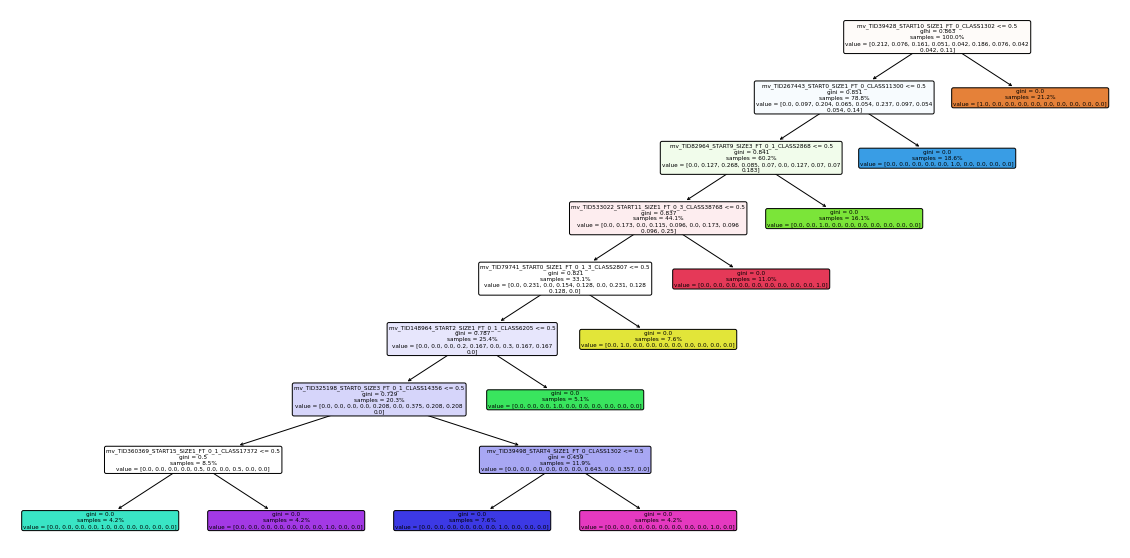

In [4]:
fig = model.plot_tree()

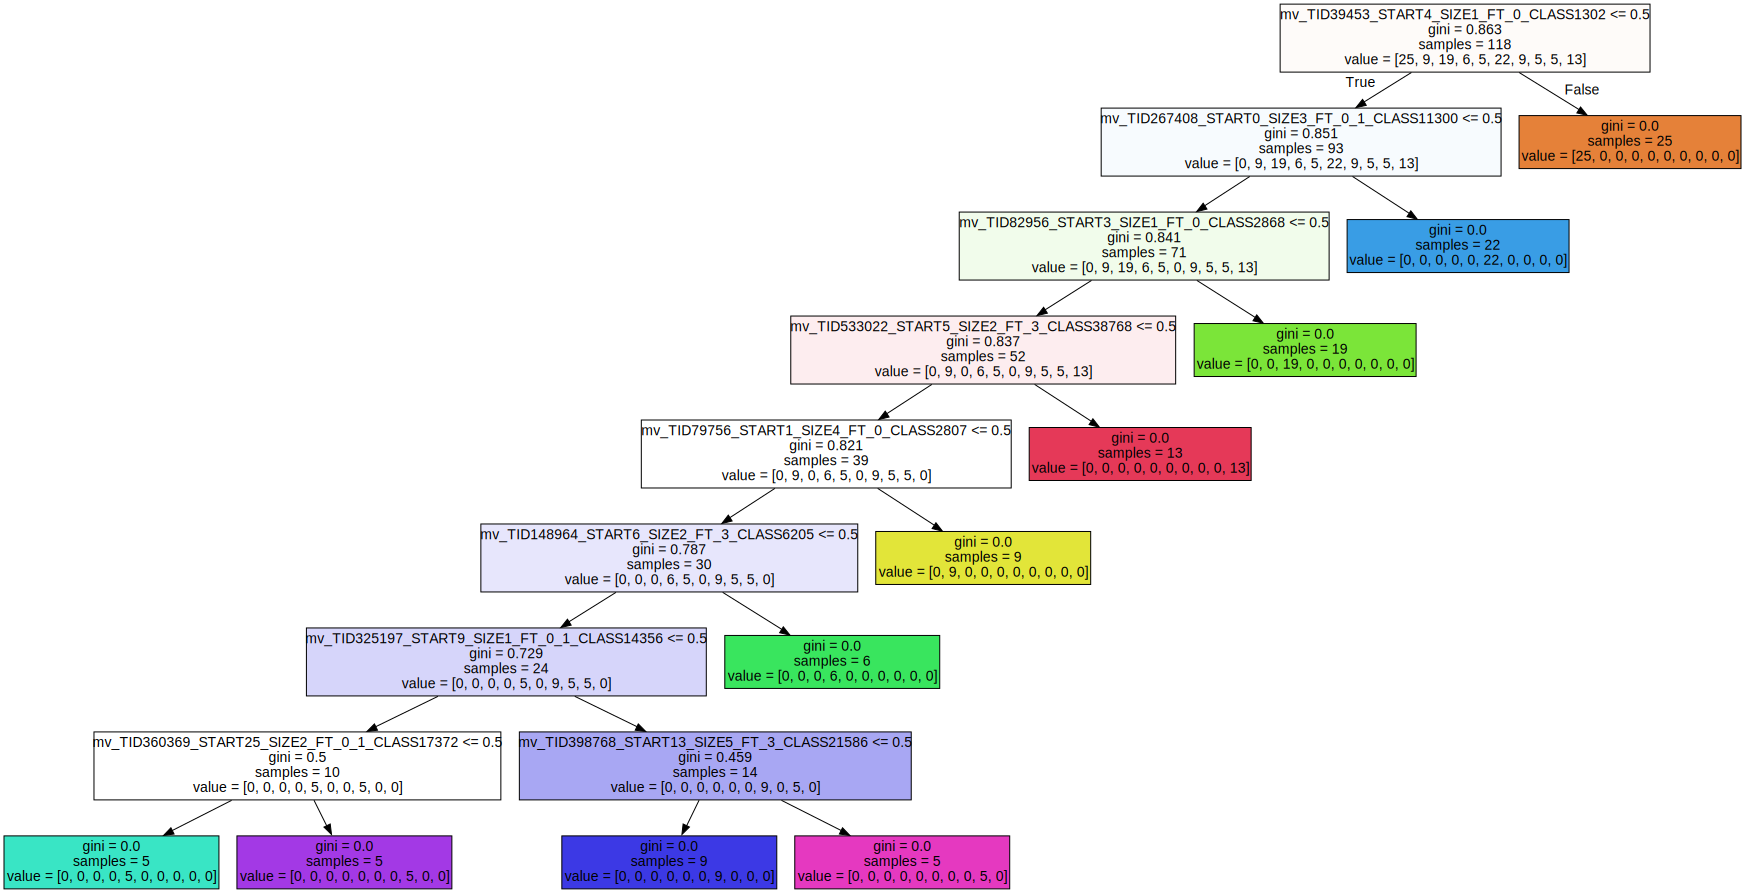

In [5]:
model.graph_tree()

### 2.3. Ensemble Based Methods

TODO

#### 2.3.1. TEC

TEC is an ensemble of trajectory data, movelets and POI-S frequent features.

a) First, we load the movelet, features and trajectory data:

In [1]:
import pandas as pd
pois_x_train = pd.read_csv('./sample/results/pois/npoi_poi_1_specific-x_train.csv', header=None)
pois_y_train = pd.read_csv('./sample/results/pois/npoi_poi_1_specific-y_train.csv', header=None)
pois_x_test = pd.read_csv('./sample/results/pois/npoi_poi_1_specific-x_test.csv', header=None)
pois_y_test = pd.read_csv('./sample/results/pois/npoi_poi_1_specific-y_test.csv', header=None)
pois_x_train.shape, pois_x_test.shape

((163, 151), (76, 151))

In [2]:
mat_train = pd.read_csv('./sample/data/Brightkite/train.csv')
mat_test = pd.read_csv('./sample/data/Brightkite/test.csv')
mat_train['tid'].unique().shape, mat_test['tid'].unique().shape

((163,), (76,))

In [3]:
modelets_train = pd.read_csv('./sample/results/hiper/train.csv')
modelets_test = pd.read_csv('./sample/results/hiper/test.csv')
modelets_train.shape, modelets_test.shape

((163, 553), (76, 553))

In [4]:
from matclassification.methods import TEC

# OK: 'MMLP', 'POIS', 'MDT', 'MRF', 'MSVC'
# NOK: 'MARC', 'MRFHP', 'MMLP1', 

#ensembles=['MMLP', 'POIS']#, 'MARC']
#ensembles=['MDT', 'MRF', 'MSVC']#, 
ensembles=['TRF', 'TXGB', 'TULVAE', 'BITULER', 'DeepeST'] #'TRF', 'TXGB', 'TULVAE',

#'TRF', 
model = TEC(ensembles, n_jobs=42)

data = {
    'mat': [mat_train, mat_test],
    'movelets': [modelets_train, modelets_test],
#    'pois': [pois_x_train, pois_y_train, pois_x_test, pois_y_test]
}

model.prepare_models(data)
model.fit()
#model.predict()
## We can visualize the training report (the same on most models):
#model.report


[TEC:] Building model


[TEC:] Model building:   0%|          | 0/5 [00:00<?, ?it/s]


[TRF:] Building model

[TXGB:] Building model

[TULVAE:] Building model

[TXGB:] Building model

[DeepeST:] Building model

###########    DATA PREPARATION      ###########

Creating a virtual grid without polygons
...cell size by degree: 0.0002706929603721246
...grid_size_lat_y:358699
...grid_size_lon_x:1221516
...A virtual grid was created
Attribute 'day': 7 unique values
Attribute 'time': 1156 unique values
Attribute 'poi': 151 unique values
Attribute 'tid': 163 unique values
Attribute 'index_grid': 141 unique values
Total of attribute/value pairs: 1618


###########      DATA ENCODING        ###########
Checking sets split count (train, <validation>, test):
   TIDs_0: 163
   TIDs_1: 76
Encoding string data to integer
   Encoding: day
   Encoding: time
   Encoding: poi
   Encoding: index_grid
Label encoding on label y

###########    DATA PREPARATION      ###########

Creating a virtual grid without polygons
...cell size by degree: 0.0002706929603721246
...grid_size_lat_y:358699
..

[TEC:] Model Training:   0%|          | 0/5 [00:00<?, ?it/s]

[TRF:] Training hiperparameter model


[TRF:] Model Training:   0%|          | 0/1080 [00:00<?, ?it/s]

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
model.summary()

In [5]:
#model.report.reset_index(drop=True, inplace=True)
model.report

AttributeError: 'TEC' object has no attribute 'report'

In [5]:
for method, m in model.models.items():
#    y_test = argmax(m.y_test, axis = 1)
#    y_test = m.le.inverse_transform(y_test)
    
    print(method, m.y_test_true)#, y_test)

AttributeError: 'TRF' object has no attribute 'y_test_true'

In [12]:
for method, m in model.models.items():
    _, y_pred = model.sub_fit_predict(m)
    print(method, y_pred)

[TRF:] Training hiperparameter model


[TRF:] Model Training:   0%|          | 0/1080 [00:00<?, ?it/s]

TRF [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 4 6 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 8 8 8 9 9 9 9 9 9
 9 9]
[TXGB:] Training hiperparameter model


[TXGB:] Model Training:   0%|          | 0/96 [00:00<?, ?it/s]

[17:49:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "reg_alpha_l1", "reg_lambda_l2" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.68098	validation_1-merror:0.73684
[1]	validation_0-merror:0.59509	validation_1-merror:0.57895
[2]	validation_0-merror:0.47853	validation_1-merror:0.55263
[3]	validation_0-merror:0.48466	validation_1-merror:0.57895
[4]	validation_0-merror:0.50307	validation_1-merror:0.52632
[5]	validation_0-merror:0.47853	validation_1-merror:0.55263
[6]	validation_0-merror:0.43558	validation_1-merror:0.52632
[7]	validation_0-merror:0.44785	validation_1-merror:0.52632
[8]	validation_0-merror:0.46012	validation_1-merror:

[TULVAE:] Model Training:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 1/1000
3/3 [==============================] - 6s 965ms/step - loss: 2.2945 - acc: 0.1840 - val_loss: 2.2768 - val_acc: 0.3158
Epoch 2/1000
3/3 [==============================] - 1s 228ms/step - loss: 2.2662 - acc: 0.3190 - val_loss: 2.2417 - val_acc: 0.3421
Epoch 3/1000
3/3 [==============================] - 0s 176ms/step - loss: 2.2268 - acc: 0.3067 - val_loss: 2.1826 - val_acc: 0.3684
Epoch 4/1000
3/3 [==============================] - 0s 145ms/step - loss: 2.1381 - acc: 0.3497 - val_loss: 2.0660 - val_acc: 0.3553
Epoch 5/1000
3/3 [==============================] - 0s 136ms/step - loss: 2.0167 - acc: 0.3620 - val_loss: 2.0618 - val_acc: 0.3289
Epoch 6/1000
3/3 [==============================] - 0s 127ms/step - loss: 1.9290 - acc: 0.3497 - val_loss: 1.8350 - val_acc: 0.3553
Epoch 7/1000
3/3 [==============================] - 0s 128ms/step - loss: 1.7668 - acc: 0.3497 - val_loss: 1.7114 - val_acc: 0.3947
Epoch 8/1000
3/3 [==============================] - 0s 116ms/step - loss: 1.

[TXGB:] Model Training:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1/1000
3/3 [==============================] - 3s 641ms/step - loss: 2.2872 - acc: 0.2086 - val_loss: 2.2473 - val_acc: 0.3026
Epoch 2/1000
3/3 [==============================] - 0s 135ms/step - loss: 2.2238 - acc: 0.4110 - val_loss: 2.1899 - val_acc: 0.3816
Epoch 3/1000
3/3 [==============================] - 0s 137ms/step - loss: 2.1564 - acc: 0.4294 - val_loss: 2.1136 - val_acc: 0.3684
Epoch 4/1000
3/3 [==============================] - 0s 108ms/step - loss: 2.0583 - acc: 0.3926 - val_loss: 2.0354 - val_acc: 0.3553
Epoch 5/1000
3/3 [==============================] - 0s 102ms/step - loss: 1.9809 - acc: 0.3436 - val_loss: 1.9356 - val_acc: 0.3816
Epoch 6/1000
3/3 [==============================] - 0s 104ms/step - loss: 1.8513 - acc: 0.4233 - val_loss: 1.7783 - val_acc: 0.3816
Epoch 7/1000
3/3 [==============================] - 0s 97ms/step - loss: 1.6691 - acc: 0.4233 - val_loss: 1.6469 - val_acc: 0.3947
Epoch 8/1000
3/3 [==============================] - 0s 102ms/step - loss: 1.7

[DeepeST:] Model Training:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/1000
3/3 [==============================] - 5s 823ms/step - loss: 64.8383 - acc: 0.1656 - top_k_categorical_accuracy: 0.6196 - val_loss: 61.4437 - val_acc: 0.3289 - val_top_k_categorical_accuracy: 0.8421
Epoch 2/1000
3/3 [==============================] - 1s 258ms/step - loss: 60.2052 - acc: 0.3620 - top_k_categorical_accuracy: 0.8405 - val_loss: 57.0156 - val_acc: 0.3289 - val_top_k_categorical_accuracy: 0.9211
Epoch 3/1000
3/3 [==============================] - 1s 193ms/step - loss: 55.8275 - acc: 0.3988 - top_k_categorical_accuracy: 0.8957 - val_loss: 52.8381 - val_acc: 0.3289 - val_top_k_categorical_accuracy: 0.8553
Epoch 4/1000
3/3 [==============================] - 1s 212ms/step - loss: 51.7147 - acc: 0.3558 - top_k_categorical_accuracy: 0.8650 - val_loss: 48.8890 - val_acc: 0.3289 - val_top_k_categorical_accuracy: 0.8684
Epoch 5/1000
3/3 [==============================] - 0s 193ms/step - loss: 47.8092 - acc: 0.3681 - top_k_categorical_accuracy: 0.8589 - val_loss: 45.1639

In [4]:
from matclassification.methods import TEC

ensembles=['MARC', 'MMLP']

model = TEC(ensembles)

data = {
    'movelets': [modelets_train, modelets_test],
    'mat': [mat_train, mat_test],
#    'pois': [pois_x_train, pois_y_train, pois_x_test, pois_y_test]
}

check, Y = model.check_input(data)


[TEC:] Building model


In [23]:
modelets_train['label'], mat_train['label']

(113     1302
 0       1302
 114     1302
 1       1302
 2       1302
        ...  
 110    38768
 161    38768
 111    38768
 162    38768
 112    38768
 Name: label, Length: 163, dtype: int64,
 1809     1302
 1810     1302
 1811     1302
 1812     1302
 1813     1302
         ...  
 1804    38768
 1805    38768
 1806    38768
 1807    38768
 1808    38768
 Name: label, Length: 2609, dtype: int64)

---
## 3. Scripts

The scripts provided with this package for using some of the library functions in command line environment.

### 3.1. Classifications Methods

In [21]:
# The MARC classifier:
!python3 matanalysis/scripts/cls/MARC.py 'sample/data/Brightkite/train.csv' 'sample/data/Brightkite/test.csv' 'sample/results/marc/metrics-file.csv'

{'train-file': 'sample/data/Brightkite/train.csv', 'test-file': 'sample/data/Brightkite/test.csv', 'metrics-file': 'sample/results/marc/metrics-file.csv', 'embedding_size': 100, 'merge_tipe': 'concatenate', 'rnn_cell': 'lstm', 'seed': 1, 'geo_precision': 8, 'no_gpu': False}
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

2024-04-10 19:02:37.900084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-10 19:02:37.900177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-10 19:02:37.900931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defa

### 3.3. Helpers for Experimental Results:

In [9]:
!python3 matanalysis/scripts/helpers/MAT-Summary.py ./sample/results/hiper

Done.


---
# Extras

I) if we want to read and prepare the movelets feature matrix splitting into: train, validation and text sets:

In [6]:
import pandas as pd

# Splitting the train data into train and validation 
df_train = pd.read_csv('./sample/results/train.csv')
df_train['tid'] = df_train.index

from matdata.preprocess import trainAndTestSplit
df_train, df_val = trainAndTestSplit(df_train, train_size=0.75, tid_col='tid', class_col='class', outformats=[])
df_train.drop(columns=['tid'], inplace=True)
df_val.drop(columns=['tid'], inplace=True)

df_train.to_csv('sample/results/train_1.csv', index=False)
df_val.to_csv('sample/results/train_2.csv', index=False)

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
# Reading the movelet data:
from matclassification.methods import read_features_csv
X_train, y_train = read_features_csv('./sample/results', 'train_1.csv')
X_val, y_val = read_features_csv('./sample/results', 'train_2.csv')
X_test, y_test = read_features_csv('./sample/results', 'test.csv')

Loading train and test data from... ./sample/results
Done.
Number of attributes: 747
Loading train and test data from... ./sample/results
Done.
Number of attributes: 747
Loading train and test data from... ./sample/results
Done.
Number of attributes: 747


And, use it in a classifier:

In [8]:
from matclassification.methods import MDT

model = MDT()
model.fit(X_train, y_train, X_val, y_val)
model.predict(X_test, y_test)

model.summary()


[MDT:] Building model
[MDT:] Processing time: 19.398 milliseconds. Done.


acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.947368    0.973684           0.926667         0.936337      0.958498   

   f1_macro  
0  0.926667

---
### That's all, thanks!

\# By Tarlis Portela (2023)